In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.ensemble import VotingClassifier, VotingRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 배깅(Bagging)
- Bootstrap Aggregation. 앙상블 학습 방식 중 하나 
- 배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법
- 데이터로부터 부트스트랩(복원 랜덤 샘플링)을 하고 부트스트랩한 데이터로 모델을 학습. 학습된 모델의 결과를 집계하여 최종 결과 값을 구한다.
- Categorical Data는 투표 방식(Votinig)으로 결과를 집계하며, Continuous Data는 평균으로 집계.
- Categorical Data일 때, 투표 방식으로 한다는 것은 전체 모델에서 예측한 값 중 가장 많은 값을 최종 예측값으로 선정. 
- 6개의 결정 트리 모델일 경우 4개는 A로 예측했고, 2개는 B로 예측했다면 투표에 의해 4개의 모델이 선택한 A를 최종 결과로 예측한다
- 평균으로 집계한다는 것은 말 그대로 각각의 결정 트리 모델이 예측한 값에 평균을 취해 최종 Bagging Model의 예측값을 결정한다
- 배깅 기법을 활용한 모델이 바로 랜덤 포레스트

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb4wG8O%2FbtqyfYW98AS%2FYZBtUJy3jZLyuik1R0aGNk%2Fimg.png' width='600'>

# 랜덤 포레스트(Random Forest)

- 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘. 
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 내린다.
- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트인데 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트 스트래핑(bootstrapping) 분할 방식이라고 한다. 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fod2gM%2Fbtq6kMv83oZ%2FsNVWEiA7FWsB2BBt6kn0r1%2Fimg.png'
      width='500'>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 타이타닉 데이타셋

In [5]:
titanic_df = pd.read_csv('titanic_book.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [6]:
titanic_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0


In [7]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [8]:
X_titanic_df = titanic_df.loc[:, 'Pclass':]
y_titanic_df = titanic_df['Survived']

### 학습 데이터와 테스트 데이터로 분리 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=y_titanic_df)

In [10]:
X_train.shape, X_test.shape

((712, 8), (179, 8))

### DecisionTree 모델 적용과 테스트

In [11]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train), model_dt.score(X_test, y_test)

(0.9859550561797753, 0.7877094972067039)

In [12]:
#그리드서치 적용 -> 3
model_dt = DecisionTreeClassifier()
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
model_dt_grid = GridSearchCV(model_dt, param_grid=parameters, cv=5,  verbose=1)
model_dt_grid.fit(X_train, y_train)
model_dt_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 3}

In [13]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train), model_dt.score(X_test, y_test) 

(0.8132022471910112, 0.8659217877094972)

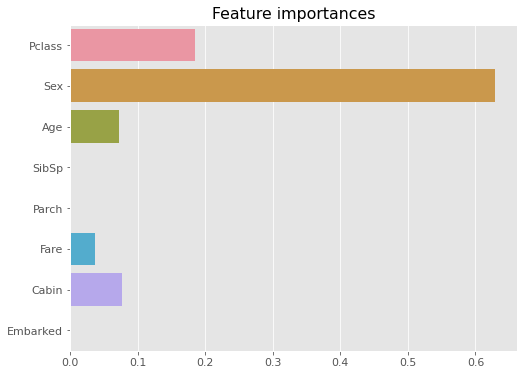

In [14]:
#피처 중요도 Sex -> Pclass 순
ftr_importances = pd.Series(model_dt.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

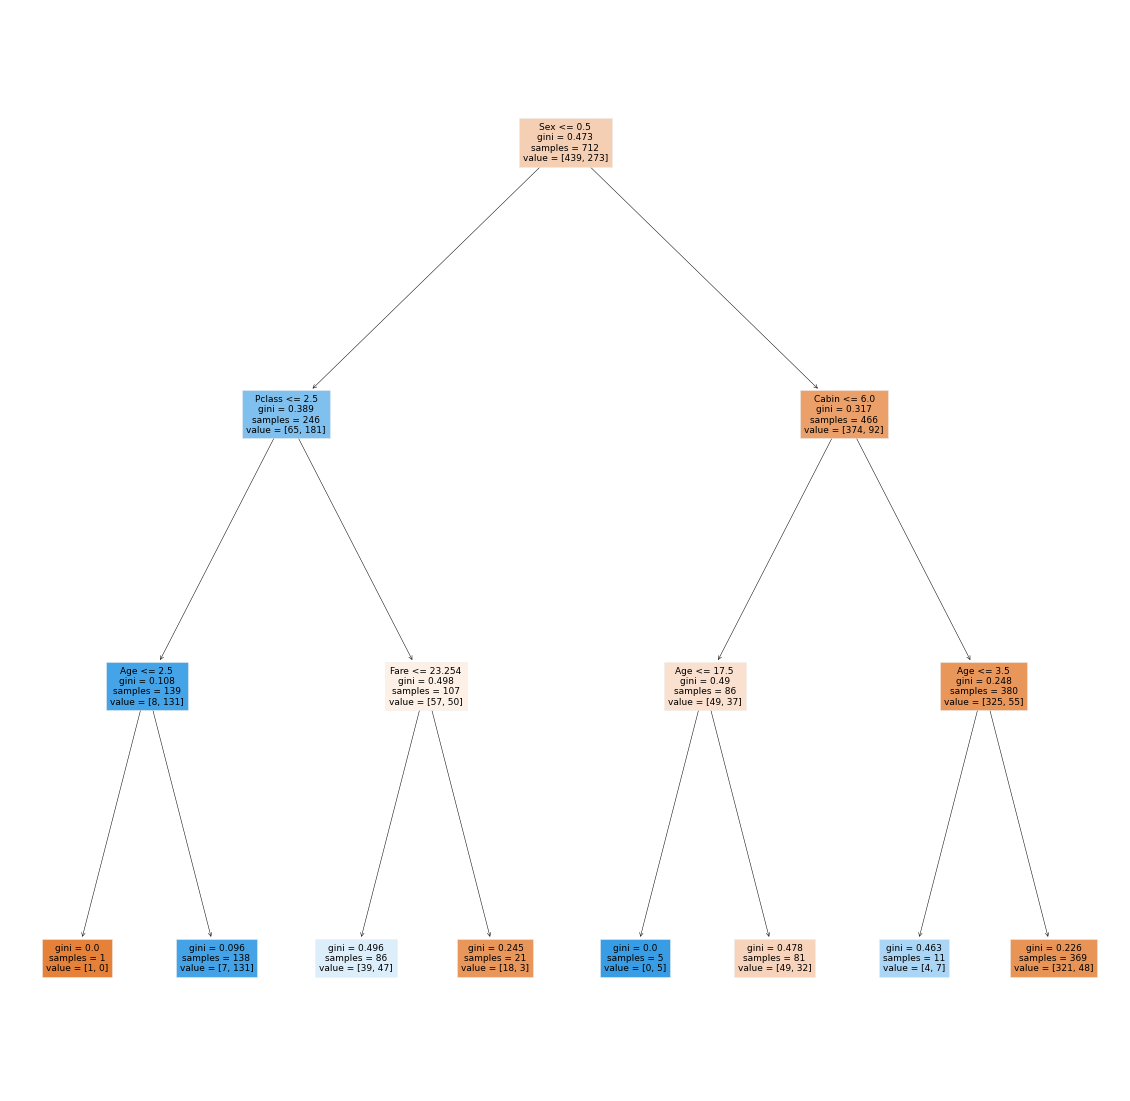

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dt, max_depth=3, filled=True, feature_names=X_train.columns, fontsize=9)
plt.show()

### Random Forest 적용

In [16]:
#estimators = 100 (default)
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train), model_rf.score(X_test, y_test)

(0.9859550561797753, 0.8268156424581006)

In [17]:
#그리드서치 적용
model_rf = RandomForestClassifier()
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
model_rf_grid = GridSearchCV(model_rf, param_grid=parameters, cv=5,  verbose=1)
model_rf_grid.fit(X_train, y_train)
model_rf_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 7}

In [18]:
model_rf = RandomForestClassifier(max_depth = 6)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8659217877094972

In [19]:
model_rf.classes_ , model_rf.feature_importances_, X_train.columns

(array([0, 1], dtype=int64),
 array([0.12705033, 0.35050746, 0.12452506, 0.04821505, 0.04532369,
        0.16883326, 0.09428857, 0.04125658]),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object'))

In [20]:
importances_values = model_rf.feature_importances_
print(np.argsort(importances_values)[::-1])
X_train.columns[np.argsort(importances_values)[::-1][:]]

[1 5 0 2 6 3 4 7]


Index(['Sex', 'Fare', 'Pclass', 'Age', 'Cabin', 'SibSp', 'Parch', 'Embarked'], dtype='object')

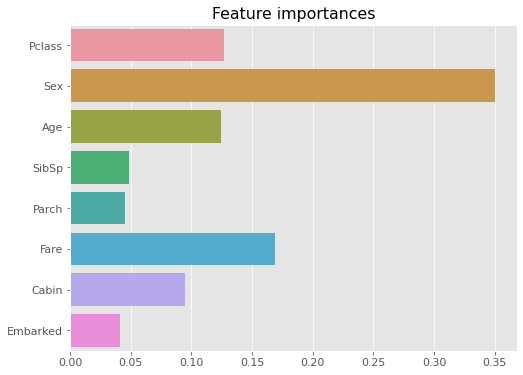

In [21]:
ftr_importances = pd.Series(model_rf.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

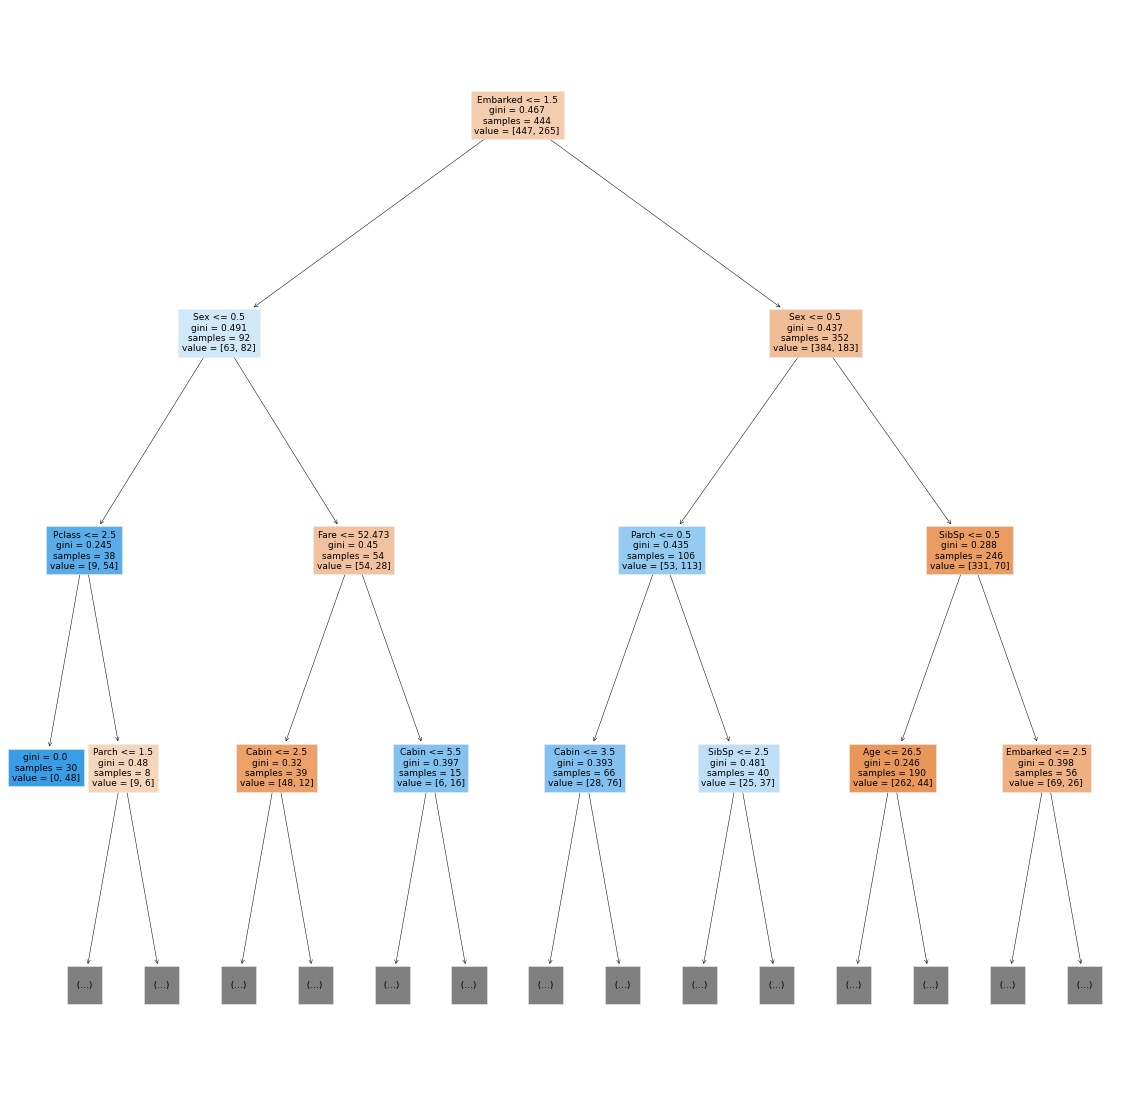

In [22]:
#랜덤 포레스트 시각화
#model_rf[0] ~ model_rf[n_estimators-1]

#첫번째 결정트리
plt.figure(figsize=(20,20))
plot_tree(model_rf[0], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=9)
plt.show()

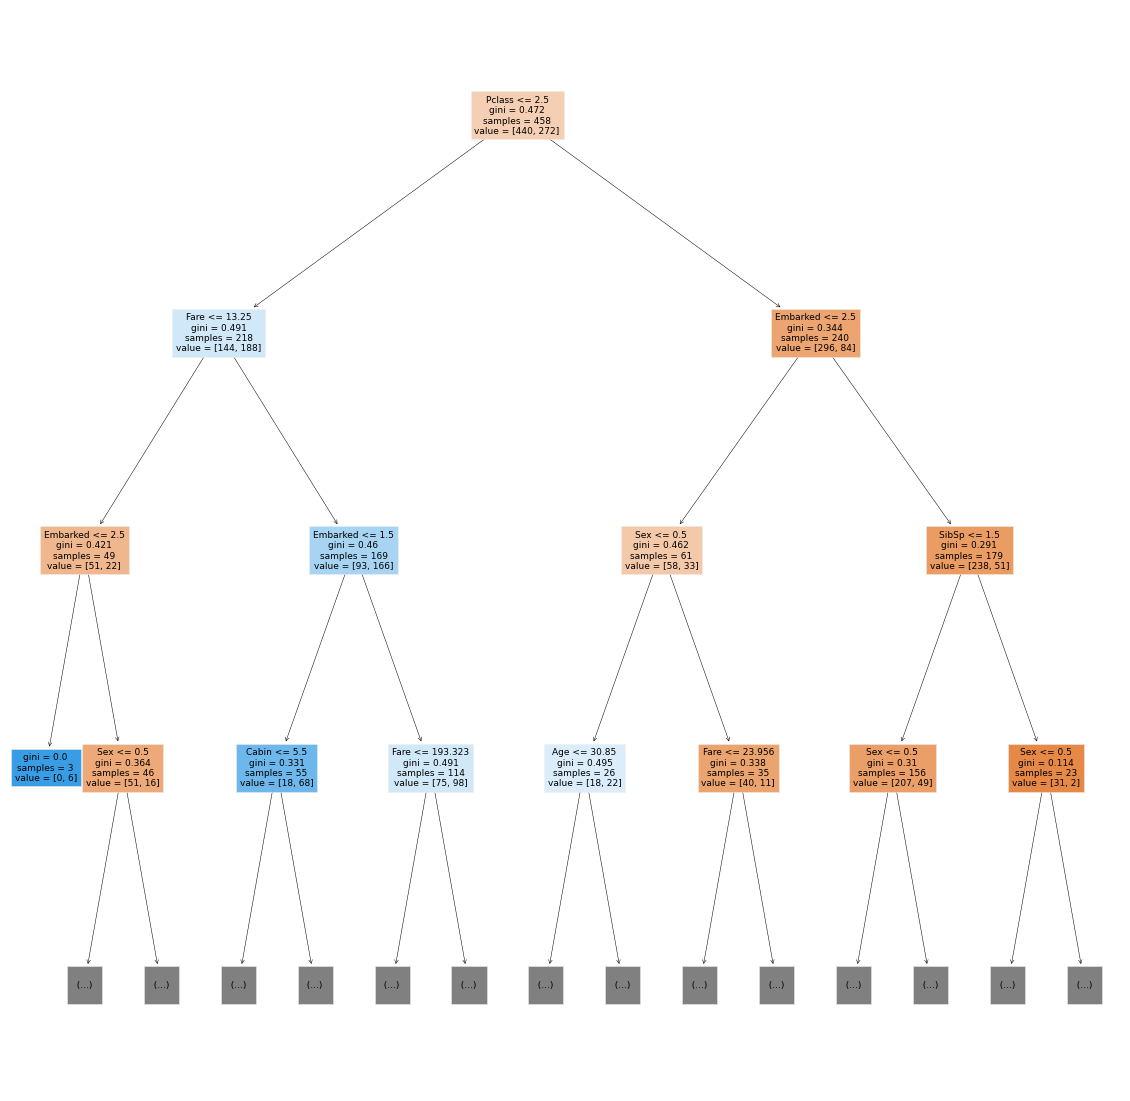

In [23]:
#마지막 결정트리
plt.figure(figsize=(20,20))
plot_tree(model_rf[99], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=9)
plt.show()

# 부스팅(Boosting)
- 부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법. 
- 배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측하며 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식.
- 부스팅은 모델 간 팀워크가 이루어져 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 준다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복한다. 
- ADA Boosting, Gradient Boosting

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkCejr%2FbtqyghvqEZB%2F9o3rKTEsuSIDHEfelYFJlk%2Fimg.png' width='600'>



# GBM

- Gradient Boosting Machine

- max_depth	: 트리의 최대 깊이. default = 3
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수. → 과적합을 제어하는데 사용
    <br> Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수.  
    <br> min_samples_split과 함께 과적합 제어 용도.  default = 1
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수.  Default = 'none' → 모든 피처 사용
- max_leaf_nodes : 리프노드의 최대 개수.  default = None → 제한없음
- n_estimators	: 생성할 트리의 갯수. Default = 100
- learning_rate	: 학습을 진행할 때마다 적용하는 학습률(0~1). 
    <br> Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수.  Default = 0.1
    <br> 낮은 만큼 최소 오류 값을 찾아 예측성능이 높아질 수 있음. 시간이 많이 소요
- subsample	: 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1). default=1 (전체 데이터 학습)
    <br> 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

#n_estimators = 100(default)
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
model_gb.score(X_train, y_train), model_rf.score(X_test, y_test)

(0.9030898876404494, 0.8659217877094972)

In [25]:
model_gb = GradientBoostingClassifier()
parameters = {
    'n_estimators' : [50, 100, 300],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth':[3, 4, 5, 6]
}
model_gb_grid = GridSearchCV(model_gb, param_grid=parameters, cv=5,  verbose=1)
model_gb_grid.fit(X_train, y_train)
model_gb_grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [26]:
model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
model_gb.fit(X_train, y_train)
model_gb.score(X_test, y_test)

0.7988826815642458

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



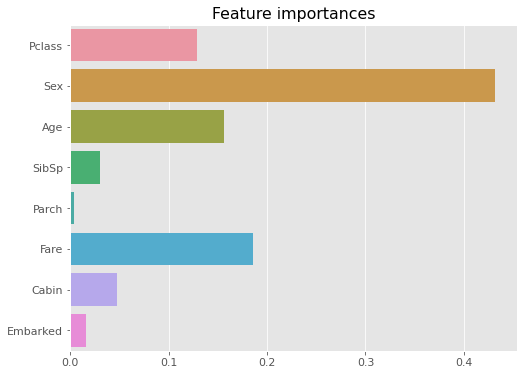

In [28]:
#Sex -> Fare 순
ftr_importances = pd.Series(model_gb.feature_importances_ , index=X_train.columns)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

In [29]:
#GBM 시각화 -> 오류
# plt.figure(figsize=(20,20))
# plot_tree(model_gb[0], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=9)
# plt.show()

# XGBoost
- 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나
- GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘
- 과적합 규제(Overfitting Regularization)


In [30]:
#pip list

### 설치 

- sklearn 에서 지원되지 않으므로 별도 설치가 필요 
- 관리자 버전으로 설치 
- pip install xgboost
- conda install -c anaconda py-xgboost

### 주요 파라미터 
: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터를 지칭

In [31]:
import xgboost
from xgboost import plot_importance, XGBClassifier 

xgboost.__version__

'1.5.1'

### 데이터 셋 - 위스콘신 Breast Cancer 

In [32]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label

print(cancer_df.shape)
cancer_df.head(3)

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [33]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [34]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [35]:
# cancer_df.isnull().sum()
cancer_df.isnull().sum().sum()

0

In [36]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [37]:
# 수치형 입력 데이터 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#X_train[:3]

### 데이터셋 분리

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


### 모델 생성 및 학습

In [40]:
model_xgb = XGBClassifier(objective='reg:squarederror', n_estimators=100)
# model_xgb = XGBClassifier()
# 오류 발생시 아래와 같이 변경 
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

0.9385964912280702

In [41]:
print(classification_report(y_test, model_xgb.predict(X_test)))
confusion_matrix(y_test, model_xgb.predict(X_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.95      0.96      0.95        77

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



array([[33,  4],
       [ 3, 74]], dtype=int64)

In [42]:
model_xgb = XGBClassifier(n_estimators=10)
params = {
    'max_depth':[5, 7, 9],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}
model_xgb_gridcv = GridSearchCV(model_xgb, param_grid=params)
model_xgb_gridcv.fit(X_train,
           y_train,
           eval_set=[(X_test, y_test)],
           eval_metric="error")
print('GridSearchCV 최적 파라미터:', model_xgb_gridcv.best_params_)

[0]	validation_0-error:0.05263
[1]	validation_0-error:0.05263
[2]	validation_0-error:0.06140
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.05263
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07895
[2]	validation_0-error:0.07895
[3]	validation_0-error:0.07895
[4]	validation_0-error:0.07895
[5]	validation_0-error:0.07895
[6]	validation_0-error:0.07895
[7]	validation_0-error:0.07895
[8]	validation_0-error:0.07895
[9]	validation_0-error:0.07895
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.08772
[2]	validation_0-error:0.08772
[3]	validation_0-error:0.08772
[4]	validation_0-error:0.08772
[5]	validation_0-error:0.08772
[6]	validation_0-error:0.08772
[7]	validation_0-error:0.08772
[8]	validation_0-error:0.08772
[9]	validation_0-error:0.08772
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	vali

[5]	validation_0-error:0.07018
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07018
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.08772
[2]	validation_0-error:0.08772
[3]	validation_0-error:0.08772
[4]	validation_0-error:0.08772
[5]	validation_0-error:0.08772
[6]	validation_0-error:0.08772
[7]	validation_0-error:0.08772
[8]	validation_0-error:0.08772
[9]	validation_0-error:0.08772
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.07018
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07018
[0]	validation_0-error:0.11403
[1]	validation_0-error:0.11403
[2]	validation_0-error:0.11403
[3]	validation_0-error:0.11403
[4]	validation_0-error:0.11403
[5]	validation_0-error:0.11403
[6]	validation_0-error:0.11403
[7]	vali

[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.06140
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.06140
[7]	validation_0-error:0.06140
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.11403
[1]	validation_0-error:0.11403
[2]	validation_0-error:0.11403
[3]	validation_0-error:0.09649
[4]	validation_0-error:0.08772
[5]	validation_0-error:0.08772
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.06140
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.05263
[1]	validation_0-error:0.05263
[2]	validation_0-error:0.05263
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.03509
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.03509
[8]	validation_0-error:0.03509
[9]	validation_0-error:0.03509
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	vali

[5]	validation_0-error:0.06140
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.06140
[0]	validation_0-error:0.05263
[1]	validation_0-error:0.05263
[2]	validation_0-error:0.03509
[3]	validation_0-error:0.02632
[4]	validation_0-error:0.03509
[5]	validation_0-error:0.02632
[6]	validation_0-error:0.02632
[7]	validation_0-error:0.03509
[8]	validation_0-error:0.03509
[9]	validation_0-error:0.04386
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.05263
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07895
[3]	validation_0-error:0.07895
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.06140
[7]	vali

In [43]:
model_xgb = XGBClassifier(objective='reg:squarederror', n_estimators=10, learning_rate=0.3, max_depth=5)
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

0.9473684210526315

In [44]:
ftr_importance_values = model_xgb.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=dataset.feature_names)
ftr_importances = ftr_importances.sort_values(ascending=False)
ftr_importances

worst radius               0.621578
worst concave points       0.127239
mean concave points        0.032492
mean texture               0.031113
radius error               0.023328
area error                 0.022967
worst perimeter            0.021350
mean compactness           0.019052
worst smoothness           0.019008
mean concavity             0.018814
texture error              0.014085
worst texture              0.007888
concave points error       0.007630
symmetry error             0.005857
mean perimeter             0.004780
worst concavity            0.004693
smoothness error           0.004673
compactness error          0.003250
worst area                 0.002853
mean radius                0.002504
worst symmetry             0.001895
mean symmetry              0.001552
mean smoothness            0.000889
mean area                  0.000313
worst compactness          0.000200
fractal dimension error    0.000000
concavity error            0.000000
perimeter error            0

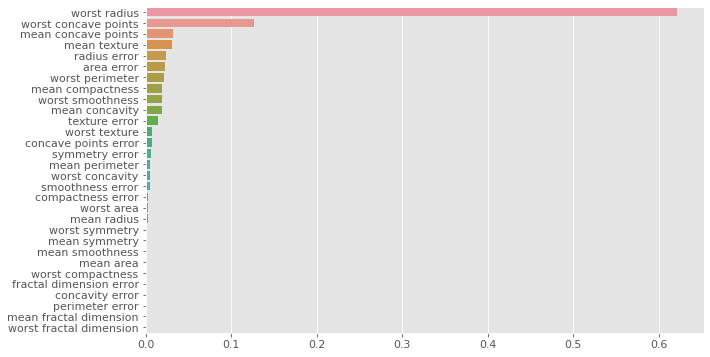

In [45]:
sns.barplot(x=ftr_importances, y=ftr_importances.index);

### 퀴즈
타이타닉 데이터를 XGBClassifier()를 이용해서 모델을 생성하고 테스트하여라

In [46]:
titanic_df = pd.read_csv('titanic_book.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [47]:
titanic_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0


In [48]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [49]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat


titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [50]:
titanic_df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
764,0,3,1,16.0,0,0,7.775,7,3,Teenager
342,0,2,1,28.0,0,0,13.000,7,3,Young Adult
72,0,2,1,21.0,0,0,73.500,7,3,Student


In [51]:
# X_features = pd.get_dummies(titanic_df, columns=['Sex','Cabin','Embarked'])
X_features = pd.get_dummies(titanic_df, columns=['Sex','Cabin','Embarked', 'Age_cat'])
X_features.sample()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Cabin_0,Cabin_1,...,Embarked_1,Embarked_2,Embarked_3,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Elderly,Age_cat_Student,Age_cat_Teenager,Age_cat_Young Adult
890,0,3,32.0,0,0,7.75,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
y = X_features['Survived']
del X_features['Survived']

In [53]:
X_features.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'Cabin_0',
       'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6',
       'Cabin_7', 'Cabin_8', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'Age_cat_Adult', 'Age_cat_Baby', 'Age_cat_Child',
       'Age_cat_Elderly', 'Age_cat_Student', 'Age_cat_Teenager',
       'Age_cat_Young Adult'],
      dtype='object')

In [54]:
X_features.shape

(891, 27)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, 
                                                    test_size=0.3, random_state=11,
                                                    stratify=y)

In [56]:
# model_xgb = XGBClassifier(objective='reg:squarederror')
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

[14:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7910447761194029

In [57]:
# model_xgb = XGBClassifier(n_estimators=10)
model_xgb = XGBClassifier()
params = {
    'n_estimators':[10, 50, 100, 500],
    'max_depth':[3, 5, 7, 9],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5]
}
model_xgb_gridcv = GridSearchCV(model_xgb, param_grid=params)
model_xgb_gridcv.fit(X_train,
           y_train,
           eval_set=[(X_test, y_test)],
           eval_metric="error")
# print('GridSearchCV 최적 파라미터:', model_xgb_gridcv.best_params_)

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	vali

[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.16418
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16418
[37]	validation_0-error:0.16418
[38]	validation_0-error:0.16418
[39]	validation_0-error:0.16418
[40]	validation_0-error:0.16418
[41]	val

[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.16045
[23]	validation_0-error:0.16045
[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16045
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	validation_0-error:0.16045
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.16045
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	val

[74]	validation_0-error:0.16418
[75]	validation_0-error:0.16418
[76]	validation_0-error:0.16418
[77]	validation_0-error:0.16418
[78]	validation_0-error:0.16418
[79]	validation_0-error:0.16418
[80]	validation_0-error:0.16418
[81]	validation_0-error:0.16418
[82]	validation_0-error:0.16418
[83]	validation_0-error:0.16418
[84]	validation_0-error:0.16418
[85]	validation_0-error:0.16418
[86]	validation_0-error:0.16418
[87]	validation_0-error:0.16418
[88]	validation_0-error:0.16418
[89]	validation_0-error:0.16418
[90]	validation_0-error:0.16418
[91]	validation_0-error:0.16418
[92]	validation_0-error:0.16418
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16418
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validatio

[227]	validation_0-error:0.19030
[228]	validation_0-error:0.19030
[229]	validation_0-error:0.19030
[230]	validation_0-error:0.19030
[231]	validation_0-error:0.19030
[232]	validation_0-error:0.19030
[233]	validation_0-error:0.19030
[234]	validation_0-error:0.19030
[235]	validation_0-error:0.19030
[236]	validation_0-error:0.19030
[237]	validation_0-error:0.19030
[238]	validation_0-error:0.19030
[239]	validation_0-error:0.19030
[240]	validation_0-error:0.19030
[241]	validation_0-error:0.19030
[242]	validation_0-error:0.19030
[243]	validation_0-error:0.19030
[244]	validation_0-error:0.19030
[245]	validation_0-error:0.19030
[246]	validation_0-error:0.19030
[247]	validation_0-error:0.19030
[248]	validation_0-error:0.19030
[249]	validation_0-error:0.19030
[250]	validation_0-error:0.19030
[251]	validation_0-error:0.19030
[252]	validation_0-error:0.19030
[253]	validation_0-error:0.19030
[254]	validation_0-error:0.19030
[255]	validation_0-error:0.19030
[256]	validation_0-error:0.19030
[257]	vali

[476]	validation_0-error:0.19030
[477]	validation_0-error:0.19030
[478]	validation_0-error:0.19030
[479]	validation_0-error:0.19030
[480]	validation_0-error:0.19030
[481]	validation_0-error:0.19030
[482]	validation_0-error:0.19030
[483]	validation_0-error:0.19030
[484]	validation_0-error:0.19030
[485]	validation_0-error:0.19030
[486]	validation_0-error:0.19030
[487]	validation_0-error:0.19030
[488]	validation_0-error:0.19030
[489]	validation_0-error:0.19030
[490]	validation_0-error:0.19030
[491]	validation_0-error:0.19030
[492]	validation_0-error:0.19030
[493]	validation_0-error:0.19030
[494]	validation_0-error:0.19030
[495]	validation_0-error:0.19030
[496]	validation_0-error:0.19030
[497]	validation_0-error:0.19030
[498]	validation_0-error:0.19030
[499]	validation_0-error:0.19030
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error

[228]	validation_0-error:0.15672
[229]	validation_0-error:0.15672
[230]	validation_0-error:0.15672
[231]	validation_0-error:0.15672
[232]	validation_0-error:0.15672
[233]	validation_0-error:0.15672
[234]	validation_0-error:0.15672
[235]	validation_0-error:0.15672
[236]	validation_0-error:0.15672
[237]	validation_0-error:0.15672
[238]	validation_0-error:0.15672
[239]	validation_0-error:0.15672
[240]	validation_0-error:0.15672
[241]	validation_0-error:0.15672
[242]	validation_0-error:0.15672
[243]	validation_0-error:0.15672
[244]	validation_0-error:0.15672
[245]	validation_0-error:0.15672
[246]	validation_0-error:0.15672
[247]	validation_0-error:0.15672
[248]	validation_0-error:0.15672
[249]	validation_0-error:0.15672
[250]	validation_0-error:0.15672
[251]	validation_0-error:0.15672
[252]	validation_0-error:0.15672
[253]	validation_0-error:0.15672
[254]	validation_0-error:0.15672
[255]	validation_0-error:0.15672
[256]	validation_0-error:0.15672
[257]	validation_0-error:0.15672
[258]	vali

[477]	validation_0-error:0.15672
[478]	validation_0-error:0.15672
[479]	validation_0-error:0.15672
[480]	validation_0-error:0.15672
[481]	validation_0-error:0.15672
[482]	validation_0-error:0.15672
[483]	validation_0-error:0.15672
[484]	validation_0-error:0.15672
[485]	validation_0-error:0.15672
[486]	validation_0-error:0.15672
[487]	validation_0-error:0.15672
[488]	validation_0-error:0.15672
[489]	validation_0-error:0.15672
[490]	validation_0-error:0.15672
[491]	validation_0-error:0.15672
[492]	validation_0-error:0.15672
[493]	validation_0-error:0.15672
[494]	validation_0-error:0.15672
[495]	validation_0-error:0.15672
[496]	validation_0-error:0.15672
[497]	validation_0-error:0.15672
[498]	validation_0-error:0.15672
[499]	validation_0-error:0.15672
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0

[229]	validation_0-error:0.16045
[230]	validation_0-error:0.16045
[231]	validation_0-error:0.16045
[232]	validation_0-error:0.16045
[233]	validation_0-error:0.16045
[234]	validation_0-error:0.16045
[235]	validation_0-error:0.16045
[236]	validation_0-error:0.16045
[237]	validation_0-error:0.16045
[238]	validation_0-error:0.16045
[239]	validation_0-error:0.16045
[240]	validation_0-error:0.16045
[241]	validation_0-error:0.16045
[242]	validation_0-error:0.16045
[243]	validation_0-error:0.16045
[244]	validation_0-error:0.16045
[245]	validation_0-error:0.16045
[246]	validation_0-error:0.16045
[247]	validation_0-error:0.16045
[248]	validation_0-error:0.16045
[249]	validation_0-error:0.16045
[250]	validation_0-error:0.16045
[251]	validation_0-error:0.16045
[252]	validation_0-error:0.16045
[253]	validation_0-error:0.16045
[254]	validation_0-error:0.16045
[255]	validation_0-error:0.16045
[256]	validation_0-error:0.16045
[257]	validation_0-error:0.16045
[258]	validation_0-error:0.16045
[259]	vali

[478]	validation_0-error:0.16045
[479]	validation_0-error:0.16045
[480]	validation_0-error:0.16045
[481]	validation_0-error:0.16045
[482]	validation_0-error:0.16045
[483]	validation_0-error:0.16045
[484]	validation_0-error:0.16045
[485]	validation_0-error:0.16045
[486]	validation_0-error:0.16045
[487]	validation_0-error:0.16045
[488]	validation_0-error:0.16045
[489]	validation_0-error:0.16045
[490]	validation_0-error:0.16045
[491]	validation_0-error:0.16045
[492]	validation_0-error:0.16045
[493]	validation_0-error:0.16045
[494]	validation_0-error:0.16045
[495]	validation_0-error:0.16045
[496]	validation_0-error:0.16045
[497]	validation_0-error:0.16045
[498]	validation_0-error:0.16045
[499]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13060
[8]	validation_0-error:0.1

[230]	validation_0-error:0.13060
[231]	validation_0-error:0.13060
[232]	validation_0-error:0.13060
[233]	validation_0-error:0.13060
[234]	validation_0-error:0.13060
[235]	validation_0-error:0.13060
[236]	validation_0-error:0.13060
[237]	validation_0-error:0.13060
[238]	validation_0-error:0.13060
[239]	validation_0-error:0.13060
[240]	validation_0-error:0.13060
[241]	validation_0-error:0.13060
[242]	validation_0-error:0.13060
[243]	validation_0-error:0.13060
[244]	validation_0-error:0.13060
[245]	validation_0-error:0.13060
[246]	validation_0-error:0.13060
[247]	validation_0-error:0.13060
[248]	validation_0-error:0.13060
[249]	validation_0-error:0.13060
[250]	validation_0-error:0.13060
[251]	validation_0-error:0.13060
[252]	validation_0-error:0.13060
[253]	validation_0-error:0.13060
[254]	validation_0-error:0.13060
[255]	validation_0-error:0.13060
[256]	validation_0-error:0.13060
[257]	validation_0-error:0.13060
[258]	validation_0-error:0.13060
[259]	validation_0-error:0.13060
[260]	vali

[479]	validation_0-error:0.13060
[480]	validation_0-error:0.13060
[481]	validation_0-error:0.13060
[482]	validation_0-error:0.13060
[483]	validation_0-error:0.13060
[484]	validation_0-error:0.13060
[485]	validation_0-error:0.13060
[486]	validation_0-error:0.13060
[487]	validation_0-error:0.13060
[488]	validation_0-error:0.13060
[489]	validation_0-error:0.13060
[490]	validation_0-error:0.13060
[491]	validation_0-error:0.13060
[492]	validation_0-error:0.13060
[493]	validation_0-error:0.13060
[494]	validation_0-error:0.13060
[495]	validation_0-error:0.13060
[496]	validation_0-error:0.13060
[497]	validation_0-error:0.13060
[498]	validation_0-error:0.13060
[499]	validation_0-error:0.13060
[0]	validation_0-error:0.16418
[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.164

[231]	validation_0-error:0.16418
[232]	validation_0-error:0.16418
[233]	validation_0-error:0.16418
[234]	validation_0-error:0.16418
[235]	validation_0-error:0.16418
[236]	validation_0-error:0.16418
[237]	validation_0-error:0.16418
[238]	validation_0-error:0.16418
[239]	validation_0-error:0.16418
[240]	validation_0-error:0.16418
[241]	validation_0-error:0.16418
[242]	validation_0-error:0.16418
[243]	validation_0-error:0.16418
[244]	validation_0-error:0.16418
[245]	validation_0-error:0.16418
[246]	validation_0-error:0.16418
[247]	validation_0-error:0.16418
[248]	validation_0-error:0.16418
[249]	validation_0-error:0.16418
[250]	validation_0-error:0.16418
[251]	validation_0-error:0.16418
[252]	validation_0-error:0.16418
[253]	validation_0-error:0.16418
[254]	validation_0-error:0.16418
[255]	validation_0-error:0.16418
[256]	validation_0-error:0.16418
[257]	validation_0-error:0.16418
[258]	validation_0-error:0.16418
[259]	validation_0-error:0.16418
[260]	validation_0-error:0.16418
[261]	vali

[480]	validation_0-error:0.16418
[481]	validation_0-error:0.16418
[482]	validation_0-error:0.16418
[483]	validation_0-error:0.16418
[484]	validation_0-error:0.16418
[485]	validation_0-error:0.16418
[486]	validation_0-error:0.16418
[487]	validation_0-error:0.16418
[488]	validation_0-error:0.16418
[489]	validation_0-error:0.16418
[490]	validation_0-error:0.16418
[491]	validation_0-error:0.16418
[492]	validation_0-error:0.16418
[493]	validation_0-error:0.16418
[494]	validation_0-error:0.16418
[495]	validation_0-error:0.16418
[496]	validation_0-error:0.16418
[497]	validation_0-error:0.16418
[498]	validation_0-error:0.16418
[499]	validation_0-error:0.16418
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.15299
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.15299
[0]	validation_0-error:0.16791

[39]	validation_0-error:0.12687
[40]	validation_0-error:0.12687
[41]	validation_0-error:0.12687
[42]	validation_0-error:0.12687
[43]	validation_0-error:0.12687
[44]	validation_0-error:0.12687
[45]	validation_0-error:0.12687
[46]	validation_0-error:0.12687
[47]	validation_0-error:0.12687
[48]	validation_0-error:0.12687
[49]	validation_0-error:0.12687
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-

[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-

[53]	validation_0-error:0.20149
[54]	validation_0-error:0.20149
[55]	validation_0-error:0.20149
[56]	validation_0-error:0.20149
[57]	validation_0-error:0.20149
[58]	validation_0-error:0.20149
[59]	validation_0-error:0.20149
[60]	validation_0-error:0.20149
[61]	validation_0-error:0.20149
[62]	validation_0-error:0.20149
[63]	validation_0-error:0.20149
[64]	validation_0-error:0.20149
[65]	validation_0-error:0.20149
[66]	validation_0-error:0.20149
[67]	validation_0-error:0.20149
[68]	validation_0-error:0.20149
[69]	validation_0-error:0.20149
[70]	validation_0-error:0.20149
[71]	validation_0-error:0.20149
[72]	validation_0-error:0.20149
[73]	validation_0-error:0.20149
[74]	validation_0-error:0.20149
[75]	validation_0-error:0.20149
[76]	validation_0-error:0.20149
[77]	validation_0-error:0.20149
[78]	validation_0-error:0.20149
[79]	validation_0-error:0.20149
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	val

[207]	validation_0-error:0.15672
[208]	validation_0-error:0.15672
[209]	validation_0-error:0.15672
[210]	validation_0-error:0.15672
[211]	validation_0-error:0.15672
[212]	validation_0-error:0.15672
[213]	validation_0-error:0.15672
[214]	validation_0-error:0.15672
[215]	validation_0-error:0.15672
[216]	validation_0-error:0.15672
[217]	validation_0-error:0.15672
[218]	validation_0-error:0.15672
[219]	validation_0-error:0.15672
[220]	validation_0-error:0.15672
[221]	validation_0-error:0.15672
[222]	validation_0-error:0.15672
[223]	validation_0-error:0.15672
[224]	validation_0-error:0.15672
[225]	validation_0-error:0.15672
[226]	validation_0-error:0.15672
[227]	validation_0-error:0.15672
[228]	validation_0-error:0.15672
[229]	validation_0-error:0.15672
[230]	validation_0-error:0.15672
[231]	validation_0-error:0.15672
[232]	validation_0-error:0.15672
[233]	validation_0-error:0.15672
[234]	validation_0-error:0.15672
[235]	validation_0-error:0.15672
[236]	validation_0-error:0.15672
[237]	vali

[456]	validation_0-error:0.15672
[457]	validation_0-error:0.15672
[458]	validation_0-error:0.15672
[459]	validation_0-error:0.15672
[460]	validation_0-error:0.15672
[461]	validation_0-error:0.15672
[462]	validation_0-error:0.15672
[463]	validation_0-error:0.15672
[464]	validation_0-error:0.15672
[465]	validation_0-error:0.15672
[466]	validation_0-error:0.15672
[467]	validation_0-error:0.15672
[468]	validation_0-error:0.15672
[469]	validation_0-error:0.15672
[470]	validation_0-error:0.15672
[471]	validation_0-error:0.15672
[472]	validation_0-error:0.15672
[473]	validation_0-error:0.15672
[474]	validation_0-error:0.15672
[475]	validation_0-error:0.15672
[476]	validation_0-error:0.15672
[477]	validation_0-error:0.15672
[478]	validation_0-error:0.15672
[479]	validation_0-error:0.15672
[480]	validation_0-error:0.15672
[481]	validation_0-error:0.15672
[482]	validation_0-error:0.15672
[483]	validation_0-error:0.15672
[484]	validation_0-error:0.15672
[485]	validation_0-error:0.15672
[486]	vali

[208]	validation_0-error:0.16791
[209]	validation_0-error:0.16791
[210]	validation_0-error:0.16791
[211]	validation_0-error:0.16791
[212]	validation_0-error:0.16791
[213]	validation_0-error:0.16791
[214]	validation_0-error:0.16791
[215]	validation_0-error:0.16791
[216]	validation_0-error:0.16791
[217]	validation_0-error:0.16791
[218]	validation_0-error:0.16791
[219]	validation_0-error:0.16791
[220]	validation_0-error:0.16791
[221]	validation_0-error:0.16791
[222]	validation_0-error:0.16791
[223]	validation_0-error:0.16791
[224]	validation_0-error:0.16791
[225]	validation_0-error:0.16791
[226]	validation_0-error:0.16791
[227]	validation_0-error:0.16791
[228]	validation_0-error:0.16791
[229]	validation_0-error:0.16791
[230]	validation_0-error:0.16791
[231]	validation_0-error:0.16791
[232]	validation_0-error:0.16791
[233]	validation_0-error:0.16791
[234]	validation_0-error:0.16791
[235]	validation_0-error:0.16791
[236]	validation_0-error:0.16791
[237]	validation_0-error:0.16791
[238]	vali

[457]	validation_0-error:0.16791
[458]	validation_0-error:0.16791
[459]	validation_0-error:0.16791
[460]	validation_0-error:0.16791
[461]	validation_0-error:0.16791
[462]	validation_0-error:0.16791
[463]	validation_0-error:0.16791
[464]	validation_0-error:0.16791
[465]	validation_0-error:0.16791
[466]	validation_0-error:0.16791
[467]	validation_0-error:0.16791
[468]	validation_0-error:0.16791
[469]	validation_0-error:0.16791
[470]	validation_0-error:0.16791
[471]	validation_0-error:0.16791
[472]	validation_0-error:0.16791
[473]	validation_0-error:0.16791
[474]	validation_0-error:0.16791
[475]	validation_0-error:0.16791
[476]	validation_0-error:0.16791
[477]	validation_0-error:0.16791
[478]	validation_0-error:0.16791
[479]	validation_0-error:0.16791
[480]	validation_0-error:0.16791
[481]	validation_0-error:0.16791
[482]	validation_0-error:0.16791
[483]	validation_0-error:0.16791
[484]	validation_0-error:0.16791
[485]	validation_0-error:0.16791
[486]	validation_0-error:0.16791
[487]	vali

[209]	validation_0-error:0.18657
[210]	validation_0-error:0.18657
[211]	validation_0-error:0.18657
[212]	validation_0-error:0.18657
[213]	validation_0-error:0.18657
[214]	validation_0-error:0.18657
[215]	validation_0-error:0.18657
[216]	validation_0-error:0.18657
[217]	validation_0-error:0.18657
[218]	validation_0-error:0.18657
[219]	validation_0-error:0.18657
[220]	validation_0-error:0.18657
[221]	validation_0-error:0.18657
[222]	validation_0-error:0.18657
[223]	validation_0-error:0.18657
[224]	validation_0-error:0.18657
[225]	validation_0-error:0.18657
[226]	validation_0-error:0.18657
[227]	validation_0-error:0.18657
[228]	validation_0-error:0.18657
[229]	validation_0-error:0.18657
[230]	validation_0-error:0.18657
[231]	validation_0-error:0.18657
[232]	validation_0-error:0.18657
[233]	validation_0-error:0.18657
[234]	validation_0-error:0.18657
[235]	validation_0-error:0.18657
[236]	validation_0-error:0.18657
[237]	validation_0-error:0.18657
[238]	validation_0-error:0.18657
[239]	vali

[458]	validation_0-error:0.18657
[459]	validation_0-error:0.18657
[460]	validation_0-error:0.18657
[461]	validation_0-error:0.18657
[462]	validation_0-error:0.18657
[463]	validation_0-error:0.18657
[464]	validation_0-error:0.18657
[465]	validation_0-error:0.18657
[466]	validation_0-error:0.18657
[467]	validation_0-error:0.18657
[468]	validation_0-error:0.18657
[469]	validation_0-error:0.18657
[470]	validation_0-error:0.18657
[471]	validation_0-error:0.18657
[472]	validation_0-error:0.18657
[473]	validation_0-error:0.18657
[474]	validation_0-error:0.18657
[475]	validation_0-error:0.18657
[476]	validation_0-error:0.18657
[477]	validation_0-error:0.18657
[478]	validation_0-error:0.18657
[479]	validation_0-error:0.18657
[480]	validation_0-error:0.18657
[481]	validation_0-error:0.18657
[482]	validation_0-error:0.18657
[483]	validation_0-error:0.18657
[484]	validation_0-error:0.18657
[485]	validation_0-error:0.18657
[486]	validation_0-error:0.18657
[487]	validation_0-error:0.18657
[488]	vali

[210]	validation_0-error:0.12687
[211]	validation_0-error:0.12687
[212]	validation_0-error:0.12687
[213]	validation_0-error:0.12687
[214]	validation_0-error:0.12687
[215]	validation_0-error:0.12687
[216]	validation_0-error:0.12687
[217]	validation_0-error:0.12687
[218]	validation_0-error:0.12687
[219]	validation_0-error:0.12687
[220]	validation_0-error:0.12687
[221]	validation_0-error:0.12687
[222]	validation_0-error:0.12687
[223]	validation_0-error:0.12687
[224]	validation_0-error:0.12687
[225]	validation_0-error:0.12687
[226]	validation_0-error:0.12687
[227]	validation_0-error:0.12687
[228]	validation_0-error:0.12687
[229]	validation_0-error:0.12687
[230]	validation_0-error:0.12687
[231]	validation_0-error:0.12687
[232]	validation_0-error:0.12687
[233]	validation_0-error:0.12687
[234]	validation_0-error:0.12687
[235]	validation_0-error:0.12687
[236]	validation_0-error:0.12687
[237]	validation_0-error:0.12687
[238]	validation_0-error:0.12687
[239]	validation_0-error:0.12687
[240]	vali

[459]	validation_0-error:0.12687
[460]	validation_0-error:0.12687
[461]	validation_0-error:0.12687
[462]	validation_0-error:0.12687
[463]	validation_0-error:0.12687
[464]	validation_0-error:0.12687
[465]	validation_0-error:0.12687
[466]	validation_0-error:0.12687
[467]	validation_0-error:0.12687
[468]	validation_0-error:0.12687
[469]	validation_0-error:0.12687
[470]	validation_0-error:0.12687
[471]	validation_0-error:0.12687
[472]	validation_0-error:0.12687
[473]	validation_0-error:0.12687
[474]	validation_0-error:0.12687
[475]	validation_0-error:0.12687
[476]	validation_0-error:0.12687
[477]	validation_0-error:0.12687
[478]	validation_0-error:0.12687
[479]	validation_0-error:0.12687
[480]	validation_0-error:0.12687
[481]	validation_0-error:0.12687
[482]	validation_0-error:0.12687
[483]	validation_0-error:0.12687
[484]	validation_0-error:0.12687
[485]	validation_0-error:0.12687
[486]	validation_0-error:0.12687
[487]	validation_0-error:0.12687
[488]	validation_0-error:0.12687
[489]	vali

[211]	validation_0-error:0.20149
[212]	validation_0-error:0.20149
[213]	validation_0-error:0.20149
[214]	validation_0-error:0.20149
[215]	validation_0-error:0.20149
[216]	validation_0-error:0.20149
[217]	validation_0-error:0.20149
[218]	validation_0-error:0.20149
[219]	validation_0-error:0.20149
[220]	validation_0-error:0.20149
[221]	validation_0-error:0.20149
[222]	validation_0-error:0.20149
[223]	validation_0-error:0.20149
[224]	validation_0-error:0.20149
[225]	validation_0-error:0.20149
[226]	validation_0-error:0.20149
[227]	validation_0-error:0.20149
[228]	validation_0-error:0.20149
[229]	validation_0-error:0.20149
[230]	validation_0-error:0.20149
[231]	validation_0-error:0.20149
[232]	validation_0-error:0.20149
[233]	validation_0-error:0.20149
[234]	validation_0-error:0.20149
[235]	validation_0-error:0.20149
[236]	validation_0-error:0.20149
[237]	validation_0-error:0.20149
[238]	validation_0-error:0.20149
[239]	validation_0-error:0.20149
[240]	validation_0-error:0.20149
[241]	vali

[460]	validation_0-error:0.20149
[461]	validation_0-error:0.20149
[462]	validation_0-error:0.20149
[463]	validation_0-error:0.20149
[464]	validation_0-error:0.20149
[465]	validation_0-error:0.20149
[466]	validation_0-error:0.20149
[467]	validation_0-error:0.20149
[468]	validation_0-error:0.20149
[469]	validation_0-error:0.20149
[470]	validation_0-error:0.20149
[471]	validation_0-error:0.20149
[472]	validation_0-error:0.20149
[473]	validation_0-error:0.20149
[474]	validation_0-error:0.20149
[475]	validation_0-error:0.20149
[476]	validation_0-error:0.20149
[477]	validation_0-error:0.20149
[478]	validation_0-error:0.20149
[479]	validation_0-error:0.20149
[480]	validation_0-error:0.20149
[481]	validation_0-error:0.20149
[482]	validation_0-error:0.20149
[483]	validation_0-error:0.20149
[484]	validation_0-error:0.20149
[485]	validation_0-error:0.20149
[486]	validation_0-error:0.20149
[487]	validation_0-error:0.20149
[488]	validation_0-error:0.20149
[489]	validation_0-error:0.20149
[490]	vali

[18]	validation_0-error:0.15672
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.16045
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-error:0.15672
[32]	validation_0-error:0.15672
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.15672
[35]	validation_0-error:0.15672
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.15672
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.15672
[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	val

[75]	validation_0-error:0.20149
[76]	validation_0-error:0.20149
[77]	validation_0-error:0.20149
[78]	validation_0-error:0.20149
[79]	validation_0-error:0.20149
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20522
[6]	validation

[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16791
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16791
[49]	validation_0-error:0.16791
[50]	validation_0-error:0.16791
[51]	validation_0-error:0.16791
[52]	validation_0-error:0.16791
[53]	validation_0-error:0.16791
[54]	validation_0-error:0.16791
[55]	validation_0-error:0.16791
[56]	validation_0-error:0.16791
[57]	validation_0-error:0.16791
[58]	validation_0-error:0.16791
[59]	validation_0-error:0.16791
[60]	validation_0-error:0.16791
[61]	validation_0-error:0.16791
[62]	validation_0-error:0.16791
[63]	val

[186]	validation_0-error:0.15299
[187]	validation_0-error:0.15299
[188]	validation_0-error:0.15299
[189]	validation_0-error:0.15299
[190]	validation_0-error:0.15299
[191]	validation_0-error:0.15299
[192]	validation_0-error:0.15299
[193]	validation_0-error:0.15299
[194]	validation_0-error:0.15299
[195]	validation_0-error:0.15299
[196]	validation_0-error:0.15299
[197]	validation_0-error:0.15299
[198]	validation_0-error:0.15299
[199]	validation_0-error:0.15299
[200]	validation_0-error:0.15299
[201]	validation_0-error:0.15299
[202]	validation_0-error:0.15299
[203]	validation_0-error:0.15299
[204]	validation_0-error:0.15299
[205]	validation_0-error:0.15299
[206]	validation_0-error:0.15299
[207]	validation_0-error:0.15299
[208]	validation_0-error:0.15299
[209]	validation_0-error:0.15299
[210]	validation_0-error:0.15299
[211]	validation_0-error:0.15299
[212]	validation_0-error:0.15299
[213]	validation_0-error:0.15299
[214]	validation_0-error:0.15299
[215]	validation_0-error:0.15299
[216]	vali

[435]	validation_0-error:0.15299
[436]	validation_0-error:0.15299
[437]	validation_0-error:0.15299
[438]	validation_0-error:0.15299
[439]	validation_0-error:0.15299
[440]	validation_0-error:0.15299
[441]	validation_0-error:0.15299
[442]	validation_0-error:0.15299
[443]	validation_0-error:0.15299
[444]	validation_0-error:0.15299
[445]	validation_0-error:0.15299
[446]	validation_0-error:0.15299
[447]	validation_0-error:0.15299
[448]	validation_0-error:0.15299
[449]	validation_0-error:0.15299
[450]	validation_0-error:0.15299
[451]	validation_0-error:0.15299
[452]	validation_0-error:0.15299
[453]	validation_0-error:0.15299
[454]	validation_0-error:0.15299
[455]	validation_0-error:0.15299
[456]	validation_0-error:0.15299
[457]	validation_0-error:0.15299
[458]	validation_0-error:0.15299
[459]	validation_0-error:0.15299
[460]	validation_0-error:0.15299
[461]	validation_0-error:0.15299
[462]	validation_0-error:0.15299
[463]	validation_0-error:0.15299
[464]	validation_0-error:0.15299
[465]	vali

[187]	validation_0-error:0.20149
[188]	validation_0-error:0.20149
[189]	validation_0-error:0.20149
[190]	validation_0-error:0.20149
[191]	validation_0-error:0.20149
[192]	validation_0-error:0.20149
[193]	validation_0-error:0.20149
[194]	validation_0-error:0.20149
[195]	validation_0-error:0.20149
[196]	validation_0-error:0.20149
[197]	validation_0-error:0.20149
[198]	validation_0-error:0.20149
[199]	validation_0-error:0.20149
[200]	validation_0-error:0.20149
[201]	validation_0-error:0.20149
[202]	validation_0-error:0.20149
[203]	validation_0-error:0.20149
[204]	validation_0-error:0.20149
[205]	validation_0-error:0.20149
[206]	validation_0-error:0.20149
[207]	validation_0-error:0.20149
[208]	validation_0-error:0.20149
[209]	validation_0-error:0.20149
[210]	validation_0-error:0.20149
[211]	validation_0-error:0.20149
[212]	validation_0-error:0.20149
[213]	validation_0-error:0.20149
[214]	validation_0-error:0.20149
[215]	validation_0-error:0.20149
[216]	validation_0-error:0.20149
[217]	vali

[436]	validation_0-error:0.20149
[437]	validation_0-error:0.20149
[438]	validation_0-error:0.20149
[439]	validation_0-error:0.20149
[440]	validation_0-error:0.20149
[441]	validation_0-error:0.20149
[442]	validation_0-error:0.20149
[443]	validation_0-error:0.20149
[444]	validation_0-error:0.20149
[445]	validation_0-error:0.20149
[446]	validation_0-error:0.20149
[447]	validation_0-error:0.20149
[448]	validation_0-error:0.20149
[449]	validation_0-error:0.20149
[450]	validation_0-error:0.20149
[451]	validation_0-error:0.20149
[452]	validation_0-error:0.20149
[453]	validation_0-error:0.20149
[454]	validation_0-error:0.20149
[455]	validation_0-error:0.20149
[456]	validation_0-error:0.20149
[457]	validation_0-error:0.20149
[458]	validation_0-error:0.20149
[459]	validation_0-error:0.20149
[460]	validation_0-error:0.20149
[461]	validation_0-error:0.20149
[462]	validation_0-error:0.20149
[463]	validation_0-error:0.20149
[464]	validation_0-error:0.20149
[465]	validation_0-error:0.20149
[466]	vali

[188]	validation_0-error:0.20149
[189]	validation_0-error:0.20149
[190]	validation_0-error:0.20149
[191]	validation_0-error:0.20149
[192]	validation_0-error:0.20149
[193]	validation_0-error:0.20149
[194]	validation_0-error:0.20149
[195]	validation_0-error:0.20149
[196]	validation_0-error:0.20149
[197]	validation_0-error:0.20149
[198]	validation_0-error:0.20149
[199]	validation_0-error:0.20149
[200]	validation_0-error:0.20149
[201]	validation_0-error:0.20149
[202]	validation_0-error:0.20149
[203]	validation_0-error:0.20149
[204]	validation_0-error:0.20149
[205]	validation_0-error:0.20149
[206]	validation_0-error:0.20149
[207]	validation_0-error:0.20149
[208]	validation_0-error:0.20149
[209]	validation_0-error:0.20149
[210]	validation_0-error:0.20149
[211]	validation_0-error:0.20149
[212]	validation_0-error:0.20149
[213]	validation_0-error:0.20149
[214]	validation_0-error:0.20149
[215]	validation_0-error:0.20149
[216]	validation_0-error:0.20149
[217]	validation_0-error:0.20149
[218]	vali

[437]	validation_0-error:0.20149
[438]	validation_0-error:0.20149
[439]	validation_0-error:0.20149
[440]	validation_0-error:0.20149
[441]	validation_0-error:0.20149
[442]	validation_0-error:0.20149
[443]	validation_0-error:0.20149
[444]	validation_0-error:0.20149
[445]	validation_0-error:0.20149
[446]	validation_0-error:0.20149
[447]	validation_0-error:0.20149
[448]	validation_0-error:0.20149
[449]	validation_0-error:0.20149
[450]	validation_0-error:0.20149
[451]	validation_0-error:0.20149
[452]	validation_0-error:0.20149
[453]	validation_0-error:0.20149
[454]	validation_0-error:0.20149
[455]	validation_0-error:0.20149
[456]	validation_0-error:0.20149
[457]	validation_0-error:0.20149
[458]	validation_0-error:0.20149
[459]	validation_0-error:0.20149
[460]	validation_0-error:0.20149
[461]	validation_0-error:0.20149
[462]	validation_0-error:0.20149
[463]	validation_0-error:0.20149
[464]	validation_0-error:0.20149
[465]	validation_0-error:0.20149
[466]	validation_0-error:0.20149
[467]	vali

[189]	validation_0-error:0.15672
[190]	validation_0-error:0.15672
[191]	validation_0-error:0.15672
[192]	validation_0-error:0.15672
[193]	validation_0-error:0.15672
[194]	validation_0-error:0.15672
[195]	validation_0-error:0.15672
[196]	validation_0-error:0.15672
[197]	validation_0-error:0.15672
[198]	validation_0-error:0.15672
[199]	validation_0-error:0.15672
[200]	validation_0-error:0.15672
[201]	validation_0-error:0.15672
[202]	validation_0-error:0.15672
[203]	validation_0-error:0.15672
[204]	validation_0-error:0.15672
[205]	validation_0-error:0.15672
[206]	validation_0-error:0.15672
[207]	validation_0-error:0.15672
[208]	validation_0-error:0.15672
[209]	validation_0-error:0.15672
[210]	validation_0-error:0.15672
[211]	validation_0-error:0.15672
[212]	validation_0-error:0.15672
[213]	validation_0-error:0.15672
[214]	validation_0-error:0.15672
[215]	validation_0-error:0.15672
[216]	validation_0-error:0.15672
[217]	validation_0-error:0.15672
[218]	validation_0-error:0.15672
[219]	vali

[438]	validation_0-error:0.15672
[439]	validation_0-error:0.15672
[440]	validation_0-error:0.15672
[441]	validation_0-error:0.15672
[442]	validation_0-error:0.15672
[443]	validation_0-error:0.15672
[444]	validation_0-error:0.15672
[445]	validation_0-error:0.15672
[446]	validation_0-error:0.15672
[447]	validation_0-error:0.15672
[448]	validation_0-error:0.15672
[449]	validation_0-error:0.15672
[450]	validation_0-error:0.15672
[451]	validation_0-error:0.15672
[452]	validation_0-error:0.15672
[453]	validation_0-error:0.15672
[454]	validation_0-error:0.15672
[455]	validation_0-error:0.15672
[456]	validation_0-error:0.15672
[457]	validation_0-error:0.15672
[458]	validation_0-error:0.15672
[459]	validation_0-error:0.15672
[460]	validation_0-error:0.15672
[461]	validation_0-error:0.15672
[462]	validation_0-error:0.15672
[463]	validation_0-error:0.15672
[464]	validation_0-error:0.15672
[465]	validation_0-error:0.15672
[466]	validation_0-error:0.15672
[467]	validation_0-error:0.15672
[468]	vali

[190]	validation_0-error:0.16791
[191]	validation_0-error:0.16791
[192]	validation_0-error:0.16791
[193]	validation_0-error:0.16791
[194]	validation_0-error:0.16791
[195]	validation_0-error:0.16791
[196]	validation_0-error:0.16791
[197]	validation_0-error:0.16791
[198]	validation_0-error:0.16791
[199]	validation_0-error:0.16791
[200]	validation_0-error:0.16791
[201]	validation_0-error:0.16791
[202]	validation_0-error:0.16791
[203]	validation_0-error:0.16791
[204]	validation_0-error:0.16791
[205]	validation_0-error:0.16791
[206]	validation_0-error:0.16791
[207]	validation_0-error:0.16791
[208]	validation_0-error:0.16791
[209]	validation_0-error:0.16791
[210]	validation_0-error:0.16791
[211]	validation_0-error:0.16791
[212]	validation_0-error:0.16791
[213]	validation_0-error:0.16791
[214]	validation_0-error:0.16791
[215]	validation_0-error:0.16791
[216]	validation_0-error:0.16791
[217]	validation_0-error:0.16791
[218]	validation_0-error:0.16791
[219]	validation_0-error:0.16791
[220]	vali

[439]	validation_0-error:0.16791
[440]	validation_0-error:0.16791
[441]	validation_0-error:0.16791
[442]	validation_0-error:0.16791
[443]	validation_0-error:0.16791
[444]	validation_0-error:0.16791
[445]	validation_0-error:0.16791
[446]	validation_0-error:0.16791
[447]	validation_0-error:0.16791
[448]	validation_0-error:0.16791
[449]	validation_0-error:0.16791
[450]	validation_0-error:0.16791
[451]	validation_0-error:0.16791
[452]	validation_0-error:0.16791
[453]	validation_0-error:0.16791
[454]	validation_0-error:0.16791
[455]	validation_0-error:0.16791
[456]	validation_0-error:0.16791
[457]	validation_0-error:0.16791
[458]	validation_0-error:0.16791
[459]	validation_0-error:0.16791
[460]	validation_0-error:0.16791
[461]	validation_0-error:0.16791
[462]	validation_0-error:0.16791
[463]	validation_0-error:0.16791
[464]	validation_0-error:0.16791
[465]	validation_0-error:0.16791
[466]	validation_0-error:0.16791
[467]	validation_0-error:0.16791
[468]	validation_0-error:0.16791
[469]	vali

[46]	validation_0-error:0.19776
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.19776
[49]	validation_0-error:0.20149
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-

[54]	validation_0-error:0.20522
[55]	validation_0-error:0.20522
[56]	validation_0-error:0.20522
[57]	validation_0-error:0.20522
[58]	validation_0-error:0.20522
[59]	validation_0-error:0.20522
[60]	validation_0-error:0.20522
[61]	validation_0-error:0.20522
[62]	validation_0-error:0.20522
[63]	validation_0-error:0.20522
[64]	validation_0-error:0.20522
[65]	validation_0-error:0.20522
[66]	validation_0-error:0.20522
[67]	validation_0-error:0.20522
[68]	validation_0-error:0.20522
[69]	validation_0-error:0.20522
[70]	validation_0-error:0.20522
[71]	validation_0-error:0.20522
[72]	validation_0-error:0.20522
[73]	validation_0-error:0.20522
[74]	validation_0-error:0.20522
[75]	validation_0-error:0.20522
[76]	validation_0-error:0.20522
[77]	validation_0-error:0.20522
[78]	validation_0-error:0.20522
[79]	validation_0-error:0.20522
[80]	validation_0-error:0.20522
[81]	validation_0-error:0.20522
[82]	validation_0-error:0.20522
[83]	validation_0-error:0.20522
[84]	validation_0-error:0.20522
[85]	val

[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.16045
[23]	validation_0-error:0.16045
[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16045
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	val

[166]	validation_0-error:0.16045
[167]	validation_0-error:0.16045
[168]	validation_0-error:0.16045
[169]	validation_0-error:0.16045
[170]	validation_0-error:0.16045
[171]	validation_0-error:0.16045
[172]	validation_0-error:0.16045
[173]	validation_0-error:0.16045
[174]	validation_0-error:0.16045
[175]	validation_0-error:0.16045
[176]	validation_0-error:0.16045
[177]	validation_0-error:0.16045
[178]	validation_0-error:0.16045
[179]	validation_0-error:0.16045
[180]	validation_0-error:0.16045
[181]	validation_0-error:0.16045
[182]	validation_0-error:0.16045
[183]	validation_0-error:0.16045
[184]	validation_0-error:0.16045
[185]	validation_0-error:0.16045
[186]	validation_0-error:0.16045
[187]	validation_0-error:0.16045
[188]	validation_0-error:0.16045
[189]	validation_0-error:0.16045
[190]	validation_0-error:0.16045
[191]	validation_0-error:0.16045
[192]	validation_0-error:0.16045
[193]	validation_0-error:0.16045
[194]	validation_0-error:0.16045
[195]	validation_0-error:0.16045
[196]	vali

[415]	validation_0-error:0.16045
[416]	validation_0-error:0.16045
[417]	validation_0-error:0.16045
[418]	validation_0-error:0.16045
[419]	validation_0-error:0.16045
[420]	validation_0-error:0.16045
[421]	validation_0-error:0.16045
[422]	validation_0-error:0.16045
[423]	validation_0-error:0.16045
[424]	validation_0-error:0.16045
[425]	validation_0-error:0.16045
[426]	validation_0-error:0.16045
[427]	validation_0-error:0.16045
[428]	validation_0-error:0.16045
[429]	validation_0-error:0.16045
[430]	validation_0-error:0.16045
[431]	validation_0-error:0.16045
[432]	validation_0-error:0.16045
[433]	validation_0-error:0.16045
[434]	validation_0-error:0.16045
[435]	validation_0-error:0.16045
[436]	validation_0-error:0.16045
[437]	validation_0-error:0.16045
[438]	validation_0-error:0.16045
[439]	validation_0-error:0.16045
[440]	validation_0-error:0.16045
[441]	validation_0-error:0.16045
[442]	validation_0-error:0.16045
[443]	validation_0-error:0.16045
[444]	validation_0-error:0.16045
[445]	vali

[166]	validation_0-error:0.20522
[167]	validation_0-error:0.20522
[168]	validation_0-error:0.20522
[169]	validation_0-error:0.20522
[170]	validation_0-error:0.20522
[171]	validation_0-error:0.20522
[172]	validation_0-error:0.20522
[173]	validation_0-error:0.20522
[174]	validation_0-error:0.20522
[175]	validation_0-error:0.20522
[176]	validation_0-error:0.20522
[177]	validation_0-error:0.20522
[178]	validation_0-error:0.20522
[179]	validation_0-error:0.20522
[180]	validation_0-error:0.20522
[181]	validation_0-error:0.20522
[182]	validation_0-error:0.20522
[183]	validation_0-error:0.20522
[184]	validation_0-error:0.20522
[185]	validation_0-error:0.20522
[186]	validation_0-error:0.20522
[187]	validation_0-error:0.20522
[188]	validation_0-error:0.20522
[189]	validation_0-error:0.20522
[190]	validation_0-error:0.20522
[191]	validation_0-error:0.20522
[192]	validation_0-error:0.20522
[193]	validation_0-error:0.20522
[194]	validation_0-error:0.20522
[195]	validation_0-error:0.20522
[196]	vali

[415]	validation_0-error:0.20522
[416]	validation_0-error:0.20522
[417]	validation_0-error:0.20522
[418]	validation_0-error:0.20522
[419]	validation_0-error:0.20522
[420]	validation_0-error:0.20522
[421]	validation_0-error:0.20522
[422]	validation_0-error:0.20522
[423]	validation_0-error:0.20522
[424]	validation_0-error:0.20522
[425]	validation_0-error:0.20522
[426]	validation_0-error:0.20522
[427]	validation_0-error:0.20522
[428]	validation_0-error:0.20522
[429]	validation_0-error:0.20522
[430]	validation_0-error:0.20522
[431]	validation_0-error:0.20522
[432]	validation_0-error:0.20522
[433]	validation_0-error:0.20522
[434]	validation_0-error:0.20522
[435]	validation_0-error:0.20522
[436]	validation_0-error:0.20522
[437]	validation_0-error:0.20522
[438]	validation_0-error:0.20522
[439]	validation_0-error:0.20522
[440]	validation_0-error:0.20522
[441]	validation_0-error:0.20522
[442]	validation_0-error:0.20522
[443]	validation_0-error:0.20522
[444]	validation_0-error:0.20522
[445]	vali

[167]	validation_0-error:0.19776
[168]	validation_0-error:0.20149
[169]	validation_0-error:0.19776
[170]	validation_0-error:0.20149
[171]	validation_0-error:0.19776
[172]	validation_0-error:0.20149
[173]	validation_0-error:0.19776
[174]	validation_0-error:0.19776
[175]	validation_0-error:0.19776
[176]	validation_0-error:0.19776
[177]	validation_0-error:0.19776
[178]	validation_0-error:0.19776
[179]	validation_0-error:0.19776
[180]	validation_0-error:0.19776
[181]	validation_0-error:0.19776
[182]	validation_0-error:0.19776
[183]	validation_0-error:0.19776
[184]	validation_0-error:0.19776
[185]	validation_0-error:0.19776
[186]	validation_0-error:0.19776
[187]	validation_0-error:0.19776
[188]	validation_0-error:0.19776
[189]	validation_0-error:0.19776
[190]	validation_0-error:0.19776
[191]	validation_0-error:0.19776
[192]	validation_0-error:0.19776
[193]	validation_0-error:0.19776
[194]	validation_0-error:0.19776
[195]	validation_0-error:0.19776
[196]	validation_0-error:0.19776
[197]	vali

[416]	validation_0-error:0.19776
[417]	validation_0-error:0.19776
[418]	validation_0-error:0.19776
[419]	validation_0-error:0.19776
[420]	validation_0-error:0.19776
[421]	validation_0-error:0.19776
[422]	validation_0-error:0.19776
[423]	validation_0-error:0.19776
[424]	validation_0-error:0.19776
[425]	validation_0-error:0.19776
[426]	validation_0-error:0.19776
[427]	validation_0-error:0.19776
[428]	validation_0-error:0.19776
[429]	validation_0-error:0.19776
[430]	validation_0-error:0.19776
[431]	validation_0-error:0.19776
[432]	validation_0-error:0.19776
[433]	validation_0-error:0.19776
[434]	validation_0-error:0.19776
[435]	validation_0-error:0.19776
[436]	validation_0-error:0.19776
[437]	validation_0-error:0.19776
[438]	validation_0-error:0.19776
[439]	validation_0-error:0.19776
[440]	validation_0-error:0.19776
[441]	validation_0-error:0.19776
[442]	validation_0-error:0.19776
[443]	validation_0-error:0.19776
[444]	validation_0-error:0.19776
[445]	validation_0-error:0.19776
[446]	vali

[168]	validation_0-error:0.16791
[169]	validation_0-error:0.16791
[170]	validation_0-error:0.16791
[171]	validation_0-error:0.16791
[172]	validation_0-error:0.16791
[173]	validation_0-error:0.16791
[174]	validation_0-error:0.16791
[175]	validation_0-error:0.16791
[176]	validation_0-error:0.16791
[177]	validation_0-error:0.16791
[178]	validation_0-error:0.16791
[179]	validation_0-error:0.16791
[180]	validation_0-error:0.16791
[181]	validation_0-error:0.16791
[182]	validation_0-error:0.16791
[183]	validation_0-error:0.16791
[184]	validation_0-error:0.16791
[185]	validation_0-error:0.16791
[186]	validation_0-error:0.16791
[187]	validation_0-error:0.16791
[188]	validation_0-error:0.16791
[189]	validation_0-error:0.16791
[190]	validation_0-error:0.16791
[191]	validation_0-error:0.16791
[192]	validation_0-error:0.16791
[193]	validation_0-error:0.16791
[194]	validation_0-error:0.16791
[195]	validation_0-error:0.16791
[196]	validation_0-error:0.16791
[197]	validation_0-error:0.16791
[198]	vali

[417]	validation_0-error:0.16791
[418]	validation_0-error:0.16791
[419]	validation_0-error:0.16791
[420]	validation_0-error:0.16791
[421]	validation_0-error:0.16791
[422]	validation_0-error:0.16791
[423]	validation_0-error:0.16791
[424]	validation_0-error:0.16791
[425]	validation_0-error:0.16791
[426]	validation_0-error:0.16791
[427]	validation_0-error:0.16791
[428]	validation_0-error:0.16791
[429]	validation_0-error:0.16791
[430]	validation_0-error:0.16791
[431]	validation_0-error:0.16791
[432]	validation_0-error:0.16791
[433]	validation_0-error:0.16791
[434]	validation_0-error:0.16791
[435]	validation_0-error:0.16791
[436]	validation_0-error:0.16791
[437]	validation_0-error:0.16791
[438]	validation_0-error:0.16791
[439]	validation_0-error:0.16791
[440]	validation_0-error:0.16791
[441]	validation_0-error:0.16791
[442]	validation_0-error:0.16791
[443]	validation_0-error:0.16791
[444]	validation_0-error:0.16791
[445]	validation_0-error:0.16791
[446]	validation_0-error:0.16791
[447]	vali

[169]	validation_0-error:0.16045
[170]	validation_0-error:0.16045
[171]	validation_0-error:0.16045
[172]	validation_0-error:0.16045
[173]	validation_0-error:0.16045
[174]	validation_0-error:0.16045
[175]	validation_0-error:0.16045
[176]	validation_0-error:0.16045
[177]	validation_0-error:0.16045
[178]	validation_0-error:0.16045
[179]	validation_0-error:0.16045
[180]	validation_0-error:0.16045
[181]	validation_0-error:0.16045
[182]	validation_0-error:0.16045
[183]	validation_0-error:0.16045
[184]	validation_0-error:0.16045
[185]	validation_0-error:0.16045
[186]	validation_0-error:0.16045
[187]	validation_0-error:0.16045
[188]	validation_0-error:0.16045
[189]	validation_0-error:0.16045
[190]	validation_0-error:0.16045
[191]	validation_0-error:0.16045
[192]	validation_0-error:0.16045
[193]	validation_0-error:0.16045
[194]	validation_0-error:0.16045
[195]	validation_0-error:0.16045
[196]	validation_0-error:0.16045
[197]	validation_0-error:0.16045
[198]	validation_0-error:0.16045
[199]	vali

[418]	validation_0-error:0.16045
[419]	validation_0-error:0.16045
[420]	validation_0-error:0.16045
[421]	validation_0-error:0.16045
[422]	validation_0-error:0.16045
[423]	validation_0-error:0.16045
[424]	validation_0-error:0.16045
[425]	validation_0-error:0.16045
[426]	validation_0-error:0.16045
[427]	validation_0-error:0.16045
[428]	validation_0-error:0.16045
[429]	validation_0-error:0.16045
[430]	validation_0-error:0.16045
[431]	validation_0-error:0.16045
[432]	validation_0-error:0.16045
[433]	validation_0-error:0.16045
[434]	validation_0-error:0.16045
[435]	validation_0-error:0.16045
[436]	validation_0-error:0.16045
[437]	validation_0-error:0.16045
[438]	validation_0-error:0.16045
[439]	validation_0-error:0.16045
[440]	validation_0-error:0.16045
[441]	validation_0-error:0.16045
[442]	validation_0-error:0.16045
[443]	validation_0-error:0.16045
[444]	validation_0-error:0.16045
[445]	validation_0-error:0.16045
[446]	validation_0-error:0.16045
[447]	validation_0-error:0.16045
[448]	vali

[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16045
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	validation_0-error:0.16045
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.16045
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	validation_0-error:0.16045
[49]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13060
[5]	validatio

[32]	validation_0-error:0.15672
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.15672
[35]	validation_0-error:0.15672
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15672
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.15672
[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[50]	validation_0-error:0.15672
[51]	validation_0-error:0.15672
[52]	validation_0-error:0.15672
[53]	validation_0-error:0.15672
[54]	validation_0-error:0.15672
[55]	validation_0-error:0.15672
[56]	validation_0-error:0.15672
[57]	validation_0-error:0.15672
[58]	validation_0-error:0.15672
[59]	validation_0-error:0.15672
[60]	validation_0-error:0.15672
[61]	validation_0-error:0.15672
[62]	validation_0-error:0.15672
[63]	val

[89]	validation_0-error:0.13060
[90]	validation_0-error:0.13060
[91]	validation_0-error:0.13060
[92]	validation_0-error:0.13060
[93]	validation_0-error:0.13060
[94]	validation_0-error:0.13060
[95]	validation_0-error:0.13060
[96]	validation_0-error:0.13060
[97]	validation_0-error:0.13060
[98]	validation_0-error:0.13060
[99]	validation_0-error:0.13060
[0]	validation_0-error:0.16418
[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16418
[20]	validation_0-

[145]	validation_0-error:0.19030
[146]	validation_0-error:0.19030
[147]	validation_0-error:0.19030
[148]	validation_0-error:0.19030
[149]	validation_0-error:0.19030
[150]	validation_0-error:0.19030
[151]	validation_0-error:0.19030
[152]	validation_0-error:0.19030
[153]	validation_0-error:0.19030
[154]	validation_0-error:0.19030
[155]	validation_0-error:0.19030
[156]	validation_0-error:0.19030
[157]	validation_0-error:0.19030
[158]	validation_0-error:0.19030
[159]	validation_0-error:0.19030
[160]	validation_0-error:0.19030
[161]	validation_0-error:0.19030
[162]	validation_0-error:0.19030
[163]	validation_0-error:0.19030
[164]	validation_0-error:0.19030
[165]	validation_0-error:0.19030
[166]	validation_0-error:0.19030
[167]	validation_0-error:0.19030
[168]	validation_0-error:0.19030
[169]	validation_0-error:0.19030
[170]	validation_0-error:0.19030
[171]	validation_0-error:0.19030
[172]	validation_0-error:0.19030
[173]	validation_0-error:0.19030
[174]	validation_0-error:0.19030
[175]	vali

[394]	validation_0-error:0.19030
[395]	validation_0-error:0.19030
[396]	validation_0-error:0.19030
[397]	validation_0-error:0.19030
[398]	validation_0-error:0.19030
[399]	validation_0-error:0.19030
[400]	validation_0-error:0.19030
[401]	validation_0-error:0.19030
[402]	validation_0-error:0.19030
[403]	validation_0-error:0.19030
[404]	validation_0-error:0.19030
[405]	validation_0-error:0.19030
[406]	validation_0-error:0.19030
[407]	validation_0-error:0.19030
[408]	validation_0-error:0.19030
[409]	validation_0-error:0.19030
[410]	validation_0-error:0.19030
[411]	validation_0-error:0.19030
[412]	validation_0-error:0.19030
[413]	validation_0-error:0.19030
[414]	validation_0-error:0.19030
[415]	validation_0-error:0.19030
[416]	validation_0-error:0.19030
[417]	validation_0-error:0.19030
[418]	validation_0-error:0.19030
[419]	validation_0-error:0.19030
[420]	validation_0-error:0.19030
[421]	validation_0-error:0.19030
[422]	validation_0-error:0.19030
[423]	validation_0-error:0.19030
[424]	vali

[146]	validation_0-error:0.15672
[147]	validation_0-error:0.15672
[148]	validation_0-error:0.15672
[149]	validation_0-error:0.15672
[150]	validation_0-error:0.15672
[151]	validation_0-error:0.15672
[152]	validation_0-error:0.15672
[153]	validation_0-error:0.15672
[154]	validation_0-error:0.15672
[155]	validation_0-error:0.15672
[156]	validation_0-error:0.15672
[157]	validation_0-error:0.15672
[158]	validation_0-error:0.15672
[159]	validation_0-error:0.15672
[160]	validation_0-error:0.15672
[161]	validation_0-error:0.15672
[162]	validation_0-error:0.15672
[163]	validation_0-error:0.15672
[164]	validation_0-error:0.15672
[165]	validation_0-error:0.15672
[166]	validation_0-error:0.15672
[167]	validation_0-error:0.15672
[168]	validation_0-error:0.15672
[169]	validation_0-error:0.15672
[170]	validation_0-error:0.15672
[171]	validation_0-error:0.15672
[172]	validation_0-error:0.15672
[173]	validation_0-error:0.15672
[174]	validation_0-error:0.15672
[175]	validation_0-error:0.15672
[176]	vali

[395]	validation_0-error:0.15672
[396]	validation_0-error:0.15672
[397]	validation_0-error:0.15672
[398]	validation_0-error:0.15672
[399]	validation_0-error:0.15672
[400]	validation_0-error:0.15672
[401]	validation_0-error:0.15672
[402]	validation_0-error:0.15672
[403]	validation_0-error:0.15672
[404]	validation_0-error:0.15672
[405]	validation_0-error:0.15672
[406]	validation_0-error:0.15672
[407]	validation_0-error:0.15672
[408]	validation_0-error:0.15672
[409]	validation_0-error:0.15672
[410]	validation_0-error:0.15672
[411]	validation_0-error:0.15672
[412]	validation_0-error:0.15672
[413]	validation_0-error:0.15672
[414]	validation_0-error:0.15672
[415]	validation_0-error:0.15672
[416]	validation_0-error:0.15672
[417]	validation_0-error:0.15672
[418]	validation_0-error:0.15672
[419]	validation_0-error:0.15672
[420]	validation_0-error:0.15672
[421]	validation_0-error:0.15672
[422]	validation_0-error:0.15672
[423]	validation_0-error:0.15672
[424]	validation_0-error:0.15672
[425]	vali

[147]	validation_0-error:0.16045
[148]	validation_0-error:0.16045
[149]	validation_0-error:0.16045
[150]	validation_0-error:0.16045
[151]	validation_0-error:0.16045
[152]	validation_0-error:0.16045
[153]	validation_0-error:0.16045
[154]	validation_0-error:0.16045
[155]	validation_0-error:0.16045
[156]	validation_0-error:0.16045
[157]	validation_0-error:0.16045
[158]	validation_0-error:0.16045
[159]	validation_0-error:0.16045
[160]	validation_0-error:0.16045
[161]	validation_0-error:0.16045
[162]	validation_0-error:0.16045
[163]	validation_0-error:0.16045
[164]	validation_0-error:0.16045
[165]	validation_0-error:0.16045
[166]	validation_0-error:0.16045
[167]	validation_0-error:0.16045
[168]	validation_0-error:0.16045
[169]	validation_0-error:0.16045
[170]	validation_0-error:0.16045
[171]	validation_0-error:0.16045
[172]	validation_0-error:0.16045
[173]	validation_0-error:0.16045
[174]	validation_0-error:0.16045
[175]	validation_0-error:0.16045
[176]	validation_0-error:0.16045
[177]	vali

[396]	validation_0-error:0.16045
[397]	validation_0-error:0.16045
[398]	validation_0-error:0.16045
[399]	validation_0-error:0.16045
[400]	validation_0-error:0.16045
[401]	validation_0-error:0.16045
[402]	validation_0-error:0.16045
[403]	validation_0-error:0.16045
[404]	validation_0-error:0.16045
[405]	validation_0-error:0.16045
[406]	validation_0-error:0.16045
[407]	validation_0-error:0.16045
[408]	validation_0-error:0.16045
[409]	validation_0-error:0.16045
[410]	validation_0-error:0.16045
[411]	validation_0-error:0.16045
[412]	validation_0-error:0.16045
[413]	validation_0-error:0.16045
[414]	validation_0-error:0.16045
[415]	validation_0-error:0.16045
[416]	validation_0-error:0.16045
[417]	validation_0-error:0.16045
[418]	validation_0-error:0.16045
[419]	validation_0-error:0.16045
[420]	validation_0-error:0.16045
[421]	validation_0-error:0.16045
[422]	validation_0-error:0.16045
[423]	validation_0-error:0.16045
[424]	validation_0-error:0.16045
[425]	validation_0-error:0.16045
[426]	vali

[148]	validation_0-error:0.13060
[149]	validation_0-error:0.13060
[150]	validation_0-error:0.13060
[151]	validation_0-error:0.13060
[152]	validation_0-error:0.13060
[153]	validation_0-error:0.13060
[154]	validation_0-error:0.13060
[155]	validation_0-error:0.13060
[156]	validation_0-error:0.13060
[157]	validation_0-error:0.13060
[158]	validation_0-error:0.13060
[159]	validation_0-error:0.13060
[160]	validation_0-error:0.13060
[161]	validation_0-error:0.13060
[162]	validation_0-error:0.13060
[163]	validation_0-error:0.13060
[164]	validation_0-error:0.13060
[165]	validation_0-error:0.13060
[166]	validation_0-error:0.13060
[167]	validation_0-error:0.13060
[168]	validation_0-error:0.13060
[169]	validation_0-error:0.13060
[170]	validation_0-error:0.13060
[171]	validation_0-error:0.13060
[172]	validation_0-error:0.13060
[173]	validation_0-error:0.13060
[174]	validation_0-error:0.13060
[175]	validation_0-error:0.13060
[176]	validation_0-error:0.13060
[177]	validation_0-error:0.13060
[178]	vali

[397]	validation_0-error:0.13433
[398]	validation_0-error:0.13433
[399]	validation_0-error:0.13433
[400]	validation_0-error:0.13433
[401]	validation_0-error:0.13433
[402]	validation_0-error:0.13433
[403]	validation_0-error:0.13433
[404]	validation_0-error:0.13433
[405]	validation_0-error:0.13433
[406]	validation_0-error:0.13433
[407]	validation_0-error:0.13433
[408]	validation_0-error:0.13433
[409]	validation_0-error:0.13433
[410]	validation_0-error:0.13433
[411]	validation_0-error:0.13433
[412]	validation_0-error:0.13433
[413]	validation_0-error:0.13433
[414]	validation_0-error:0.13433
[415]	validation_0-error:0.13433
[416]	validation_0-error:0.13433
[417]	validation_0-error:0.13433
[418]	validation_0-error:0.13433
[419]	validation_0-error:0.13433
[420]	validation_0-error:0.13433
[421]	validation_0-error:0.13433
[422]	validation_0-error:0.13433
[423]	validation_0-error:0.13433
[424]	validation_0-error:0.13433
[425]	validation_0-error:0.13433
[426]	validation_0-error:0.13433
[427]	vali

[149]	validation_0-error:0.16418
[150]	validation_0-error:0.16418
[151]	validation_0-error:0.16418
[152]	validation_0-error:0.16418
[153]	validation_0-error:0.16418
[154]	validation_0-error:0.16418
[155]	validation_0-error:0.16418
[156]	validation_0-error:0.16418
[157]	validation_0-error:0.16418
[158]	validation_0-error:0.16418
[159]	validation_0-error:0.16418
[160]	validation_0-error:0.16418
[161]	validation_0-error:0.16418
[162]	validation_0-error:0.16418
[163]	validation_0-error:0.16418
[164]	validation_0-error:0.16418
[165]	validation_0-error:0.16418
[166]	validation_0-error:0.16418
[167]	validation_0-error:0.16418
[168]	validation_0-error:0.16418
[169]	validation_0-error:0.16418
[170]	validation_0-error:0.16418
[171]	validation_0-error:0.16418
[172]	validation_0-error:0.16418
[173]	validation_0-error:0.16418
[174]	validation_0-error:0.16418
[175]	validation_0-error:0.16418
[176]	validation_0-error:0.16418
[177]	validation_0-error:0.16418
[178]	validation_0-error:0.16418
[179]	vali

[398]	validation_0-error:0.14179
[399]	validation_0-error:0.14179
[400]	validation_0-error:0.14179
[401]	validation_0-error:0.14179
[402]	validation_0-error:0.14179
[403]	validation_0-error:0.14179
[404]	validation_0-error:0.14179
[405]	validation_0-error:0.14179
[406]	validation_0-error:0.14179
[407]	validation_0-error:0.14179
[408]	validation_0-error:0.14179
[409]	validation_0-error:0.14179
[410]	validation_0-error:0.14179
[411]	validation_0-error:0.14179
[412]	validation_0-error:0.14179
[413]	validation_0-error:0.14179
[414]	validation_0-error:0.14179
[415]	validation_0-error:0.14179
[416]	validation_0-error:0.14179
[417]	validation_0-error:0.14179
[418]	validation_0-error:0.14552
[419]	validation_0-error:0.14552
[420]	validation_0-error:0.14552
[421]	validation_0-error:0.14552
[422]	validation_0-error:0.14552
[423]	validation_0-error:0.14552
[424]	validation_0-error:0.14552
[425]	validation_0-error:0.14552
[426]	validation_0-error:0.14552
[427]	validation_0-error:0.14552
[428]	vali

[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18657
[10]	validation_0-error:0.18657
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.18657
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.18657
[32]	validation_0-error:0.18657
[33]	validation_0-error:0.18657
[34]	validation_0-error:0.18657
[35]	validatio

[12]	validation_0-error:0.16791
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	val

[69]	validation_0-error:0.12687
[70]	validation_0-error:0.12687
[71]	validation_0-error:0.12687
[72]	validation_0-error:0.12687
[73]	validation_0-error:0.12687
[74]	validation_0-error:0.14179
[75]	validation_0-error:0.14179
[76]	validation_0-error:0.14179
[77]	validation_0-error:0.14179
[78]	validation_0-error:0.14179
[79]	validation_0-error:0.14179
[80]	validation_0-error:0.14179
[81]	validation_0-error:0.14179
[82]	validation_0-error:0.14179
[83]	validation_0-error:0.14179
[84]	validation_0-error:0.14179
[85]	validation_0-error:0.14179
[86]	validation_0-error:0.14179
[87]	validation_0-error:0.14179
[88]	validation_0-error:0.14179
[89]	validation_0-error:0.14179
[90]	validation_0-error:0.14179
[91]	validation_0-error:0.14179
[92]	validation_0-error:0.14179
[93]	validation_0-error:0.14179
[94]	validation_0-error:0.14179
[95]	validation_0-error:0.14179
[96]	validation_0-error:0.14179
[97]	validation_0-error:0.14179
[98]	validation_0-error:0.14179
[99]	validation_0-error:0.14179
[0]	vali

[125]	validation_0-error:0.16418
[126]	validation_0-error:0.16418
[127]	validation_0-error:0.16418
[128]	validation_0-error:0.16418
[129]	validation_0-error:0.16418
[130]	validation_0-error:0.16418
[131]	validation_0-error:0.16418
[132]	validation_0-error:0.16418
[133]	validation_0-error:0.16418
[134]	validation_0-error:0.16418
[135]	validation_0-error:0.16418
[136]	validation_0-error:0.16418
[137]	validation_0-error:0.16418
[138]	validation_0-error:0.16418
[139]	validation_0-error:0.16418
[140]	validation_0-error:0.16791
[141]	validation_0-error:0.16791
[142]	validation_0-error:0.16791
[143]	validation_0-error:0.16791
[144]	validation_0-error:0.16418
[145]	validation_0-error:0.16791
[146]	validation_0-error:0.16418
[147]	validation_0-error:0.16418
[148]	validation_0-error:0.16418
[149]	validation_0-error:0.16418
[150]	validation_0-error:0.16418
[151]	validation_0-error:0.16418
[152]	validation_0-error:0.16418
[153]	validation_0-error:0.16418
[154]	validation_0-error:0.16418
[155]	vali

[374]	validation_0-error:0.16791
[375]	validation_0-error:0.16791
[376]	validation_0-error:0.16791
[377]	validation_0-error:0.16791
[378]	validation_0-error:0.16791
[379]	validation_0-error:0.16791
[380]	validation_0-error:0.16791
[381]	validation_0-error:0.16791
[382]	validation_0-error:0.16791
[383]	validation_0-error:0.16791
[384]	validation_0-error:0.16791
[385]	validation_0-error:0.16791
[386]	validation_0-error:0.16791
[387]	validation_0-error:0.16791
[388]	validation_0-error:0.16791
[389]	validation_0-error:0.16791
[390]	validation_0-error:0.16791
[391]	validation_0-error:0.16791
[392]	validation_0-error:0.16791
[393]	validation_0-error:0.16791
[394]	validation_0-error:0.16791
[395]	validation_0-error:0.16791
[396]	validation_0-error:0.16791
[397]	validation_0-error:0.16791
[398]	validation_0-error:0.16791
[399]	validation_0-error:0.16791
[400]	validation_0-error:0.16791
[401]	validation_0-error:0.16791
[402]	validation_0-error:0.16791
[403]	validation_0-error:0.16791
[404]	vali

[126]	validation_0-error:0.16791
[127]	validation_0-error:0.16791
[128]	validation_0-error:0.16791
[129]	validation_0-error:0.16791
[130]	validation_0-error:0.16791
[131]	validation_0-error:0.16791
[132]	validation_0-error:0.16791
[133]	validation_0-error:0.16791
[134]	validation_0-error:0.16791
[135]	validation_0-error:0.16791
[136]	validation_0-error:0.16791
[137]	validation_0-error:0.16791
[138]	validation_0-error:0.16791
[139]	validation_0-error:0.16791
[140]	validation_0-error:0.16791
[141]	validation_0-error:0.16791
[142]	validation_0-error:0.16791
[143]	validation_0-error:0.16791
[144]	validation_0-error:0.16791
[145]	validation_0-error:0.16791
[146]	validation_0-error:0.16791
[147]	validation_0-error:0.16791
[148]	validation_0-error:0.16791
[149]	validation_0-error:0.16791
[150]	validation_0-error:0.16791
[151]	validation_0-error:0.16791
[152]	validation_0-error:0.16791
[153]	validation_0-error:0.16791
[154]	validation_0-error:0.16791
[155]	validation_0-error:0.16791
[156]	vali

[375]	validation_0-error:0.17164
[376]	validation_0-error:0.17164
[377]	validation_0-error:0.17164
[378]	validation_0-error:0.17164
[379]	validation_0-error:0.17164
[380]	validation_0-error:0.17164
[381]	validation_0-error:0.17164
[382]	validation_0-error:0.17164
[383]	validation_0-error:0.17164
[384]	validation_0-error:0.17164
[385]	validation_0-error:0.17164
[386]	validation_0-error:0.17164
[387]	validation_0-error:0.17164
[388]	validation_0-error:0.17164
[389]	validation_0-error:0.17164
[390]	validation_0-error:0.17164
[391]	validation_0-error:0.17164
[392]	validation_0-error:0.17164
[393]	validation_0-error:0.17910
[394]	validation_0-error:0.17910
[395]	validation_0-error:0.17910
[396]	validation_0-error:0.17910
[397]	validation_0-error:0.17910
[398]	validation_0-error:0.17910
[399]	validation_0-error:0.17910
[400]	validation_0-error:0.17910
[401]	validation_0-error:0.17910
[402]	validation_0-error:0.17910
[403]	validation_0-error:0.17910
[404]	validation_0-error:0.17910
[405]	vali

[127]	validation_0-error:0.18657
[128]	validation_0-error:0.18657
[129]	validation_0-error:0.18657
[130]	validation_0-error:0.18657
[131]	validation_0-error:0.18657
[132]	validation_0-error:0.18657
[133]	validation_0-error:0.18657
[134]	validation_0-error:0.18657
[135]	validation_0-error:0.18657
[136]	validation_0-error:0.18657
[137]	validation_0-error:0.18657
[138]	validation_0-error:0.18657
[139]	validation_0-error:0.18657
[140]	validation_0-error:0.18657
[141]	validation_0-error:0.18657
[142]	validation_0-error:0.18657
[143]	validation_0-error:0.18657
[144]	validation_0-error:0.18657
[145]	validation_0-error:0.18657
[146]	validation_0-error:0.18657
[147]	validation_0-error:0.18657
[148]	validation_0-error:0.18657
[149]	validation_0-error:0.18657
[150]	validation_0-error:0.18657
[151]	validation_0-error:0.18657
[152]	validation_0-error:0.18657
[153]	validation_0-error:0.18657
[154]	validation_0-error:0.18657
[155]	validation_0-error:0.18657
[156]	validation_0-error:0.18657
[157]	vali

[376]	validation_0-error:0.18657
[377]	validation_0-error:0.18657
[378]	validation_0-error:0.18657
[379]	validation_0-error:0.18657
[380]	validation_0-error:0.18657
[381]	validation_0-error:0.18657
[382]	validation_0-error:0.18657
[383]	validation_0-error:0.18657
[384]	validation_0-error:0.18657
[385]	validation_0-error:0.18657
[386]	validation_0-error:0.18657
[387]	validation_0-error:0.18657
[388]	validation_0-error:0.18657
[389]	validation_0-error:0.18657
[390]	validation_0-error:0.18657
[391]	validation_0-error:0.18657
[392]	validation_0-error:0.18657
[393]	validation_0-error:0.18657
[394]	validation_0-error:0.18657
[395]	validation_0-error:0.18657
[396]	validation_0-error:0.18657
[397]	validation_0-error:0.18657
[398]	validation_0-error:0.18657
[399]	validation_0-error:0.18657
[400]	validation_0-error:0.18657
[401]	validation_0-error:0.18657
[402]	validation_0-error:0.18657
[403]	validation_0-error:0.18657
[404]	validation_0-error:0.18657
[405]	validation_0-error:0.18657
[406]	vali

[128]	validation_0-error:0.14552
[129]	validation_0-error:0.14552
[130]	validation_0-error:0.14552
[131]	validation_0-error:0.14552
[132]	validation_0-error:0.14552
[133]	validation_0-error:0.14552
[134]	validation_0-error:0.14552
[135]	validation_0-error:0.14552
[136]	validation_0-error:0.14552
[137]	validation_0-error:0.14552
[138]	validation_0-error:0.14552
[139]	validation_0-error:0.14552
[140]	validation_0-error:0.14552
[141]	validation_0-error:0.14552
[142]	validation_0-error:0.14552
[143]	validation_0-error:0.14552
[144]	validation_0-error:0.14552
[145]	validation_0-error:0.14552
[146]	validation_0-error:0.14552
[147]	validation_0-error:0.14552
[148]	validation_0-error:0.14552
[149]	validation_0-error:0.14552
[150]	validation_0-error:0.14552
[151]	validation_0-error:0.14552
[152]	validation_0-error:0.14552
[153]	validation_0-error:0.14552
[154]	validation_0-error:0.14552
[155]	validation_0-error:0.14552
[156]	validation_0-error:0.14552
[157]	validation_0-error:0.14552
[158]	vali

[377]	validation_0-error:0.13806
[378]	validation_0-error:0.13806
[379]	validation_0-error:0.13806
[380]	validation_0-error:0.13806
[381]	validation_0-error:0.13806
[382]	validation_0-error:0.13433
[383]	validation_0-error:0.13806
[384]	validation_0-error:0.13806
[385]	validation_0-error:0.13433
[386]	validation_0-error:0.13433
[387]	validation_0-error:0.13433
[388]	validation_0-error:0.13433
[389]	validation_0-error:0.13433
[390]	validation_0-error:0.13433
[391]	validation_0-error:0.13433
[392]	validation_0-error:0.13433
[393]	validation_0-error:0.13433
[394]	validation_0-error:0.13433
[395]	validation_0-error:0.13433
[396]	validation_0-error:0.13433
[397]	validation_0-error:0.13433
[398]	validation_0-error:0.13433
[399]	validation_0-error:0.13433
[400]	validation_0-error:0.13433
[401]	validation_0-error:0.13433
[402]	validation_0-error:0.13433
[403]	validation_0-error:0.13433
[404]	validation_0-error:0.13433
[405]	validation_0-error:0.13433
[406]	validation_0-error:0.13433
[407]	vali

[129]	validation_0-error:0.20149
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20149
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.20149
[135]	validation_0-error:0.20149
[136]	validation_0-error:0.20149
[137]	validation_0-error:0.20149
[138]	validation_0-error:0.20149
[139]	validation_0-error:0.20149
[140]	validation_0-error:0.20149
[141]	validation_0-error:0.20149
[142]	validation_0-error:0.20149
[143]	validation_0-error:0.20149
[144]	validation_0-error:0.20149
[145]	validation_0-error:0.20149
[146]	validation_0-error:0.20149
[147]	validation_0-error:0.20149
[148]	validation_0-error:0.20149
[149]	validation_0-error:0.20149
[150]	validation_0-error:0.20149
[151]	validation_0-error:0.20149
[152]	validation_0-error:0.20149
[153]	validation_0-error:0.20149
[154]	validation_0-error:0.20149
[155]	validation_0-error:0.20149
[156]	validation_0-error:0.20149
[157]	validation_0-error:0.20149
[158]	validation_0-error:0.20149
[159]	vali

[378]	validation_0-error:0.19030
[379]	validation_0-error:0.19030
[380]	validation_0-error:0.19030
[381]	validation_0-error:0.19030
[382]	validation_0-error:0.19030
[383]	validation_0-error:0.19030
[384]	validation_0-error:0.19030
[385]	validation_0-error:0.19030
[386]	validation_0-error:0.19030
[387]	validation_0-error:0.19030
[388]	validation_0-error:0.19030
[389]	validation_0-error:0.19030
[390]	validation_0-error:0.19030
[391]	validation_0-error:0.19030
[392]	validation_0-error:0.19030
[393]	validation_0-error:0.19030
[394]	validation_0-error:0.19030
[395]	validation_0-error:0.19030
[396]	validation_0-error:0.19030
[397]	validation_0-error:0.19030
[398]	validation_0-error:0.19030
[399]	validation_0-error:0.19030
[400]	validation_0-error:0.19030
[401]	validation_0-error:0.19030
[402]	validation_0-error:0.19030
[403]	validation_0-error:0.19030
[404]	validation_0-error:0.19030
[405]	validation_0-error:0.19030
[406]	validation_0-error:0.19030
[407]	validation_0-error:0.19030
[408]	vali

[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20149
[42]	validation_0-error:0.20149
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20149
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.20149
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-

[91]	validation_0-error:0.16418
[92]	validation_0-error:0.16418
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16418
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-

[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[50]	validation_0-error:0.15672
[51]	validation_0-error:0.15672
[52]	validation_0-error:0.15672
[53]	validation_0-error:0.15672
[54]	validation_0-error:0.15672
[55]	validation_0-error:0.15672
[56]	validation_0-error:0.15672
[57]	validation_0-error:0.15672
[58]	validation_0-error:0.15672
[59]	validation_0-error:0.15672
[60]	validation_0-error:0.15672
[61]	validation_0-error:0.15672
[62]	validation_0-error:0.15672
[63]	validation_0-error:0.15672
[64]	validation_0-error:0.15672
[65]	validation_0-error:0.15672
[66]	validation_0-error:0.15672
[67]	validation_0-error:0.15672
[68]	validation_0-error:0.15672
[69]	validation_0-error:0.15672
[70]	validation_0-error:0.15672
[71]	validation_0-error:0.15672
[72]	validation_0-error:0.15672
[73]	validation_0-error:0.15672
[74]	validation_0-error:0.17164
[75]	validation_0-error:0.17164
[76]	validation_0-error:0.17164
[77]	validation_0-error:0.17164
[78]	validation_0-error:0.17164
[79]	val

[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16418
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16418
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16418
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16418
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16418
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16418
[117]	validation_0-error:0.16418
[118]	validation_0-error:0.16418
[119]	validation_0-error:0.16418
[120]	validation_0-error:0.16418
[121]	validation_0-error:0.16418
[122]	validation_0-error:0.16418
[123]	validation_0-error:0.16418
[124]	validation_0-error:0.16418
[125]	validation_0-error:0.16418
[126]	validation_0-error:0.16418
[127]	validation_0-error:0.16418
[128]	validation_0-error:0.16418
[129]	validation_0-error:0.16418
[130]	validation_0-error:0.16418
[131]	validation_0-error:0.16418
[132]	validation_0-error:0.16418
[133]	validation_0-error:0.16418
[134]	validation_0-error:0.16418
[135]	vali

[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	validation_0-error:0.18657
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	validation_0-error:0.18657
[370]	validation_0-error:0.18657
[371]	validation_0-error:0.18657
[372]	validation_0-error:0.18657
[373]	validation_0-error:0.18657
[374]	validation_0-error:0.18657
[375]	validation_0-error:0.18657
[376]	validation_0-error:0.18657
[377]	validation_0-error:0.18657
[378]	validation_0-error:0.18657
[379]	validation_0-error:0.18657
[380]	validation_0-error:0.18657
[381]	validation_0-error:0.18657
[382]	validation_0-error:0.18657
[383]	validation_0-error:0.18657
[384]	vali

[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18657
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.18657
[116]	validation_0-error:0.18657
[117]	validation_0-error:0.18657
[118]	validation_0-error:0.18657
[119]	validation_0-error:0.18657
[120]	validation_0-error:0.18657
[121]	validation_0-error:0.18657
[122]	validation_0-error:0.18657
[123]	validation_0-error:0.18657
[124]	validation_0-error:0.18657
[125]	validation_0-error:0.18657
[126]	validation_0-error:0.18657
[127]	validation_0-error:0.18657
[128]	validation_0-error:0.18657
[129]	validation_0-error:0.18657
[130]	validation_0-error:0.18657
[131]	validation_0-error:0.18657
[132]	validation_0-error:0.18657
[133]	validation_0-error:0.18657
[134]	validation_0-error:0.18657
[135]	validation_0-error:0.18657
[136]	vali

[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20896
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20896
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	validation_0-error:0.20896
[382]	validation_0-error:0.20896
[383]	validation_0-error:0.20896
[384]	validation_0-error:0.20896
[385]	vali

[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.20149
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20149
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.20149
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.20149
[121]	validation_0-error:0.20149
[122]	validation_0-error:0.20149
[123]	validation_0-error:0.20149
[124]	validation_0-error:0.20149
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20149
[127]	validation_0-error:0.20149
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20149
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.20149
[135]	validation_0-error:0.20149
[136]	validation_0-error:0.20149
[137]	vali

[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.20149
[365]	validation_0-error:0.20149
[366]	validation_0-error:0.20149
[367]	validation_0-error:0.20149
[368]	validation_0-error:0.20149
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.20149
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.20149
[373]	validation_0-error:0.20149
[374]	validation_0-error:0.20149
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	validation_0-error:0.20149
[379]	validation_0-error:0.20149
[380]	validation_0-error:0.20149
[381]	validation_0-error:0.20149
[382]	validation_0-error:0.20149
[383]	validation_0-error:0.20149
[384]	validation_0-error:0.20149
[385]	validation_0-error:0.20149
[386]	vali

[108]	validation_0-error:0.17164
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.17537
[111]	validation_0-error:0.17537
[112]	validation_0-error:0.17164
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17537
[115]	validation_0-error:0.17537
[116]	validation_0-error:0.17537
[117]	validation_0-error:0.17537
[118]	validation_0-error:0.17537
[119]	validation_0-error:0.17537
[120]	validation_0-error:0.17537
[121]	validation_0-error:0.17537
[122]	validation_0-error:0.16791
[123]	validation_0-error:0.16791
[124]	validation_0-error:0.16791
[125]	validation_0-error:0.16791
[126]	validation_0-error:0.16791
[127]	validation_0-error:0.16791
[128]	validation_0-error:0.16791
[129]	validation_0-error:0.16791
[130]	validation_0-error:0.16791
[131]	validation_0-error:0.16791
[132]	validation_0-error:0.16791
[133]	validation_0-error:0.16791
[134]	validation_0-error:0.16418
[135]	validation_0-error:0.16791
[136]	validation_0-error:0.16791
[137]	validation_0-error:0.16791
[138]	vali

[357]	validation_0-error:0.16418
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16418
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16418
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16418
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16418
[367]	validation_0-error:0.16045
[368]	validation_0-error:0.16418
[369]	validation_0-error:0.16418
[370]	validation_0-error:0.16418
[371]	validation_0-error:0.16418
[372]	validation_0-error:0.16418
[373]	validation_0-error:0.16418
[374]	validation_0-error:0.16418
[375]	validation_0-error:0.16418
[376]	validation_0-error:0.16418
[377]	validation_0-error:0.16418
[378]	validation_0-error:0.16418
[379]	validation_0-error:0.16418
[380]	validation_0-error:0.16418
[381]	validation_0-error:0.16418
[382]	validation_0-error:0.16418
[383]	validation_0-error:0.16418
[384]	validation_0-error:0.16418
[385]	validation_0-error:0.16418
[386]	validation_0-error:0.16418
[387]	vali

[109]	validation_0-error:0.16791
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0.16791
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.16791
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.16791
[120]	validation_0-error:0.16791
[121]	validation_0-error:0.16791
[122]	validation_0-error:0.16791
[123]	validation_0-error:0.16791
[124]	validation_0-error:0.16791
[125]	validation_0-error:0.16791
[126]	validation_0-error:0.16791
[127]	validation_0-error:0.16791
[128]	validation_0-error:0.16791
[129]	validation_0-error:0.16791
[130]	validation_0-error:0.16791
[131]	validation_0-error:0.16791
[132]	validation_0-error:0.16791
[133]	validation_0-error:0.16791
[134]	validation_0-error:0.16791
[135]	validation_0-error:0.16791
[136]	validation_0-error:0.16791
[137]	validation_0-error:0.16791
[138]	validation_0-error:0.16791
[139]	vali

[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	validation_0-error:0.16045
[368]	validation_0-error:0.16045
[369]	validation_0-error:0.16045
[370]	validation_0-error:0.16045
[371]	validation_0-error:0.16045
[372]	validation_0-error:0.16045
[373]	validation_0-error:0.16045
[374]	validation_0-error:0.16045
[375]	validation_0-error:0.16045
[376]	validation_0-error:0.16045
[377]	validation_0-error:0.16045
[378]	validation_0-error:0.16045
[379]	validation_0-error:0.16045
[380]	validation_0-error:0.16045
[381]	validation_0-error:0.16045
[382]	validation_0-error:0.16045
[383]	validation_0-error:0.16045
[384]	validation_0-error:0.16045
[385]	validation_0-error:0.16045
[386]	validation_0-error:0.15672
[387]	validation_0-error:0.16045
[388]	vali

[12]	validation_0-error:0.20522
[13]	validation_0-error:0.20522
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.20522
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.20522
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.20522
[21]	validation_0-error:0.20522
[22]	validation_0-error:0.20522
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20522
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.20522
[29]	validation_0-error:0.20522
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0-error:0.20522
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20522
[38]	validation_0-error:0.20522
[39]	validation_0-error:0.20522
[40]	validation_0-error:0.20522
[41]	validation_0-error:0.20522
[42]	validation_0-error:0.20522
[43]	val

[70]	validation_0-error:0.16791
[71]	validation_0-error:0.16791
[72]	validation_0-error:0.16791
[73]	validation_0-error:0.16045
[74]	validation_0-error:0.16791
[75]	validation_0-error:0.16045
[76]	validation_0-error:0.16791
[77]	validation_0-error:0.16791
[78]	validation_0-error:0.16791
[79]	validation_0-error:0.16791
[80]	validation_0-error:0.16791
[81]	validation_0-error:0.16791
[82]	validation_0-error:0.16791
[83]	validation_0-error:0.16791
[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.17164
[87]	validation_0-error:0.17164
[88]	validation_0-error:0.16418
[89]	validation_0-error:0.17164
[90]	validation_0-error:0.16418
[91]	validation_0-error:0.17164
[92]	validation_0-error:0.17164
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17164
[95]	validation_0-error:0.17164
[96]	validation_0-error:0.17164
[97]	validation_0-error:0.17164
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[0]	validation_0-error:0.20149
[1]	valid

[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16791
[46]	validation_0-error:0.16418
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16418
[49]	validation_0-error:0.16418
[50]	validation_0-error:0.16418
[51]	validation_0-error:0.16418
[52]	validation_0-error:0.16418
[53]	validation_0-error:0.16418
[54]	validation_0-error:0.16418
[55]	validation_0-error:0.16418
[56]	validation_0-error:0.16418
[57]	validation_0-error:0.16418
[58]	val

[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.17164
[87]	validation_0-error:0.17164
[88]	validation_0-error:0.16418
[89]	validation_0-error:0.17164
[90]	validation_0-error:0.16418
[91]	validation_0-error:0.17164
[92]	validation_0-error:0.17164
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17164
[95]	validation_0-error:0.17164
[96]	validation_0-error:0.17164
[97]	validation_0-error:0.17164
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[100]	validation_0-error:0.17164
[101]	validation_0-error:0.17164
[102]	validation_0-error:0.17164
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.17164
[105]	validation_0-error:0.17164
[106]	validation_0-error:0.17164
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17164
[109]	validation_0-error:0.17164
[110]	validation_0-error:0.17164
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.17164
[113]	validation_0-error:0.17164
[114]	validation_0-error:0

[333]	validation_0-error:0.18657
[334]	validation_0-error:0.18657
[335]	validation_0-error:0.18657
[336]	validation_0-error:0.18657
[337]	validation_0-error:0.18657
[338]	validation_0-error:0.18657
[339]	validation_0-error:0.18657
[340]	validation_0-error:0.18657
[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.18657
[350]	validation_0-error:0.18657
[351]	validation_0-error:0.18657
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	validation_0-error:0.18657
[363]	vali

[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20522
[87]	validation_0-error:0.20522
[88]	validation_0-error:0.20522
[89]	validation_0-error:0.20522
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.19030
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.19030
[102]	validation_0-error:0.19030
[103]	validation_0-error:0.19030
[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19030
[106]	validation_0-error:0.19030
[107]	validation_0-error:0.19030
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:

[334]	validation_0-error:0.19776
[335]	validation_0-error:0.19776
[336]	validation_0-error:0.19776
[337]	validation_0-error:0.19776
[338]	validation_0-error:0.19776
[339]	validation_0-error:0.19776
[340]	validation_0-error:0.19776
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.19776
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.19776
[345]	validation_0-error:0.19776
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19403
[349]	validation_0-error:0.19403
[350]	validation_0-error:0.19403
[351]	validation_0-error:0.19403
[352]	validation_0-error:0.19403
[353]	validation_0-error:0.19403
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19403
[356]	validation_0-error:0.19403
[357]	validation_0-error:0.19403
[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19403
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	vali

[86]	validation_0-error:0.19776
[87]	validation_0-error:0.19776
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19776
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.19776
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.19776
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error

[335]	validation_0-error:0.19776
[336]	validation_0-error:0.19776
[337]	validation_0-error:0.19776
[338]	validation_0-error:0.19776
[339]	validation_0-error:0.19776
[340]	validation_0-error:0.19776
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.19776
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.19776
[345]	validation_0-error:0.19776
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19776
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19776
[355]	validation_0-error:0.19776
[356]	validation_0-error:0.19776
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19776
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.19776
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19776
[365]	vali

[87]	validation_0-error:0.17910
[88]	validation_0-error:0.17910
[89]	validation_0-error:0.17910
[90]	validation_0-error:0.17910
[91]	validation_0-error:0.17910
[92]	validation_0-error:0.17910
[93]	validation_0-error:0.17910
[94]	validation_0-error:0.17910
[95]	validation_0-error:0.17910
[96]	validation_0-error:0.17910
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.17910
[99]	validation_0-error:0.17910
[100]	validation_0-error:0.17910
[101]	validation_0-error:0.17910
[102]	validation_0-error:0.17910
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17910
[105]	validation_0-error:0.17910
[106]	validation_0-error:0.17910
[107]	validation_0-error:0.17910
[108]	validation_0-error:0.17910
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18284
[112]	validation_0-error:0.17910
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18284
[115]	validation_0-error:0.18284
[116]	validation_0-error:0.18284
[117]	validation_0-erro

[336]	validation_0-error:0.17537
[337]	validation_0-error:0.17537
[338]	validation_0-error:0.17537
[339]	validation_0-error:0.17537
[340]	validation_0-error:0.17537
[341]	validation_0-error:0.17537
[342]	validation_0-error:0.17537
[343]	validation_0-error:0.17537
[344]	validation_0-error:0.17537
[345]	validation_0-error:0.17537
[346]	validation_0-error:0.17537
[347]	validation_0-error:0.17537
[348]	validation_0-error:0.17537
[349]	validation_0-error:0.17537
[350]	validation_0-error:0.17537
[351]	validation_0-error:0.17537
[352]	validation_0-error:0.17537
[353]	validation_0-error:0.17537
[354]	validation_0-error:0.17537
[355]	validation_0-error:0.17537
[356]	validation_0-error:0.17537
[357]	validation_0-error:0.17537
[358]	validation_0-error:0.17537
[359]	validation_0-error:0.17537
[360]	validation_0-error:0.17537
[361]	validation_0-error:0.17537
[362]	validation_0-error:0.17537
[363]	validation_0-error:0.17537
[364]	validation_0-error:0.17537
[365]	validation_0-error:0.17537
[366]	vali

[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16418
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16418
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16418
[118]	validation_0-err

[337]	validation_0-error:0.16045
[338]	validation_0-error:0.16045
[339]	validation_0-error:0.16045
[340]	validation_0-error:0.16418
[341]	validation_0-error:0.16045
[342]	validation_0-error:0.16418
[343]	validation_0-error:0.16418
[344]	validation_0-error:0.16418
[345]	validation_0-error:0.16418
[346]	validation_0-error:0.16418
[347]	validation_0-error:0.16418
[348]	validation_0-error:0.16418
[349]	validation_0-error:0.16418
[350]	validation_0-error:0.16418
[351]	validation_0-error:0.16418
[352]	validation_0-error:0.16418
[353]	validation_0-error:0.16418
[354]	validation_0-error:0.16418
[355]	validation_0-error:0.16418
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	vali

[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-

[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	validation_0-error:0.19030
[51]	validation_0-error:0.19030
[52]	validation_0-error:0.19030
[53]	validation_0-error:0.19030
[54]	validation_0-error:0.19030
[55]	validation_0-error:0.19030
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19030
[58]	validation_0-error:0.19030
[59]	validation_0-error:0.19030
[60]	validation_0-error:0.18284
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.19030
[63]	validation_0-error:0.18284
[64]	validation_0-error:0.18284
[65]	validation_0-error:0.14925
[66]	validation_0-error:0.14925
[67]	validation_0-error:0.14925
[68]	validation_0-error:0.14925
[69]	validation_0-error:0.14925
[70]	validation_0-error:0.14925
[71]	validation_0-error:0.14925
[72]	validation_0-error:0.14925
[73]	validation_0-error:0.14925
[74]	validation_0-error:0.14925
[75]	validation_0-error:0.14925
[76]	validation_0-error:0.14925
[77]	validation_0-error:0.14925
[78]	validation_0-error:0.14925
[79]	val

[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13060
[8]	validation_0-error:0.13060
[9]	validation_0-error:0.13060
[10]	validation_0-error:0.13060
[11]	validation_0-error:0.13060
[12]	validation_0-error:0.13060
[13]	validation_0-error:0.13060
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13060
[16]	validation_0-error:0.13060
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.13060
[22]	validation_0-error:0.13060
[23]	validation_0-error:0.13060
[24]	validation_0-error:0.13060
[25]	validation_0-error:0.13060
[26]	validation_0-error:0.13060
[27]	validation_0-error:0.13060
[28]	validation_0-error:0.13060
[29]	validation_0-error:0.13060
[30]	validation_0-error:0.13060
[31]	validation_0-error:0.13060
[32]	validation_0-error:0.13060
[33]	validation_0-error:0.13060
[34]	validation_0-error:0.13060
[35]	validation_0-error:0.13433
[36]	validati

[62]	validation_0-error:0.19030
[63]	validation_0-error:0.18284
[64]	validation_0-error:0.18284
[65]	validation_0-error:0.14925
[66]	validation_0-error:0.14925
[67]	validation_0-error:0.14925
[68]	validation_0-error:0.14925
[69]	validation_0-error:0.14925
[70]	validation_0-error:0.14925
[71]	validation_0-error:0.14925
[72]	validation_0-error:0.14925
[73]	validation_0-error:0.14925
[74]	validation_0-error:0.14925
[75]	validation_0-error:0.14925
[76]	validation_0-error:0.14925
[77]	validation_0-error:0.14925
[78]	validation_0-error:0.14925
[79]	validation_0-error:0.14925
[80]	validation_0-error:0.14925
[81]	validation_0-error:0.14925
[82]	validation_0-error:0.14925
[83]	validation_0-error:0.14925
[84]	validation_0-error:0.14925
[85]	validation_0-error:0.14925
[86]	validation_0-error:0.14925
[87]	validation_0-error:0.14925
[88]	validation_0-error:0.14925
[89]	validation_0-error:0.14925
[90]	validation_0-error:0.14925
[91]	validation_0-error:0.14925
[92]	validation_0-error:0.14925
[93]	val

[312]	validation_0-error:0.13806
[313]	validation_0-error:0.13806
[314]	validation_0-error:0.13806
[315]	validation_0-error:0.13806
[316]	validation_0-error:0.13806
[317]	validation_0-error:0.13806
[318]	validation_0-error:0.13806
[319]	validation_0-error:0.13806
[320]	validation_0-error:0.13806
[321]	validation_0-error:0.13806
[322]	validation_0-error:0.13806
[323]	validation_0-error:0.13806
[324]	validation_0-error:0.13806
[325]	validation_0-error:0.13806
[326]	validation_0-error:0.13806
[327]	validation_0-error:0.13806
[328]	validation_0-error:0.13806
[329]	validation_0-error:0.13806
[330]	validation_0-error:0.13806
[331]	validation_0-error:0.13806
[332]	validation_0-error:0.13806
[333]	validation_0-error:0.13806
[334]	validation_0-error:0.13806
[335]	validation_0-error:0.13806
[336]	validation_0-error:0.13806
[337]	validation_0-error:0.13806
[338]	validation_0-error:0.14179
[339]	validation_0-error:0.13806
[340]	validation_0-error:0.14179
[341]	validation_0-error:0.14179
[342]	vali

[63]	validation_0-error:0.16045
[64]	validation_0-error:0.16045
[65]	validation_0-error:0.15672
[66]	validation_0-error:0.16045
[67]	validation_0-error:0.16045
[68]	validation_0-error:0.16045
[69]	validation_0-error:0.16045
[70]	validation_0-error:0.16045
[71]	validation_0-error:0.16045
[72]	validation_0-error:0.16045
[73]	validation_0-error:0.16045
[74]	validation_0-error:0.16045
[75]	validation_0-error:0.16045
[76]	validation_0-error:0.16045
[77]	validation_0-error:0.16045
[78]	validation_0-error:0.16045
[79]	validation_0-error:0.16045
[80]	validation_0-error:0.16045
[81]	validation_0-error:0.16045
[82]	validation_0-error:0.16045
[83]	validation_0-error:0.16045
[84]	validation_0-error:0.16045
[85]	validation_0-error:0.16045
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16045
[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.15299
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.15299
[94]	val

[313]	validation_0-error:0.17537
[314]	validation_0-error:0.17537
[315]	validation_0-error:0.17537
[316]	validation_0-error:0.17537
[317]	validation_0-error:0.17537
[318]	validation_0-error:0.17537
[319]	validation_0-error:0.17537
[320]	validation_0-error:0.17537
[321]	validation_0-error:0.17537
[322]	validation_0-error:0.17537
[323]	validation_0-error:0.17537
[324]	validation_0-error:0.17537
[325]	validation_0-error:0.17537
[326]	validation_0-error:0.17537
[327]	validation_0-error:0.17537
[328]	validation_0-error:0.17537
[329]	validation_0-error:0.17537
[330]	validation_0-error:0.17537
[331]	validation_0-error:0.17537
[332]	validation_0-error:0.17537
[333]	validation_0-error:0.17537
[334]	validation_0-error:0.17537
[335]	validation_0-error:0.17537
[336]	validation_0-error:0.17537
[337]	validation_0-error:0.17537
[338]	validation_0-error:0.17537
[339]	validation_0-error:0.17537
[340]	validation_0-error:0.17537
[341]	validation_0-error:0.17537
[342]	validation_0-error:0.17537
[343]	vali

[64]	validation_0-error:0.16045
[65]	validation_0-error:0.16045
[66]	validation_0-error:0.16045
[67]	validation_0-error:0.16045
[68]	validation_0-error:0.16045
[69]	validation_0-error:0.16045
[70]	validation_0-error:0.16045
[71]	validation_0-error:0.16045
[72]	validation_0-error:0.16045
[73]	validation_0-error:0.16045
[74]	validation_0-error:0.16045
[75]	validation_0-error:0.16045
[76]	validation_0-error:0.16045
[77]	validation_0-error:0.16045
[78]	validation_0-error:0.16045
[79]	validation_0-error:0.16045
[80]	validation_0-error:0.16045
[81]	validation_0-error:0.16045
[82]	validation_0-error:0.16045
[83]	validation_0-error:0.16045
[84]	validation_0-error:0.16045
[85]	validation_0-error:0.16045
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16045
[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16045
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	val

[314]	validation_0-error:0.17910
[315]	validation_0-error:0.17910
[316]	validation_0-error:0.17910
[317]	validation_0-error:0.17910
[318]	validation_0-error:0.17910
[319]	validation_0-error:0.17910
[320]	validation_0-error:0.18284
[321]	validation_0-error:0.17910
[322]	validation_0-error:0.18284
[323]	validation_0-error:0.17910
[324]	validation_0-error:0.17910
[325]	validation_0-error:0.17910
[326]	validation_0-error:0.17910
[327]	validation_0-error:0.17910
[328]	validation_0-error:0.17910
[329]	validation_0-error:0.17910
[330]	validation_0-error:0.17910
[331]	validation_0-error:0.17910
[332]	validation_0-error:0.17910
[333]	validation_0-error:0.17910
[334]	validation_0-error:0.17910
[335]	validation_0-error:0.17910
[336]	validation_0-error:0.17537
[337]	validation_0-error:0.18284
[338]	validation_0-error:0.18284
[339]	validation_0-error:0.17910
[340]	validation_0-error:0.18284
[341]	validation_0-error:0.17910
[342]	validation_0-error:0.18284
[343]	validation_0-error:0.17910
[344]	vali

[65]	validation_0-error:0.13806
[66]	validation_0-error:0.13806
[67]	validation_0-error:0.13806
[68]	validation_0-error:0.13806
[69]	validation_0-error:0.13806
[70]	validation_0-error:0.13806
[71]	validation_0-error:0.13806
[72]	validation_0-error:0.13806
[73]	validation_0-error:0.13806
[74]	validation_0-error:0.13806
[75]	validation_0-error:0.13806
[76]	validation_0-error:0.13806
[77]	validation_0-error:0.13806
[78]	validation_0-error:0.13806
[79]	validation_0-error:0.13806
[80]	validation_0-error:0.13806
[81]	validation_0-error:0.13806
[82]	validation_0-error:0.13806
[83]	validation_0-error:0.13806
[84]	validation_0-error:0.13806
[85]	validation_0-error:0.13806
[86]	validation_0-error:0.13806
[87]	validation_0-error:0.13806
[88]	validation_0-error:0.13433
[89]	validation_0-error:0.13433
[90]	validation_0-error:0.13433
[91]	validation_0-error:0.13433
[92]	validation_0-error:0.13433
[93]	validation_0-error:0.13433
[94]	validation_0-error:0.13433
[95]	validation_0-error:0.13433
[96]	val

[315]	validation_0-error:0.13806
[316]	validation_0-error:0.13806
[317]	validation_0-error:0.13806
[318]	validation_0-error:0.13806
[319]	validation_0-error:0.13806
[320]	validation_0-error:0.13806
[321]	validation_0-error:0.13806
[322]	validation_0-error:0.13806
[323]	validation_0-error:0.13806
[324]	validation_0-error:0.13806
[325]	validation_0-error:0.13806
[326]	validation_0-error:0.13806
[327]	validation_0-error:0.13806
[328]	validation_0-error:0.13806
[329]	validation_0-error:0.13806
[330]	validation_0-error:0.13806
[331]	validation_0-error:0.13806
[332]	validation_0-error:0.13806
[333]	validation_0-error:0.13806
[334]	validation_0-error:0.13806
[335]	validation_0-error:0.13806
[336]	validation_0-error:0.13806
[337]	validation_0-error:0.13806
[338]	validation_0-error:0.13806
[339]	validation_0-error:0.13806
[340]	validation_0-error:0.13806
[341]	validation_0-error:0.13806
[342]	validation_0-error:0.13806
[343]	validation_0-error:0.13806
[344]	validation_0-error:0.13806
[345]	vali

[66]	validation_0-error:0.13806
[67]	validation_0-error:0.13806
[68]	validation_0-error:0.13806
[69]	validation_0-error:0.13806
[70]	validation_0-error:0.13806
[71]	validation_0-error:0.13806
[72]	validation_0-error:0.13806
[73]	validation_0-error:0.13806
[74]	validation_0-error:0.13806
[75]	validation_0-error:0.13806
[76]	validation_0-error:0.13806
[77]	validation_0-error:0.13806
[78]	validation_0-error:0.13806
[79]	validation_0-error:0.13806
[80]	validation_0-error:0.13806
[81]	validation_0-error:0.13806
[82]	validation_0-error:0.13806
[83]	validation_0-error:0.13806
[84]	validation_0-error:0.13806
[85]	validation_0-error:0.13806
[86]	validation_0-error:0.13806
[87]	validation_0-error:0.13806
[88]	validation_0-error:0.13806
[89]	validation_0-error:0.13806
[90]	validation_0-error:0.13806
[91]	validation_0-error:0.13806
[92]	validation_0-error:0.13806
[93]	validation_0-error:0.13806
[94]	validation_0-error:0.13806
[95]	validation_0-error:0.13806
[96]	validation_0-error:0.13806
[97]	val

[316]	validation_0-error:0.17910
[317]	validation_0-error:0.17910
[318]	validation_0-error:0.17910
[319]	validation_0-error:0.17910
[320]	validation_0-error:0.17910
[321]	validation_0-error:0.17910
[322]	validation_0-error:0.17910
[323]	validation_0-error:0.17910
[324]	validation_0-error:0.17910
[325]	validation_0-error:0.17910
[326]	validation_0-error:0.17910
[327]	validation_0-error:0.17537
[328]	validation_0-error:0.17537
[329]	validation_0-error:0.17537
[330]	validation_0-error:0.17537
[331]	validation_0-error:0.17537
[332]	validation_0-error:0.17537
[333]	validation_0-error:0.17537
[334]	validation_0-error:0.17910
[335]	validation_0-error:0.17537
[336]	validation_0-error:0.17910
[337]	validation_0-error:0.17910
[338]	validation_0-error:0.17910
[339]	validation_0-error:0.17910
[340]	validation_0-error:0.17910
[341]	validation_0-error:0.17910
[342]	validation_0-error:0.17910
[343]	validation_0-error:0.17910
[344]	validation_0-error:0.17910
[345]	validation_0-error:0.17910
[346]	vali

[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.16418
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16418
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16418
[49]	validation_0-error:0.16418
[0]	vali

[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.16418
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16418
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16418
[49]	validation_0-error:0.16418
[50]	validation_0-error:0.16418
[51]	validation_0-error:0.16045
[52]	validation_0-error:0.16045
[53]	validation_0-error:0.16045
[54]	validation_0-error:0.16045
[55]	validation_0-error:0.16045
[56]	validation_0-error:0.16045
[57]	validation_0-error:0.16045
[58]	val

[84]	validation_0-error:0.18284
[85]	validation_0-error:0.18284
[86]	validation_0-error:0.18284
[87]	validation_0-error:0.18284
[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.18284
[92]	validation_0-error:0.18284
[93]	validation_0-error:0.18284
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.17537
[0]	validation_0-error:0.12687
[1]	validation_0-error:0.12687
[2]	validation_0-error:0.12687
[3]	validation_0-error:0.12687
[4]	validation_0-error:0.12687
[5]	validation_0-error:0.12687
[6]	validation_0-error:0.12687
[7]	validation_0-error:0.12687
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14179
[10]	validation_0-error:0.14552
[11]	validation_0-error:0.14552
[12]	validation_0-error:0.14552
[13]	validation_0-error:0.14179
[14]	validation_0-error:0.14552
[15]	validation_0-

[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16418
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16418
[49]	validation_0-error:0.16418
[50]	validation_0-error:0.16418
[51]	validation_0-error:0.16045
[52]	validation_0-error:0.16045
[53]	validation_0-error:0.16045
[54]	validation_0-error:0.16045
[55]	validation_0-error:0.16045
[56]	validation_0-error:0.16045
[57]	validation_0-error:0.16045
[58]	validation_0-error:0.16045
[59]	validation_0-error:0.16045
[60]	validation_0-error:0.16045
[61]	validation_0-error:0.16045
[62]	validation_0-error:0.16045
[63]	validation_0-error:0.16045
[64]	validation_0-error:0.16045
[65]	validation_0-error:0.16045
[66]	validation_0-error:0.16045
[67]	validation_0-error:0.16045
[68]	validation_0-error:0.16045
[69]	validation_0-error:0.16045
[70]	validation_0-error:0.16045
[71]	validation_0-error:0.16045
[72]	val

[292]	validation_0-error:0.17164
[293]	validation_0-error:0.17164
[294]	validation_0-error:0.17164
[295]	validation_0-error:0.17164
[296]	validation_0-error:0.17164
[297]	validation_0-error:0.17164
[298]	validation_0-error:0.17164
[299]	validation_0-error:0.17164
[300]	validation_0-error:0.17164
[301]	validation_0-error:0.17164
[302]	validation_0-error:0.17164
[303]	validation_0-error:0.17164
[304]	validation_0-error:0.17164
[305]	validation_0-error:0.17164
[306]	validation_0-error:0.17164
[307]	validation_0-error:0.17164
[308]	validation_0-error:0.17164
[309]	validation_0-error:0.17164
[310]	validation_0-error:0.17164
[311]	validation_0-error:0.17164
[312]	validation_0-error:0.17164
[313]	validation_0-error:0.17164
[314]	validation_0-error:0.17164
[315]	validation_0-error:0.17164
[316]	validation_0-error:0.17164
[317]	validation_0-error:0.17164
[318]	validation_0-error:0.17164
[319]	validation_0-error:0.17164
[320]	validation_0-error:0.17164
[321]	validation_0-error:0.17164
[322]	vali

[42]	validation_0-error:0.17910
[43]	validation_0-error:0.17910
[44]	validation_0-error:0.17910
[45]	validation_0-error:0.17910
[46]	validation_0-error:0.17910
[47]	validation_0-error:0.17910
[48]	validation_0-error:0.17910
[49]	validation_0-error:0.17910
[50]	validation_0-error:0.17910
[51]	validation_0-error:0.18284
[52]	validation_0-error:0.18284
[53]	validation_0-error:0.18284
[54]	validation_0-error:0.18284
[55]	validation_0-error:0.18284
[56]	validation_0-error:0.18284
[57]	validation_0-error:0.18284
[58]	validation_0-error:0.18284
[59]	validation_0-error:0.18284
[60]	validation_0-error:0.18284
[61]	validation_0-error:0.17910
[62]	validation_0-error:0.17910
[63]	validation_0-error:0.17910
[64]	validation_0-error:0.17537
[65]	validation_0-error:0.17910
[66]	validation_0-error:0.17537
[67]	validation_0-error:0.17537
[68]	validation_0-error:0.17910
[69]	validation_0-error:0.17910
[70]	validation_0-error:0.17537
[71]	validation_0-error:0.17537
[72]	validation_0-error:0.17537
[73]	val

[293]	validation_0-error:0.16791
[294]	validation_0-error:0.16791
[295]	validation_0-error:0.16791
[296]	validation_0-error:0.16791
[297]	validation_0-error:0.16791
[298]	validation_0-error:0.16791
[299]	validation_0-error:0.16791
[300]	validation_0-error:0.16791
[301]	validation_0-error:0.16791
[302]	validation_0-error:0.16791
[303]	validation_0-error:0.16791
[304]	validation_0-error:0.16791
[305]	validation_0-error:0.17164
[306]	validation_0-error:0.16791
[307]	validation_0-error:0.17164
[308]	validation_0-error:0.17164
[309]	validation_0-error:0.17164
[310]	validation_0-error:0.17164
[311]	validation_0-error:0.17164
[312]	validation_0-error:0.17164
[313]	validation_0-error:0.17537
[314]	validation_0-error:0.17537
[315]	validation_0-error:0.17537
[316]	validation_0-error:0.17537
[317]	validation_0-error:0.17537
[318]	validation_0-error:0.17537
[319]	validation_0-error:0.17537
[320]	validation_0-error:0.17537
[321]	validation_0-error:0.17537
[322]	validation_0-error:0.17537
[323]	vali

[43]	validation_0-error:0.18657
[44]	validation_0-error:0.18657
[45]	validation_0-error:0.18657
[46]	validation_0-error:0.18657
[47]	validation_0-error:0.18657
[48]	validation_0-error:0.18657
[49]	validation_0-error:0.18657
[50]	validation_0-error:0.18657
[51]	validation_0-error:0.18657
[52]	validation_0-error:0.18657
[53]	validation_0-error:0.19030
[54]	validation_0-error:0.19030
[55]	validation_0-error:0.19030
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19030
[58]	validation_0-error:0.19030
[59]	validation_0-error:0.19030
[60]	validation_0-error:0.19030
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.19030
[63]	validation_0-error:0.19030
[64]	validation_0-error:0.19030
[65]	validation_0-error:0.19030
[66]	validation_0-error:0.19030
[67]	validation_0-error:0.19030
[68]	validation_0-error:0.19030
[69]	validation_0-error:0.19030
[70]	validation_0-error:0.19030
[71]	validation_0-error:0.19030
[72]	validation_0-error:0.19030
[73]	validation_0-error:0.19030
[74]	val

[293]	validation_0-error:0.18284
[294]	validation_0-error:0.18284
[295]	validation_0-error:0.18284
[296]	validation_0-error:0.18284
[297]	validation_0-error:0.18284
[298]	validation_0-error:0.18284
[299]	validation_0-error:0.18284
[300]	validation_0-error:0.18284
[301]	validation_0-error:0.18284
[302]	validation_0-error:0.18284
[303]	validation_0-error:0.18284
[304]	validation_0-error:0.18284
[305]	validation_0-error:0.18284
[306]	validation_0-error:0.18284
[307]	validation_0-error:0.18284
[308]	validation_0-error:0.18284
[309]	validation_0-error:0.18284
[310]	validation_0-error:0.18284
[311]	validation_0-error:0.18284
[312]	validation_0-error:0.18657
[313]	validation_0-error:0.19030
[314]	validation_0-error:0.18657
[315]	validation_0-error:0.18657
[316]	validation_0-error:0.18657
[317]	validation_0-error:0.18657
[318]	validation_0-error:0.18657
[319]	validation_0-error:0.18657
[320]	validation_0-error:0.18657
[321]	validation_0-error:0.18657
[322]	validation_0-error:0.18657
[323]	vali

[43]	validation_0-error:0.13433
[44]	validation_0-error:0.13433
[45]	validation_0-error:0.13433
[46]	validation_0-error:0.13433
[47]	validation_0-error:0.13433
[48]	validation_0-error:0.13433
[49]	validation_0-error:0.13433
[50]	validation_0-error:0.13433
[51]	validation_0-error:0.13433
[52]	validation_0-error:0.13433
[53]	validation_0-error:0.13433
[54]	validation_0-error:0.13433
[55]	validation_0-error:0.13433
[56]	validation_0-error:0.13433
[57]	validation_0-error:0.13433
[58]	validation_0-error:0.13433
[59]	validation_0-error:0.13433
[60]	validation_0-error:0.14552
[61]	validation_0-error:0.14552
[62]	validation_0-error:0.14552
[63]	validation_0-error:0.14552
[64]	validation_0-error:0.14552
[65]	validation_0-error:0.14552
[66]	validation_0-error:0.14552
[67]	validation_0-error:0.14552
[68]	validation_0-error:0.14552
[69]	validation_0-error:0.14552
[70]	validation_0-error:0.14552
[71]	validation_0-error:0.14552
[72]	validation_0-error:0.14552
[73]	validation_0-error:0.14552
[74]	val

[293]	validation_0-error:0.14925
[294]	validation_0-error:0.14925
[295]	validation_0-error:0.14925
[296]	validation_0-error:0.14925
[297]	validation_0-error:0.14925
[298]	validation_0-error:0.14925
[299]	validation_0-error:0.14925
[300]	validation_0-error:0.14925
[301]	validation_0-error:0.14925
[302]	validation_0-error:0.14925
[303]	validation_0-error:0.14925
[304]	validation_0-error:0.14925
[305]	validation_0-error:0.14925
[306]	validation_0-error:0.14925
[307]	validation_0-error:0.15299
[308]	validation_0-error:0.15299
[309]	validation_0-error:0.15299
[310]	validation_0-error:0.15299
[311]	validation_0-error:0.15299
[312]	validation_0-error:0.15299
[313]	validation_0-error:0.15299
[314]	validation_0-error:0.15299
[315]	validation_0-error:0.15299
[316]	validation_0-error:0.15299
[317]	validation_0-error:0.15299
[318]	validation_0-error:0.14925
[319]	validation_0-error:0.14925
[320]	validation_0-error:0.14925
[321]	validation_0-error:0.14925
[322]	validation_0-error:0.14925
[323]	vali

[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	validation_0-error:0.19030
[51]	validation_0-error:0.19030
[52]	validation_0-error:0.19030
[53]	validation_0-error:0.19030
[54]	validation_0-error:0.19030
[55]	validation_0-error:0.19030
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19030
[58]	validation_0-error:0.19030
[59]	validation_0-error:0.19030
[60]	validation_0-error:0.19030
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.19030
[63]	validation_0-error:0.19030
[64]	validation_0-error:0.19030
[65]	validation_0-error:0.19030
[66]	validation_0-error:0.19030
[67]	validation_0-error:0.19030
[68]	validation_0-error:0.19030
[69]	validation_0-error:0.19030
[70]	validation_0-error:0.19030
[71]	validation_0-error:0.19030
[72]	validation_0-error:0.19030
[73]	validation_0-error:0.19030
[74]	val

[293]	validation_0-error:0.17537
[294]	validation_0-error:0.17537
[295]	validation_0-error:0.17537
[296]	validation_0-error:0.17537
[297]	validation_0-error:0.17537
[298]	validation_0-error:0.17537
[299]	validation_0-error:0.17537
[300]	validation_0-error:0.17537
[301]	validation_0-error:0.17537
[302]	validation_0-error:0.17537
[303]	validation_0-error:0.17537
[304]	validation_0-error:0.17537
[305]	validation_0-error:0.17537
[306]	validation_0-error:0.17537
[307]	validation_0-error:0.17164
[308]	validation_0-error:0.17164
[309]	validation_0-error:0.17164
[310]	validation_0-error:0.17164
[311]	validation_0-error:0.17164
[312]	validation_0-error:0.17164
[313]	validation_0-error:0.17164
[314]	validation_0-error:0.17164
[315]	validation_0-error:0.17164
[316]	validation_0-error:0.17164
[317]	validation_0-error:0.17164
[318]	validation_0-error:0.17164
[319]	validation_0-error:0.17164
[320]	validation_0-error:0.17164
[321]	validation_0-error:0.17164
[322]	validation_0-error:0.17164
[323]	vali

[4]	validation_0-error:0.16791
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14552
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:

[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.18657
[33]	validation_

[59]	validation_0-error:0.20149
[60]	validation_0-error:0.20149
[61]	validation_0-error:0.20149
[62]	validation_0-error:0.20149
[63]	validation_0-error:0.20149
[64]	validation_0-error:0.20149
[65]	validation_0-error:0.20149
[66]	validation_0-error:0.20149
[67]	validation_0-error:0.20149
[68]	validation_0-error:0.20149
[69]	validation_0-error:0.19776
[70]	validation_0-error:0.19776
[71]	validation_0-error:0.19776
[72]	validation_0-error:0.19776
[73]	validation_0-error:0.19776
[74]	validation_0-error:0.19403
[75]	validation_0-error:0.19403
[76]	validation_0-error:0.19403
[77]	validation_0-error:0.19403
[78]	validation_0-error:0.19403
[79]	validation_0-error:0.19403
[80]	validation_0-error:0.19403
[81]	validation_0-error:0.19403
[82]	validation_0-error:0.19403
[83]	validation_0-error:0.19403
[84]	validation_0-error:0.19403
[85]	validation_0-error:0.19403
[86]	validation_0-error:0.19403
[87]	validation_0-error:0.19403
[88]	validation_0-error:0.19403
[89]	validation_0-error:0.19403
[90]	val

[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.18657
[33]	validation_0-error:0.19030
[34]	validation_0-error:0.19030
[35]	validation_0-error:0.19030
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	val

[267]	validation_0-error:0.18657
[268]	validation_0-error:0.18657
[269]	validation_0-error:0.18657
[270]	validation_0-error:0.18657
[271]	validation_0-error:0.18657
[272]	validation_0-error:0.18657
[273]	validation_0-error:0.18657
[274]	validation_0-error:0.18657
[275]	validation_0-error:0.18657
[276]	validation_0-error:0.18657
[277]	validation_0-error:0.18657
[278]	validation_0-error:0.18657
[279]	validation_0-error:0.18657
[280]	validation_0-error:0.18657
[281]	validation_0-error:0.18657
[282]	validation_0-error:0.18657
[283]	validation_0-error:0.18657
[284]	validation_0-error:0.18657
[285]	validation_0-error:0.18657
[286]	validation_0-error:0.18657
[287]	validation_0-error:0.18657
[288]	validation_0-error:0.18657
[289]	validation_0-error:0.18657
[290]	validation_0-error:0.18657
[291]	validation_0-error:0.18657
[292]	validation_0-error:0.18657
[293]	validation_0-error:0.18657
[294]	validation_0-error:0.18657
[295]	validation_0-error:0.19030
[296]	validation_0-error:0.19030
[297]	vali

[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.18284
[22]	validation_0-error:0.19776
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-error:0.19776
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.19776
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19776
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.20896
[37]	validation_0-error:0.20896
[38]	validation_0-error:0.20896
[39]	validation_0-error:0.20896
[40]	validation_0-error:0.20896
[41]	validation_0-error:0.20896
[42]	validation_0-error:0.20896
[43]	validation_0-error:0.20896
[44]	validation_0-error:0.20896
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	val

[268]	validation_0-error:0.19030
[269]	validation_0-error:0.19030
[270]	validation_0-error:0.19030
[271]	validation_0-error:0.19030
[272]	validation_0-error:0.19030
[273]	validation_0-error:0.19030
[274]	validation_0-error:0.19030
[275]	validation_0-error:0.19030
[276]	validation_0-error:0.19030
[277]	validation_0-error:0.19030
[278]	validation_0-error:0.19030
[279]	validation_0-error:0.19030
[280]	validation_0-error:0.19030
[281]	validation_0-error:0.19030
[282]	validation_0-error:0.19030
[283]	validation_0-error:0.19030
[284]	validation_0-error:0.19030
[285]	validation_0-error:0.19030
[286]	validation_0-error:0.19030
[287]	validation_0-error:0.19030
[288]	validation_0-error:0.19030
[289]	validation_0-error:0.19030
[290]	validation_0-error:0.19030
[291]	validation_0-error:0.19030
[292]	validation_0-error:0.19030
[293]	validation_0-error:0.19030
[294]	validation_0-error:0.19030
[295]	validation_0-error:0.19030
[296]	validation_0-error:0.19030
[297]	validation_0-error:0.20149
[298]	vali

[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20149
[42]	validation_0-error:0.20149
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20149
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.20149
[49]	val

[269]	validation_0-error:0.18657
[270]	validation_0-error:0.18657
[271]	validation_0-error:0.18657
[272]	validation_0-error:0.18657
[273]	validation_0-error:0.18657
[274]	validation_0-error:0.18657
[275]	validation_0-error:0.18657
[276]	validation_0-error:0.18657
[277]	validation_0-error:0.18657
[278]	validation_0-error:0.18657
[279]	validation_0-error:0.18657
[280]	validation_0-error:0.18657
[281]	validation_0-error:0.18657
[282]	validation_0-error:0.18657
[283]	validation_0-error:0.18657
[284]	validation_0-error:0.18657
[285]	validation_0-error:0.18657
[286]	validation_0-error:0.18657
[287]	validation_0-error:0.19030
[288]	validation_0-error:0.19030
[289]	validation_0-error:0.19030
[290]	validation_0-error:0.19030
[291]	validation_0-error:0.19030
[292]	validation_0-error:0.19030
[293]	validation_0-error:0.19030
[294]	validation_0-error:0.19030
[295]	validation_0-error:0.19030
[296]	validation_0-error:0.19030
[297]	validation_0-error:0.19030
[298]	validation_0-error:0.19030
[299]	vali

[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16045
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16418
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16418
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16418
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.17164
[43]	validation_0-error:0.17164
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[50]	val

[270]	validation_0-error:0.14552
[271]	validation_0-error:0.14925
[272]	validation_0-error:0.14925
[273]	validation_0-error:0.14925
[274]	validation_0-error:0.14925
[275]	validation_0-error:0.14925
[276]	validation_0-error:0.14925
[277]	validation_0-error:0.14925
[278]	validation_0-error:0.15299
[279]	validation_0-error:0.14925
[280]	validation_0-error:0.15299
[281]	validation_0-error:0.14925
[282]	validation_0-error:0.15299
[283]	validation_0-error:0.14925
[284]	validation_0-error:0.14925
[285]	validation_0-error:0.14925
[286]	validation_0-error:0.14925
[287]	validation_0-error:0.14925
[288]	validation_0-error:0.14925
[289]	validation_0-error:0.14925
[290]	validation_0-error:0.14925
[291]	validation_0-error:0.14925
[292]	validation_0-error:0.14925
[293]	validation_0-error:0.14925
[294]	validation_0-error:0.15299
[295]	validation_0-error:0.15299
[296]	validation_0-error:0.15299
[297]	validation_0-error:0.15299
[298]	validation_0-error:0.15299
[299]	validation_0-error:0.15299
[300]	vali

[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16045
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.14925
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.14925
[43]	validation_0-error:0.14925
[44]	validation_0-error:0.14552
[45]	validation_0-error:0.14552
[46]	validation_0-error:0.14552
[47]	validation_0-error:0.14552
[48]	validation_0-error:0.14552
[49]	validation_0-error:0.14552
[50]	validation_0-error:0.14179
[51]	val

[271]	validation_0-error:0.17537
[272]	validation_0-error:0.17537
[273]	validation_0-error:0.17537
[274]	validation_0-error:0.17537
[275]	validation_0-error:0.17537
[276]	validation_0-error:0.17537
[277]	validation_0-error:0.17537
[278]	validation_0-error:0.17537
[279]	validation_0-error:0.17537
[280]	validation_0-error:0.17537
[281]	validation_0-error:0.17537
[282]	validation_0-error:0.17537
[283]	validation_0-error:0.17537
[284]	validation_0-error:0.17537
[285]	validation_0-error:0.17537
[286]	validation_0-error:0.17537
[287]	validation_0-error:0.17537
[288]	validation_0-error:0.17537
[289]	validation_0-error:0.17537
[290]	validation_0-error:0.17537
[291]	validation_0-error:0.17537
[292]	validation_0-error:0.17537
[293]	validation_0-error:0.17537
[294]	validation_0-error:0.17537
[295]	validation_0-error:0.17537
[296]	validation_0-error:0.17537
[297]	validation_0-error:0.17537
[298]	validation_0-error:0.17537
[299]	validation_0-error:0.17537
[300]	validation_0-error:0.17537
[301]	vali

[1]	validation_0-error:0.19403
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19776
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19776
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17910
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	vali

[30]	validation_0-error:0.16045
[31]	validation_0-error:0.15672
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	validation_0-error:0.16045
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.16045
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.15672
[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-

[37]	validation_0-error:0.19776
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.19776
[42]	validation_0-error:0.20149
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20149
[45]	validation_0-error:0.19776
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.20149
[50]	validation_0-error:0.19776
[51]	validation_0-error:0.20149
[52]	validation_0-error:0.20149
[53]	validation_0-error:0.19776
[54]	validation_0-error:0.19776
[55]	validation_0-error:0.19776
[56]	validation_0-error:0.19776
[57]	validation_0-error:0.19776
[58]	validation_0-error:0.19776
[59]	validation_0-error:0.19776
[60]	validation_0-error:0.19776
[61]	validation_0-error:0.19776
[62]	validation_0-error:0.19776
[63]	validation_0-error:0.19776
[64]	validation_0-error:0.19776
[65]	validation_0-error:0.19776
[66]	validation_0-error:0.19776
[67]	validation_0-error:0.19776
[68]	val

[94]	validation_0-error:0.14179
[95]	validation_0-error:0.14179
[96]	validation_0-error:0.14179
[97]	validation_0-error:0.14179
[98]	validation_0-error:0.14179
[99]	validation_0-error:0.14179
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-

[246]	validation_0-error:0.20522
[247]	validation_0-error:0.20522
[248]	validation_0-error:0.20522
[249]	validation_0-error:0.20522
[250]	validation_0-error:0.20522
[251]	validation_0-error:0.20522
[252]	validation_0-error:0.20522
[253]	validation_0-error:0.20522
[254]	validation_0-error:0.20522
[255]	validation_0-error:0.20522
[256]	validation_0-error:0.20522
[257]	validation_0-error:0.20522
[258]	validation_0-error:0.20522
[259]	validation_0-error:0.20522
[260]	validation_0-error:0.20522
[261]	validation_0-error:0.20522
[262]	validation_0-error:0.20522
[263]	validation_0-error:0.20522
[264]	validation_0-error:0.20522
[265]	validation_0-error:0.20522
[266]	validation_0-error:0.20522
[267]	validation_0-error:0.20522
[268]	validation_0-error:0.20522
[269]	validation_0-error:0.20522
[270]	validation_0-error:0.20522
[271]	validation_0-error:0.20522
[272]	validation_0-error:0.20522
[273]	validation_0-error:0.20522
[274]	validation_0-error:0.20522
[275]	validation_0-error:0.20522
[276]	vali

[495]	validation_0-error:0.19776
[496]	validation_0-error:0.19776
[497]	validation_0-error:0.19776
[498]	validation_0-error:0.19776
[499]	validation_0-error:0.19776
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20522
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20522
[6]	validation_0-error:0.20522
[7]	validation_0-error:0.20522
[8]	validation_0-error:0.20522
[9]	validation_0-error:0.20522
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validati

[247]	validation_0-error:0.20149
[248]	validation_0-error:0.20149
[249]	validation_0-error:0.20149
[250]	validation_0-error:0.20149
[251]	validation_0-error:0.20149
[252]	validation_0-error:0.20149
[253]	validation_0-error:0.20149
[254]	validation_0-error:0.20149
[255]	validation_0-error:0.20149
[256]	validation_0-error:0.20149
[257]	validation_0-error:0.20149
[258]	validation_0-error:0.20149
[259]	validation_0-error:0.20149
[260]	validation_0-error:0.20149
[261]	validation_0-error:0.20149
[262]	validation_0-error:0.20149
[263]	validation_0-error:0.20149
[264]	validation_0-error:0.20149
[265]	validation_0-error:0.20149
[266]	validation_0-error:0.20149
[267]	validation_0-error:0.20149
[268]	validation_0-error:0.20149
[269]	validation_0-error:0.20149
[270]	validation_0-error:0.20149
[271]	validation_0-error:0.20149
[272]	validation_0-error:0.20149
[273]	validation_0-error:0.20149
[274]	validation_0-error:0.20149
[275]	validation_0-error:0.20149
[276]	validation_0-error:0.20149
[277]	vali

[496]	validation_0-error:0.20149
[497]	validation_0-error:0.20149
[498]	validation_0-error:0.20149
[499]	validation_0-error:0.20149
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.19403
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19776
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.19776
[19]	validation_0-error:0.19776
[20]	validation_0-error:0.19776
[21]	validation_0-error:0.19776
[22]	validation_0-error:0.19776
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-error:0.19776
[26]	validation_0-error:0.19776
[27]	validatio

[248]	validation_0-error:0.19030
[249]	validation_0-error:0.19030
[250]	validation_0-error:0.19030
[251]	validation_0-error:0.19030
[252]	validation_0-error:0.19030
[253]	validation_0-error:0.19030
[254]	validation_0-error:0.19030
[255]	validation_0-error:0.19030
[256]	validation_0-error:0.19030
[257]	validation_0-error:0.19030
[258]	validation_0-error:0.19030
[259]	validation_0-error:0.19030
[260]	validation_0-error:0.19030
[261]	validation_0-error:0.19030
[262]	validation_0-error:0.19030
[263]	validation_0-error:0.19030
[264]	validation_0-error:0.19030
[265]	validation_0-error:0.19030
[266]	validation_0-error:0.19030
[267]	validation_0-error:0.19030
[268]	validation_0-error:0.19030
[269]	validation_0-error:0.19030
[270]	validation_0-error:0.19030
[271]	validation_0-error:0.19030
[272]	validation_0-error:0.19030
[273]	validation_0-error:0.19030
[274]	validation_0-error:0.19030
[275]	validation_0-error:0.19030
[276]	validation_0-error:0.19030
[277]	validation_0-error:0.19030
[278]	vali

[497]	validation_0-error:0.21642
[498]	validation_0-error:0.21642
[499]	validation_0-error:0.21642
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.17537
[18]	validation_0-error:0.17537
[19]	validation_0-error:0.17537
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16791
[28]	validation

[249]	validation_0-error:0.16791
[250]	validation_0-error:0.16791
[251]	validation_0-error:0.16791
[252]	validation_0-error:0.16791
[253]	validation_0-error:0.16791
[254]	validation_0-error:0.16791
[255]	validation_0-error:0.16791
[256]	validation_0-error:0.16791
[257]	validation_0-error:0.16791
[258]	validation_0-error:0.16791
[259]	validation_0-error:0.16791
[260]	validation_0-error:0.16791
[261]	validation_0-error:0.16418
[262]	validation_0-error:0.16418
[263]	validation_0-error:0.16418
[264]	validation_0-error:0.16418
[265]	validation_0-error:0.16418
[266]	validation_0-error:0.16045
[267]	validation_0-error:0.16418
[268]	validation_0-error:0.16045
[269]	validation_0-error:0.15299
[270]	validation_0-error:0.14925
[271]	validation_0-error:0.15299
[272]	validation_0-error:0.15299
[273]	validation_0-error:0.14925
[274]	validation_0-error:0.14925
[275]	validation_0-error:0.15299
[276]	validation_0-error:0.14925
[277]	validation_0-error:0.15299
[278]	validation_0-error:0.14925
[279]	vali

[498]	validation_0-error:0.16418
[499]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16045
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.16045
[29]	validation_

[250]	validation_0-error:0.16418
[251]	validation_0-error:0.16418
[252]	validation_0-error:0.16418
[253]	validation_0-error:0.16418
[254]	validation_0-error:0.16418
[255]	validation_0-error:0.16418
[256]	validation_0-error:0.16418
[257]	validation_0-error:0.16418
[258]	validation_0-error:0.16418
[259]	validation_0-error:0.16418
[260]	validation_0-error:0.16418
[261]	validation_0-error:0.16418
[262]	validation_0-error:0.16418
[263]	validation_0-error:0.16418
[264]	validation_0-error:0.16418
[265]	validation_0-error:0.16418
[266]	validation_0-error:0.16418
[267]	validation_0-error:0.16418
[268]	validation_0-error:0.16418
[269]	validation_0-error:0.16418
[270]	validation_0-error:0.16418
[271]	validation_0-error:0.16418
[272]	validation_0-error:0.16418
[273]	validation_0-error:0.16418
[274]	validation_0-error:0.16418
[275]	validation_0-error:0.16418
[276]	validation_0-error:0.16418
[277]	validation_0-error:0.16418
[278]	validation_0-error:0.16418
[279]	validation_0-error:0.16418
[280]	vali

[499]	validation_0-error:0.17164
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.18284
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	va

[9]	validation_0-error:0.13806
[10]	validation_0-error:0.13433
[11]	validation_0-error:0.13806
[12]	validation_0-error:0.13433
[13]	validation_0-error:0.13433
[14]	validation_0-error:0.13433
[15]	validation_0-error:0.13433
[16]	validation_0-error:0.14179
[17]	validation_0-error:0.13806
[18]	validation_0-error:0.14179
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.17164
[23]	validation_0-error:0.17910
[24]	validation_0-error:0.17164
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17910
[27]	validation_0-error:0.17910
[28]	validation_0-error:0.17910
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17537
[31]	validation_0-error:0.17164
[32]	validation_0-error:0.17537
[33]	validation_0-error:0.17910
[34]	validation_0-error:0.17910
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17164
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16418
[39]	validation_0-error:0.16791
[40]	vali

[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.18284
[28]	validation_0-error:0.18284
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.18657
[32]	validation_0-error:0.18657
[33]	validation_0-error:0.17910
[34]	validation_0-error:0.18284
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.18284
[38]	validation_0-error:0.18657
[39]	validation_0-error:0.18284
[40]	validation_0-error:0.17910
[41]	validation_0-error:0.17537
[42]	validation_0-error:0.18284
[43]	validation_0-error:0.17537
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.17164
[46]	validation_0-error:0.17537
[47]	val

[73]	validation_0-error:0.15672
[74]	validation_0-error:0.15672
[75]	validation_0-error:0.15672
[76]	validation_0-error:0.15672
[77]	validation_0-error:0.15672
[78]	validation_0-error:0.16045
[79]	validation_0-error:0.16045
[80]	validation_0-error:0.16045
[81]	validation_0-error:0.16418
[82]	validation_0-error:0.16418
[83]	validation_0-error:0.16418
[84]	validation_0-error:0.16418
[85]	validation_0-error:0.16418
[86]	validation_0-error:0.16418
[87]	validation_0-error:0.16418
[88]	validation_0-error:0.16418
[89]	validation_0-error:0.16418
[90]	validation_0-error:0.16418
[91]	validation_0-error:0.16418
[92]	validation_0-error:0.16418
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16418
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.14925
[4]	validati

[226]	validation_0-error:0.17537
[227]	validation_0-error:0.17910
[228]	validation_0-error:0.17910
[229]	validation_0-error:0.17910
[230]	validation_0-error:0.18284
[231]	validation_0-error:0.18284
[232]	validation_0-error:0.18284
[233]	validation_0-error:0.18284
[234]	validation_0-error:0.18284
[235]	validation_0-error:0.18284
[236]	validation_0-error:0.18284
[237]	validation_0-error:0.18284
[238]	validation_0-error:0.18284
[239]	validation_0-error:0.18284
[240]	validation_0-error:0.18284
[241]	validation_0-error:0.17910
[242]	validation_0-error:0.18284
[243]	validation_0-error:0.18284
[244]	validation_0-error:0.18284
[245]	validation_0-error:0.18284
[246]	validation_0-error:0.18284
[247]	validation_0-error:0.18284
[248]	validation_0-error:0.18284
[249]	validation_0-error:0.18284
[250]	validation_0-error:0.18657
[251]	validation_0-error:0.18284
[252]	validation_0-error:0.18284
[253]	validation_0-error:0.18284
[254]	validation_0-error:0.18284
[255]	validation_0-error:0.18284
[256]	vali

[475]	validation_0-error:0.18284
[476]	validation_0-error:0.18284
[477]	validation_0-error:0.18284
[478]	validation_0-error:0.18284
[479]	validation_0-error:0.18284
[480]	validation_0-error:0.18284
[481]	validation_0-error:0.18284
[482]	validation_0-error:0.18284
[483]	validation_0-error:0.18284
[484]	validation_0-error:0.18284
[485]	validation_0-error:0.18284
[486]	validation_0-error:0.18284
[487]	validation_0-error:0.18284
[488]	validation_0-error:0.18284
[489]	validation_0-error:0.18284
[490]	validation_0-error:0.18284
[491]	validation_0-error:0.18284
[492]	validation_0-error:0.18284
[493]	validation_0-error:0.18284
[494]	validation_0-error:0.18284
[495]	validation_0-error:0.18284
[496]	validation_0-error:0.18284
[497]	validation_0-error:0.18284
[498]	validation_0-error:0.18284
[499]	validation_0-error:0.18284
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-err

[227]	validation_0-error:0.20522
[228]	validation_0-error:0.20522
[229]	validation_0-error:0.20522
[230]	validation_0-error:0.20522
[231]	validation_0-error:0.20522
[232]	validation_0-error:0.20522
[233]	validation_0-error:0.20149
[234]	validation_0-error:0.20149
[235]	validation_0-error:0.20149
[236]	validation_0-error:0.20522
[237]	validation_0-error:0.20522
[238]	validation_0-error:0.20522
[239]	validation_0-error:0.20522
[240]	validation_0-error:0.20522
[241]	validation_0-error:0.20522
[242]	validation_0-error:0.20522
[243]	validation_0-error:0.20522
[244]	validation_0-error:0.20522
[245]	validation_0-error:0.20522
[246]	validation_0-error:0.20522
[247]	validation_0-error:0.20522
[248]	validation_0-error:0.20522
[249]	validation_0-error:0.20522
[250]	validation_0-error:0.20522
[251]	validation_0-error:0.20522
[252]	validation_0-error:0.20522
[253]	validation_0-error:0.20522
[254]	validation_0-error:0.20522
[255]	validation_0-error:0.20522
[256]	validation_0-error:0.20522
[257]	vali

[476]	validation_0-error:0.21269
[477]	validation_0-error:0.21269
[478]	validation_0-error:0.21269
[479]	validation_0-error:0.21269
[480]	validation_0-error:0.21269
[481]	validation_0-error:0.21269
[482]	validation_0-error:0.20896
[483]	validation_0-error:0.20896
[484]	validation_0-error:0.21269
[485]	validation_0-error:0.21269
[486]	validation_0-error:0.21269
[487]	validation_0-error:0.21269
[488]	validation_0-error:0.21269
[489]	validation_0-error:0.21269
[490]	validation_0-error:0.21269
[491]	validation_0-error:0.21269
[492]	validation_0-error:0.20896
[493]	validation_0-error:0.21269
[494]	validation_0-error:0.21269
[495]	validation_0-error:0.21269
[496]	validation_0-error:0.21269
[497]	validation_0-error:0.21269
[498]	validation_0-error:0.21269
[499]	validation_0-error:0.21269
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error

[228]	validation_0-error:0.19403
[229]	validation_0-error:0.19403
[230]	validation_0-error:0.19403
[231]	validation_0-error:0.19403
[232]	validation_0-error:0.19403
[233]	validation_0-error:0.19403
[234]	validation_0-error:0.20149
[235]	validation_0-error:0.19403
[236]	validation_0-error:0.19403
[237]	validation_0-error:0.19776
[238]	validation_0-error:0.19403
[239]	validation_0-error:0.19030
[240]	validation_0-error:0.19403
[241]	validation_0-error:0.19403
[242]	validation_0-error:0.19776
[243]	validation_0-error:0.19776
[244]	validation_0-error:0.19776
[245]	validation_0-error:0.19776
[246]	validation_0-error:0.19776
[247]	validation_0-error:0.19776
[248]	validation_0-error:0.19776
[249]	validation_0-error:0.19776
[250]	validation_0-error:0.19776
[251]	validation_0-error:0.19776
[252]	validation_0-error:0.19776
[253]	validation_0-error:0.19776
[254]	validation_0-error:0.20149
[255]	validation_0-error:0.20522
[256]	validation_0-error:0.20522
[257]	validation_0-error:0.21269
[258]	vali

[477]	validation_0-error:0.20896
[478]	validation_0-error:0.20896
[479]	validation_0-error:0.20896
[480]	validation_0-error:0.20896
[481]	validation_0-error:0.20896
[482]	validation_0-error:0.20896
[483]	validation_0-error:0.20896
[484]	validation_0-error:0.20896
[485]	validation_0-error:0.20896
[486]	validation_0-error:0.20896
[487]	validation_0-error:0.20896
[488]	validation_0-error:0.20896
[489]	validation_0-error:0.20896
[490]	validation_0-error:0.20896
[491]	validation_0-error:0.20896
[492]	validation_0-error:0.20896
[493]	validation_0-error:0.20896
[494]	validation_0-error:0.20896
[495]	validation_0-error:0.20896
[496]	validation_0-error:0.20896
[497]	validation_0-error:0.20896
[498]	validation_0-error:0.20896
[499]	validation_0-error:0.20896
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13433
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.13433
[7]	validation_0-error:0

[229]	validation_0-error:0.18284
[230]	validation_0-error:0.18284
[231]	validation_0-error:0.18284
[232]	validation_0-error:0.18284
[233]	validation_0-error:0.18284
[234]	validation_0-error:0.18284
[235]	validation_0-error:0.18284
[236]	validation_0-error:0.18284
[237]	validation_0-error:0.18284
[238]	validation_0-error:0.18284
[239]	validation_0-error:0.18284
[240]	validation_0-error:0.18657
[241]	validation_0-error:0.18657
[242]	validation_0-error:0.18657
[243]	validation_0-error:0.18657
[244]	validation_0-error:0.18657
[245]	validation_0-error:0.18657
[246]	validation_0-error:0.18657
[247]	validation_0-error:0.18657
[248]	validation_0-error:0.18657
[249]	validation_0-error:0.18657
[250]	validation_0-error:0.18657
[251]	validation_0-error:0.18657
[252]	validation_0-error:0.18657
[253]	validation_0-error:0.18657
[254]	validation_0-error:0.18657
[255]	validation_0-error:0.18657
[256]	validation_0-error:0.18657
[257]	validation_0-error:0.18657
[258]	validation_0-error:0.18657
[259]	vali

[478]	validation_0-error:0.19403
[479]	validation_0-error:0.19403
[480]	validation_0-error:0.19403
[481]	validation_0-error:0.19403
[482]	validation_0-error:0.19403
[483]	validation_0-error:0.19403
[484]	validation_0-error:0.19403
[485]	validation_0-error:0.19403
[486]	validation_0-error:0.19403
[487]	validation_0-error:0.19403
[488]	validation_0-error:0.19403
[489]	validation_0-error:0.19403
[490]	validation_0-error:0.19403
[491]	validation_0-error:0.19403
[492]	validation_0-error:0.19403
[493]	validation_0-error:0.19403
[494]	validation_0-error:0.19403
[495]	validation_0-error:0.19403
[496]	validation_0-error:0.19403
[497]	validation_0-error:0.19403
[498]	validation_0-error:0.19403
[499]	validation_0-error:0.19403
[0]	validation_0-error:0.16418
[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.14179
[4]	validation_0-error:0.13806
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.13806
[7]	validation_0-error:0.13806
[8]	validation_0-error:0.1

[230]	validation_0-error:0.18657
[231]	validation_0-error:0.18657
[232]	validation_0-error:0.18657
[233]	validation_0-error:0.18657
[234]	validation_0-error:0.18657
[235]	validation_0-error:0.18657
[236]	validation_0-error:0.18657
[237]	validation_0-error:0.18657
[238]	validation_0-error:0.18657
[239]	validation_0-error:0.18657
[240]	validation_0-error:0.18657
[241]	validation_0-error:0.18657
[242]	validation_0-error:0.18657
[243]	validation_0-error:0.18657
[244]	validation_0-error:0.18657
[245]	validation_0-error:0.18657
[246]	validation_0-error:0.18657
[247]	validation_0-error:0.18657
[248]	validation_0-error:0.18657
[249]	validation_0-error:0.18657
[250]	validation_0-error:0.18657
[251]	validation_0-error:0.18657
[252]	validation_0-error:0.18657
[253]	validation_0-error:0.18657
[254]	validation_0-error:0.18657
[255]	validation_0-error:0.18657
[256]	validation_0-error:0.18657
[257]	validation_0-error:0.18657
[258]	validation_0-error:0.18657
[259]	validation_0-error:0.18657
[260]	vali

[479]	validation_0-error:0.17537
[480]	validation_0-error:0.17537
[481]	validation_0-error:0.17537
[482]	validation_0-error:0.17537
[483]	validation_0-error:0.17537
[484]	validation_0-error:0.17537
[485]	validation_0-error:0.17537
[486]	validation_0-error:0.16791
[487]	validation_0-error:0.16791
[488]	validation_0-error:0.16791
[489]	validation_0-error:0.17164
[490]	validation_0-error:0.17164
[491]	validation_0-error:0.17164
[492]	validation_0-error:0.16791
[493]	validation_0-error:0.16791
[494]	validation_0-error:0.16791
[495]	validation_0-error:0.16791
[496]	validation_0-error:0.16791
[497]	validation_0-error:0.16791
[498]	validation_0-error:0.16791
[499]	validation_0-error:0.16791
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.167

[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15299
[40]	validation_0-error:0.15299
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.15299
[43]	validation_0-error:0.15299
[44]	validation_0-error:0.14925
[45]	validation_0-error:0.14925
[46]	validation_0-error:0.14925
[47]	validation_0-error:0.14925
[48]	validation_0-error:0.14925
[49]	validation_0-error:0.14925
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.18657
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18657
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18284
[19]	validation_0-

[95]	validation_0-error:0.19030
[96]	validation_0-error:0.19403
[97]	validation_0-error:0.19403
[98]	validation_0-error:0.19403
[99]	validation_0-error:0.19403
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.17537
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.18657
[26]	validation_0-

[52]	validation_0-error:0.17910
[53]	validation_0-error:0.18284
[54]	validation_0-error:0.18284
[55]	validation_0-error:0.19030
[56]	validation_0-error:0.17910
[57]	validation_0-error:0.17910
[58]	validation_0-error:0.17910
[59]	validation_0-error:0.17910
[60]	validation_0-error:0.17910
[61]	validation_0-error:0.17910
[62]	validation_0-error:0.17910
[63]	validation_0-error:0.18284
[64]	validation_0-error:0.18284
[65]	validation_0-error:0.18284
[66]	validation_0-error:0.17537
[67]	validation_0-error:0.17537
[68]	validation_0-error:0.17537
[69]	validation_0-error:0.17537
[70]	validation_0-error:0.17910
[71]	validation_0-error:0.17910
[72]	validation_0-error:0.18657
[73]	validation_0-error:0.16791
[74]	validation_0-error:0.16791
[75]	validation_0-error:0.16791
[76]	validation_0-error:0.16791
[77]	validation_0-error:0.16791
[78]	validation_0-error:0.16791
[79]	validation_0-error:0.16791
[80]	validation_0-error:0.16791
[81]	validation_0-error:0.16791
[82]	validation_0-error:0.16791
[83]	val

[206]	validation_0-error:0.20896
[207]	validation_0-error:0.20896
[208]	validation_0-error:0.20896
[209]	validation_0-error:0.20522
[210]	validation_0-error:0.20522
[211]	validation_0-error:0.20522
[212]	validation_0-error:0.20149
[213]	validation_0-error:0.20149
[214]	validation_0-error:0.20149
[215]	validation_0-error:0.20149
[216]	validation_0-error:0.20149
[217]	validation_0-error:0.20149
[218]	validation_0-error:0.20522
[219]	validation_0-error:0.20149
[220]	validation_0-error:0.20149
[221]	validation_0-error:0.20149
[222]	validation_0-error:0.20149
[223]	validation_0-error:0.19776
[224]	validation_0-error:0.19776
[225]	validation_0-error:0.19776
[226]	validation_0-error:0.19776
[227]	validation_0-error:0.19776
[228]	validation_0-error:0.19776
[229]	validation_0-error:0.19776
[230]	validation_0-error:0.19776
[231]	validation_0-error:0.19776
[232]	validation_0-error:0.19776
[233]	validation_0-error:0.19776
[234]	validation_0-error:0.19776
[235]	validation_0-error:0.19776
[236]	vali

[455]	validation_0-error:0.20522
[456]	validation_0-error:0.20149
[457]	validation_0-error:0.20149
[458]	validation_0-error:0.20522
[459]	validation_0-error:0.20522
[460]	validation_0-error:0.20522
[461]	validation_0-error:0.20522
[462]	validation_0-error:0.20522
[463]	validation_0-error:0.20522
[464]	validation_0-error:0.20522
[465]	validation_0-error:0.20522
[466]	validation_0-error:0.20522
[467]	validation_0-error:0.20522
[468]	validation_0-error:0.20522
[469]	validation_0-error:0.20522
[470]	validation_0-error:0.20149
[471]	validation_0-error:0.20149
[472]	validation_0-error:0.20149
[473]	validation_0-error:0.20149
[474]	validation_0-error:0.20149
[475]	validation_0-error:0.20149
[476]	validation_0-error:0.20149
[477]	validation_0-error:0.20149
[478]	validation_0-error:0.20149
[479]	validation_0-error:0.20149
[480]	validation_0-error:0.20149
[481]	validation_0-error:0.20149
[482]	validation_0-error:0.20149
[483]	validation_0-error:0.20149
[484]	validation_0-error:0.20149
[485]	vali

[207]	validation_0-error:0.20149
[208]	validation_0-error:0.20149
[209]	validation_0-error:0.20149
[210]	validation_0-error:0.20522
[211]	validation_0-error:0.20896
[212]	validation_0-error:0.20896
[213]	validation_0-error:0.20896
[214]	validation_0-error:0.20896
[215]	validation_0-error:0.20896
[216]	validation_0-error:0.20522
[217]	validation_0-error:0.20522
[218]	validation_0-error:0.20522
[219]	validation_0-error:0.20522
[220]	validation_0-error:0.20522
[221]	validation_0-error:0.20522
[222]	validation_0-error:0.20522
[223]	validation_0-error:0.20522
[224]	validation_0-error:0.20522
[225]	validation_0-error:0.20522
[226]	validation_0-error:0.20522
[227]	validation_0-error:0.20522
[228]	validation_0-error:0.20522
[229]	validation_0-error:0.20522
[230]	validation_0-error:0.20522
[231]	validation_0-error:0.20522
[232]	validation_0-error:0.20522
[233]	validation_0-error:0.20522
[234]	validation_0-error:0.20522
[235]	validation_0-error:0.20522
[236]	validation_0-error:0.20522
[237]	vali

[456]	validation_0-error:0.21642
[457]	validation_0-error:0.21642
[458]	validation_0-error:0.21642
[459]	validation_0-error:0.21642
[460]	validation_0-error:0.21642
[461]	validation_0-error:0.21642
[462]	validation_0-error:0.21642
[463]	validation_0-error:0.21642
[464]	validation_0-error:0.21642
[465]	validation_0-error:0.21642
[466]	validation_0-error:0.21642
[467]	validation_0-error:0.21642
[468]	validation_0-error:0.21269
[469]	validation_0-error:0.21269
[470]	validation_0-error:0.21642
[471]	validation_0-error:0.21642
[472]	validation_0-error:0.21642
[473]	validation_0-error:0.21642
[474]	validation_0-error:0.21642
[475]	validation_0-error:0.21642
[476]	validation_0-error:0.21642
[477]	validation_0-error:0.21642
[478]	validation_0-error:0.21642
[479]	validation_0-error:0.21642
[480]	validation_0-error:0.21269
[481]	validation_0-error:0.21642
[482]	validation_0-error:0.21642
[483]	validation_0-error:0.21642
[484]	validation_0-error:0.21642
[485]	validation_0-error:0.21642
[486]	vali

[208]	validation_0-error:0.21642
[209]	validation_0-error:0.21642
[210]	validation_0-error:0.22015
[211]	validation_0-error:0.22015
[212]	validation_0-error:0.22015
[213]	validation_0-error:0.22015
[214]	validation_0-error:0.22015
[215]	validation_0-error:0.22015
[216]	validation_0-error:0.22015
[217]	validation_0-error:0.22015
[218]	validation_0-error:0.22388
[219]	validation_0-error:0.22015
[220]	validation_0-error:0.22388
[221]	validation_0-error:0.22388
[222]	validation_0-error:0.22015
[223]	validation_0-error:0.22015
[224]	validation_0-error:0.22015
[225]	validation_0-error:0.22015
[226]	validation_0-error:0.22015
[227]	validation_0-error:0.22015
[228]	validation_0-error:0.21642
[229]	validation_0-error:0.21642
[230]	validation_0-error:0.21642
[231]	validation_0-error:0.21642
[232]	validation_0-error:0.21642
[233]	validation_0-error:0.21642
[234]	validation_0-error:0.21642
[235]	validation_0-error:0.21642
[236]	validation_0-error:0.21642
[237]	validation_0-error:0.21642
[238]	vali

[457]	validation_0-error:0.22015
[458]	validation_0-error:0.22015
[459]	validation_0-error:0.22015
[460]	validation_0-error:0.22015
[461]	validation_0-error:0.22015
[462]	validation_0-error:0.22015
[463]	validation_0-error:0.22015
[464]	validation_0-error:0.22015
[465]	validation_0-error:0.22015
[466]	validation_0-error:0.22015
[467]	validation_0-error:0.22015
[468]	validation_0-error:0.22015
[469]	validation_0-error:0.22015
[470]	validation_0-error:0.22015
[471]	validation_0-error:0.22015
[472]	validation_0-error:0.22015
[473]	validation_0-error:0.22015
[474]	validation_0-error:0.22015
[475]	validation_0-error:0.22015
[476]	validation_0-error:0.22015
[477]	validation_0-error:0.22015
[478]	validation_0-error:0.22015
[479]	validation_0-error:0.22015
[480]	validation_0-error:0.22015
[481]	validation_0-error:0.22015
[482]	validation_0-error:0.22015
[483]	validation_0-error:0.22015
[484]	validation_0-error:0.22015
[485]	validation_0-error:0.22015
[486]	validation_0-error:0.22015
[487]	vali

[209]	validation_0-error:0.18657
[210]	validation_0-error:0.18657
[211]	validation_0-error:0.18657
[212]	validation_0-error:0.18657
[213]	validation_0-error:0.18657
[214]	validation_0-error:0.18657
[215]	validation_0-error:0.18657
[216]	validation_0-error:0.18657
[217]	validation_0-error:0.18657
[218]	validation_0-error:0.18657
[219]	validation_0-error:0.18657
[220]	validation_0-error:0.18657
[221]	validation_0-error:0.18657
[222]	validation_0-error:0.18657
[223]	validation_0-error:0.18657
[224]	validation_0-error:0.18657
[225]	validation_0-error:0.18657
[226]	validation_0-error:0.18657
[227]	validation_0-error:0.19030
[228]	validation_0-error:0.19030
[229]	validation_0-error:0.19030
[230]	validation_0-error:0.19030
[231]	validation_0-error:0.19030
[232]	validation_0-error:0.19030
[233]	validation_0-error:0.19030
[234]	validation_0-error:0.19403
[235]	validation_0-error:0.19403
[236]	validation_0-error:0.19403
[237]	validation_0-error:0.19403
[238]	validation_0-error:0.19403
[239]	vali

[458]	validation_0-error:0.19776
[459]	validation_0-error:0.19776
[460]	validation_0-error:0.19776
[461]	validation_0-error:0.19776
[462]	validation_0-error:0.19776
[463]	validation_0-error:0.19776
[464]	validation_0-error:0.19776
[465]	validation_0-error:0.19776
[466]	validation_0-error:0.19776
[467]	validation_0-error:0.19776
[468]	validation_0-error:0.19776
[469]	validation_0-error:0.19776
[470]	validation_0-error:0.19776
[471]	validation_0-error:0.19776
[472]	validation_0-error:0.19776
[473]	validation_0-error:0.19776
[474]	validation_0-error:0.19776
[475]	validation_0-error:0.19776
[476]	validation_0-error:0.19776
[477]	validation_0-error:0.19776
[478]	validation_0-error:0.19403
[479]	validation_0-error:0.19403
[480]	validation_0-error:0.19776
[481]	validation_0-error:0.19776
[482]	validation_0-error:0.19403
[483]	validation_0-error:0.19776
[484]	validation_0-error:0.19776
[485]	validation_0-error:0.19776
[486]	validation_0-error:0.19776
[487]	validation_0-error:0.19776
[488]	vali

[210]	validation_0-error:0.18284
[211]	validation_0-error:0.18284
[212]	validation_0-error:0.18284
[213]	validation_0-error:0.18284
[214]	validation_0-error:0.18284
[215]	validation_0-error:0.18284
[216]	validation_0-error:0.18284
[217]	validation_0-error:0.18284
[218]	validation_0-error:0.18284
[219]	validation_0-error:0.18284
[220]	validation_0-error:0.18284
[221]	validation_0-error:0.18284
[222]	validation_0-error:0.18284
[223]	validation_0-error:0.18284
[224]	validation_0-error:0.18284
[225]	validation_0-error:0.18284
[226]	validation_0-error:0.18284
[227]	validation_0-error:0.18284
[228]	validation_0-error:0.18284
[229]	validation_0-error:0.18284
[230]	validation_0-error:0.18284
[231]	validation_0-error:0.18284
[232]	validation_0-error:0.18284
[233]	validation_0-error:0.18284
[234]	validation_0-error:0.18284
[235]	validation_0-error:0.18284
[236]	validation_0-error:0.18284
[237]	validation_0-error:0.18284
[238]	validation_0-error:0.18284
[239]	validation_0-error:0.18284
[240]	vali

[459]	validation_0-error:0.18657
[460]	validation_0-error:0.18657
[461]	validation_0-error:0.18657
[462]	validation_0-error:0.18657
[463]	validation_0-error:0.18657
[464]	validation_0-error:0.18284
[465]	validation_0-error:0.18657
[466]	validation_0-error:0.18657
[467]	validation_0-error:0.18284
[468]	validation_0-error:0.17910
[469]	validation_0-error:0.17910
[470]	validation_0-error:0.18657
[471]	validation_0-error:0.18657
[472]	validation_0-error:0.18657
[473]	validation_0-error:0.18657
[474]	validation_0-error:0.18657
[475]	validation_0-error:0.18657
[476]	validation_0-error:0.18657
[477]	validation_0-error:0.18657
[478]	validation_0-error:0.18657
[479]	validation_0-error:0.18657
[480]	validation_0-error:0.18657
[481]	validation_0-error:0.18657
[482]	validation_0-error:0.18657
[483]	validation_0-error:0.19030
[484]	validation_0-error:0.19030
[485]	validation_0-error:0.19030
[486]	validation_0-error:0.19030
[487]	validation_0-error:0.19030
[488]	validation_0-error:0.19030
[489]	vali

[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.14925
[23]	validation_0-error:0.14925
[24]	validation_0-error:0.14925
[25]	validation_0-error:0.14925
[26]	validation_0-error:0.14925
[27]	validation_0-error:0.14925
[28]	validation_0-error:0.14925
[29]	validation_0-error:0.15299
[30]	validation_0-error:0.15299
[31]	validation_0-error:0.14925
[32]	validation_0-error:0.14925
[33]	validation_0-error:0.14925
[34]	validation_0-error:0.14925
[35]	validation_0-error:0.14925
[36]	validation_0-error:0.14925
[37]	validation_0-error:0.15299
[38]	validation_0-error:0.15299
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15299
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	val

[74]	validation_0-error:0.20522
[75]	validation_0-error:0.20522
[76]	validation_0-error:0.20522
[77]	validation_0-error:0.20896
[78]	validation_0-error:0.20896
[79]	validation_0-error:0.20896
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20522
[84]	validation_0-error:0.20522
[85]	validation_0-error:0.20896
[86]	validation_0-error:0.20896
[87]	validation_0-error:0.20896
[88]	validation_0-error:0.21269
[89]	validation_0-error:0.21269
[90]	validation_0-error:0.21269
[91]	validation_0-error:0.21269
[92]	validation_0-error:0.21269
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.21269
[95]	validation_0-error:0.21269
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.21269
[98]	validation_0-error:0.21269
[99]	validation_0-error:0.21269
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20522
[5]	validatio

[31]	validation_0-error:0.17164
[32]	validation_0-error:0.17164
[33]	validation_0-error:0.17164
[34]	validation_0-error:0.17164
[35]	validation_0-error:0.17164
[36]	validation_0-error:0.17537
[37]	validation_0-error:0.17537
[38]	validation_0-error:0.17537
[39]	validation_0-error:0.17537
[40]	validation_0-error:0.17164
[41]	validation_0-error:0.17164
[42]	validation_0-error:0.17164
[43]	validation_0-error:0.17164
[44]	validation_0-error:0.15299
[45]	validation_0-error:0.15299
[46]	validation_0-error:0.14925
[47]	validation_0-error:0.14925
[48]	validation_0-error:0.14552
[49]	validation_0-error:0.14552
[50]	validation_0-error:0.14552
[51]	validation_0-error:0.14552
[52]	validation_0-error:0.14925
[53]	validation_0-error:0.14925
[54]	validation_0-error:0.14925
[55]	validation_0-error:0.14925
[56]	validation_0-error:0.15299
[57]	validation_0-error:0.15299
[58]	validation_0-error:0.15299
[59]	validation_0-error:0.15299
[60]	validation_0-error:0.15672
[61]	validation_0-error:0.15672
[62]	val

[185]	validation_0-error:0.22015
[186]	validation_0-error:0.22015
[187]	validation_0-error:0.22015
[188]	validation_0-error:0.22015
[189]	validation_0-error:0.22015
[190]	validation_0-error:0.22015
[191]	validation_0-error:0.22015
[192]	validation_0-error:0.22015
[193]	validation_0-error:0.22015
[194]	validation_0-error:0.21642
[195]	validation_0-error:0.21642
[196]	validation_0-error:0.22388
[197]	validation_0-error:0.22015
[198]	validation_0-error:0.22015
[199]	validation_0-error:0.22015
[200]	validation_0-error:0.21642
[201]	validation_0-error:0.22015
[202]	validation_0-error:0.22015
[203]	validation_0-error:0.22015
[204]	validation_0-error:0.22015
[205]	validation_0-error:0.22015
[206]	validation_0-error:0.22015
[207]	validation_0-error:0.22015
[208]	validation_0-error:0.21642
[209]	validation_0-error:0.21642
[210]	validation_0-error:0.21642
[211]	validation_0-error:0.21642
[212]	validation_0-error:0.21642
[213]	validation_0-error:0.21642
[214]	validation_0-error:0.21269
[215]	vali

[434]	validation_0-error:0.20149
[435]	validation_0-error:0.20149
[436]	validation_0-error:0.20149
[437]	validation_0-error:0.20149
[438]	validation_0-error:0.20149
[439]	validation_0-error:0.20522
[440]	validation_0-error:0.20522
[441]	validation_0-error:0.20149
[442]	validation_0-error:0.20149
[443]	validation_0-error:0.20149
[444]	validation_0-error:0.20149
[445]	validation_0-error:0.20149
[446]	validation_0-error:0.20149
[447]	validation_0-error:0.20149
[448]	validation_0-error:0.20149
[449]	validation_0-error:0.20149
[450]	validation_0-error:0.20149
[451]	validation_0-error:0.20149
[452]	validation_0-error:0.20149
[453]	validation_0-error:0.20149
[454]	validation_0-error:0.20149
[455]	validation_0-error:0.19776
[456]	validation_0-error:0.19403
[457]	validation_0-error:0.20149
[458]	validation_0-error:0.19776
[459]	validation_0-error:0.19776
[460]	validation_0-error:0.19776
[461]	validation_0-error:0.20149
[462]	validation_0-error:0.20149
[463]	validation_0-error:0.20149
[464]	vali

[186]	validation_0-error:0.21642
[187]	validation_0-error:0.21642
[188]	validation_0-error:0.21642
[189]	validation_0-error:0.21642
[190]	validation_0-error:0.21642
[191]	validation_0-error:0.21642
[192]	validation_0-error:0.21642
[193]	validation_0-error:0.21642
[194]	validation_0-error:0.21642
[195]	validation_0-error:0.21642
[196]	validation_0-error:0.21642
[197]	validation_0-error:0.21642
[198]	validation_0-error:0.21642
[199]	validation_0-error:0.21642
[200]	validation_0-error:0.21269
[201]	validation_0-error:0.21269
[202]	validation_0-error:0.21269
[203]	validation_0-error:0.21269
[204]	validation_0-error:0.21269
[205]	validation_0-error:0.21269
[206]	validation_0-error:0.21269
[207]	validation_0-error:0.21269
[208]	validation_0-error:0.21269
[209]	validation_0-error:0.21269
[210]	validation_0-error:0.21269
[211]	validation_0-error:0.21269
[212]	validation_0-error:0.21642
[213]	validation_0-error:0.21642
[214]	validation_0-error:0.21269
[215]	validation_0-error:0.21269
[216]	vali

[435]	validation_0-error:0.21642
[436]	validation_0-error:0.21642
[437]	validation_0-error:0.21642
[438]	validation_0-error:0.21642
[439]	validation_0-error:0.21642
[440]	validation_0-error:0.21642
[441]	validation_0-error:0.21642
[442]	validation_0-error:0.21642
[443]	validation_0-error:0.21642
[444]	validation_0-error:0.21642
[445]	validation_0-error:0.21269
[446]	validation_0-error:0.21642
[447]	validation_0-error:0.21269
[448]	validation_0-error:0.21269
[449]	validation_0-error:0.21269
[450]	validation_0-error:0.21269
[451]	validation_0-error:0.21269
[452]	validation_0-error:0.21269
[453]	validation_0-error:0.21269
[454]	validation_0-error:0.21642
[455]	validation_0-error:0.21642
[456]	validation_0-error:0.21642
[457]	validation_0-error:0.21642
[458]	validation_0-error:0.21642
[459]	validation_0-error:0.21642
[460]	validation_0-error:0.21642
[461]	validation_0-error:0.21642
[462]	validation_0-error:0.21642
[463]	validation_0-error:0.21269
[464]	validation_0-error:0.21642
[465]	vali

[187]	validation_0-error:0.21269
[188]	validation_0-error:0.21269
[189]	validation_0-error:0.21269
[190]	validation_0-error:0.21269
[191]	validation_0-error:0.21269
[192]	validation_0-error:0.21269
[193]	validation_0-error:0.21269
[194]	validation_0-error:0.21269
[195]	validation_0-error:0.21269
[196]	validation_0-error:0.21269
[197]	validation_0-error:0.21269
[198]	validation_0-error:0.21269
[199]	validation_0-error:0.21269
[200]	validation_0-error:0.21269
[201]	validation_0-error:0.21269
[202]	validation_0-error:0.21269
[203]	validation_0-error:0.21269
[204]	validation_0-error:0.21269
[205]	validation_0-error:0.21269
[206]	validation_0-error:0.21642
[207]	validation_0-error:0.21642
[208]	validation_0-error:0.21642
[209]	validation_0-error:0.21642
[210]	validation_0-error:0.21642
[211]	validation_0-error:0.21642
[212]	validation_0-error:0.21642
[213]	validation_0-error:0.21642
[214]	validation_0-error:0.21269
[215]	validation_0-error:0.21269
[216]	validation_0-error:0.21269
[217]	vali

[436]	validation_0-error:0.21642
[437]	validation_0-error:0.21642
[438]	validation_0-error:0.21642
[439]	validation_0-error:0.21642
[440]	validation_0-error:0.21642
[441]	validation_0-error:0.21642
[442]	validation_0-error:0.21642
[443]	validation_0-error:0.21642
[444]	validation_0-error:0.21642
[445]	validation_0-error:0.21642
[446]	validation_0-error:0.21642
[447]	validation_0-error:0.21642
[448]	validation_0-error:0.21642
[449]	validation_0-error:0.21642
[450]	validation_0-error:0.21642
[451]	validation_0-error:0.21642
[452]	validation_0-error:0.21642
[453]	validation_0-error:0.21642
[454]	validation_0-error:0.21642
[455]	validation_0-error:0.21642
[456]	validation_0-error:0.21642
[457]	validation_0-error:0.21642
[458]	validation_0-error:0.21642
[459]	validation_0-error:0.21642
[460]	validation_0-error:0.21642
[461]	validation_0-error:0.21642
[462]	validation_0-error:0.21642
[463]	validation_0-error:0.21642
[464]	validation_0-error:0.21642
[465]	validation_0-error:0.21642
[466]	vali

[188]	validation_0-error:0.17537
[189]	validation_0-error:0.17537
[190]	validation_0-error:0.17537
[191]	validation_0-error:0.17537
[192]	validation_0-error:0.17537
[193]	validation_0-error:0.17537
[194]	validation_0-error:0.17537
[195]	validation_0-error:0.17537
[196]	validation_0-error:0.17537
[197]	validation_0-error:0.17537
[198]	validation_0-error:0.17537
[199]	validation_0-error:0.17537
[200]	validation_0-error:0.17537
[201]	validation_0-error:0.17537
[202]	validation_0-error:0.17537
[203]	validation_0-error:0.17537
[204]	validation_0-error:0.17537
[205]	validation_0-error:0.17910
[206]	validation_0-error:0.17537
[207]	validation_0-error:0.17537
[208]	validation_0-error:0.17537
[209]	validation_0-error:0.17537
[210]	validation_0-error:0.17537
[211]	validation_0-error:0.17537
[212]	validation_0-error:0.17537
[213]	validation_0-error:0.17537
[214]	validation_0-error:0.17537
[215]	validation_0-error:0.17537
[216]	validation_0-error:0.17537
[217]	validation_0-error:0.17910
[218]	vali

[437]	validation_0-error:0.19030
[438]	validation_0-error:0.19030
[439]	validation_0-error:0.19030
[440]	validation_0-error:0.19030
[441]	validation_0-error:0.19030
[442]	validation_0-error:0.19030
[443]	validation_0-error:0.19030
[444]	validation_0-error:0.19030
[445]	validation_0-error:0.19030
[446]	validation_0-error:0.18657
[447]	validation_0-error:0.18657
[448]	validation_0-error:0.18657
[449]	validation_0-error:0.19030
[450]	validation_0-error:0.18657
[451]	validation_0-error:0.18657
[452]	validation_0-error:0.19030
[453]	validation_0-error:0.19030
[454]	validation_0-error:0.19030
[455]	validation_0-error:0.19030
[456]	validation_0-error:0.18657
[457]	validation_0-error:0.18657
[458]	validation_0-error:0.18657
[459]	validation_0-error:0.18657
[460]	validation_0-error:0.18657
[461]	validation_0-error:0.18657
[462]	validation_0-error:0.18657
[463]	validation_0-error:0.18657
[464]	validation_0-error:0.18657
[465]	validation_0-error:0.18657
[466]	validation_0-error:0.18657
[467]	vali

[189]	validation_0-error:0.16791
[190]	validation_0-error:0.16791
[191]	validation_0-error:0.16791
[192]	validation_0-error:0.16791
[193]	validation_0-error:0.16791
[194]	validation_0-error:0.16791
[195]	validation_0-error:0.16791
[196]	validation_0-error:0.16791
[197]	validation_0-error:0.16791
[198]	validation_0-error:0.16791
[199]	validation_0-error:0.16791
[200]	validation_0-error:0.16791
[201]	validation_0-error:0.17537
[202]	validation_0-error:0.17164
[203]	validation_0-error:0.17164
[204]	validation_0-error:0.17164
[205]	validation_0-error:0.17164
[206]	validation_0-error:0.17164
[207]	validation_0-error:0.17164
[208]	validation_0-error:0.17164
[209]	validation_0-error:0.17164
[210]	validation_0-error:0.17164
[211]	validation_0-error:0.17164
[212]	validation_0-error:0.17164
[213]	validation_0-error:0.17164
[214]	validation_0-error:0.17164
[215]	validation_0-error:0.17164
[216]	validation_0-error:0.17164
[217]	validation_0-error:0.17164
[218]	validation_0-error:0.17164
[219]	vali

[438]	validation_0-error:0.18657
[439]	validation_0-error:0.18657
[440]	validation_0-error:0.18657
[441]	validation_0-error:0.18657
[442]	validation_0-error:0.18657
[443]	validation_0-error:0.19030
[444]	validation_0-error:0.19030
[445]	validation_0-error:0.19030
[446]	validation_0-error:0.19030
[447]	validation_0-error:0.19030
[448]	validation_0-error:0.19030
[449]	validation_0-error:0.19030
[450]	validation_0-error:0.19030
[451]	validation_0-error:0.19030
[452]	validation_0-error:0.19030
[453]	validation_0-error:0.19030
[454]	validation_0-error:0.19030
[455]	validation_0-error:0.19030
[456]	validation_0-error:0.19030
[457]	validation_0-error:0.19030
[458]	validation_0-error:0.19030
[459]	validation_0-error:0.19030
[460]	validation_0-error:0.19030
[461]	validation_0-error:0.19030
[462]	validation_0-error:0.19030
[463]	validation_0-error:0.19030
[464]	validation_0-error:0.19030
[465]	validation_0-error:0.19030
[466]	validation_0-error:0.19030
[467]	validation_0-error:0.19030
[468]	vali

[45]	validation_0-error:0.20522
[46]	validation_0-error:0.20522
[47]	validation_0-error:0.20896
[48]	validation_0-error:0.20522
[49]	validation_0-error:0.21269
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.17537
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.17537
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.17537
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.16045
[26]	validation_0-

[53]	validation_0-error:0.19403
[54]	validation_0-error:0.19776
[55]	validation_0-error:0.19776
[56]	validation_0-error:0.19776
[57]	validation_0-error:0.19776
[58]	validation_0-error:0.19776
[59]	validation_0-error:0.20149
[60]	validation_0-error:0.19776
[61]	validation_0-error:0.19776
[62]	validation_0-error:0.19776
[63]	validation_0-error:0.19776
[64]	validation_0-error:0.19403
[65]	validation_0-error:0.19403
[66]	validation_0-error:0.19403
[67]	validation_0-error:0.19403
[68]	validation_0-error:0.19403
[69]	validation_0-error:0.19403
[70]	validation_0-error:0.19403
[71]	validation_0-error:0.19776
[72]	validation_0-error:0.19776
[73]	validation_0-error:0.19776
[74]	validation_0-error:0.20149
[75]	validation_0-error:0.20149
[76]	validation_0-error:0.20149
[77]	validation_0-error:0.20149
[78]	validation_0-error:0.20149
[79]	validation_0-error:0.20149
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	val

[10]	validation_0-error:0.15672
[11]	validation_0-error:0.14179
[12]	validation_0-error:0.14925
[13]	validation_0-error:0.13433
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13433
[16]	validation_0-error:0.13433
[17]	validation_0-error:0.13433
[18]	validation_0-error:0.13433
[19]	validation_0-error:0.13433
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.14179
[22]	validation_0-error:0.14925
[23]	validation_0-error:0.14552
[24]	validation_0-error:0.14552
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.17537
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16418
[37]	validation_0-error:0.16418
[38]	validation_0-error:0.16418
[39]	validation_0-error:0.16418
[40]	validation_0-error:0.16418
[41]	val

[165]	validation_0-error:0.20149
[166]	validation_0-error:0.20149
[167]	validation_0-error:0.20149
[168]	validation_0-error:0.20149
[169]	validation_0-error:0.19776
[170]	validation_0-error:0.20149
[171]	validation_0-error:0.20522
[172]	validation_0-error:0.20149
[173]	validation_0-error:0.20149
[174]	validation_0-error:0.20149
[175]	validation_0-error:0.20522
[176]	validation_0-error:0.20522
[177]	validation_0-error:0.20149
[178]	validation_0-error:0.20522
[179]	validation_0-error:0.20149
[180]	validation_0-error:0.20522
[181]	validation_0-error:0.19776
[182]	validation_0-error:0.20149
[183]	validation_0-error:0.20149
[184]	validation_0-error:0.20149
[185]	validation_0-error:0.20149
[186]	validation_0-error:0.20149
[187]	validation_0-error:0.20149
[188]	validation_0-error:0.20149
[189]	validation_0-error:0.20149
[190]	validation_0-error:0.20149
[191]	validation_0-error:0.20149
[192]	validation_0-error:0.20149
[193]	validation_0-error:0.20149
[194]	validation_0-error:0.20149
[195]	vali

[414]	validation_0-error:0.20522
[415]	validation_0-error:0.20522
[416]	validation_0-error:0.20522
[417]	validation_0-error:0.20522
[418]	validation_0-error:0.20522
[419]	validation_0-error:0.20522
[420]	validation_0-error:0.20522
[421]	validation_0-error:0.20522
[422]	validation_0-error:0.20522
[423]	validation_0-error:0.20522
[424]	validation_0-error:0.20522
[425]	validation_0-error:0.20522
[426]	validation_0-error:0.20522
[427]	validation_0-error:0.20522
[428]	validation_0-error:0.20522
[429]	validation_0-error:0.20522
[430]	validation_0-error:0.20522
[431]	validation_0-error:0.20522
[432]	validation_0-error:0.20522
[433]	validation_0-error:0.20522
[434]	validation_0-error:0.20522
[435]	validation_0-error:0.20522
[436]	validation_0-error:0.20522
[437]	validation_0-error:0.20522
[438]	validation_0-error:0.20522
[439]	validation_0-error:0.20522
[440]	validation_0-error:0.20522
[441]	validation_0-error:0.20522
[442]	validation_0-error:0.20522
[443]	validation_0-error:0.20522
[444]	vali

[166]	validation_0-error:0.20149
[167]	validation_0-error:0.20149
[168]	validation_0-error:0.20149
[169]	validation_0-error:0.20149
[170]	validation_0-error:0.20149
[171]	validation_0-error:0.19776
[172]	validation_0-error:0.20149
[173]	validation_0-error:0.20149
[174]	validation_0-error:0.20149
[175]	validation_0-error:0.19776
[176]	validation_0-error:0.19776
[177]	validation_0-error:0.19776
[178]	validation_0-error:0.19776
[179]	validation_0-error:0.19776
[180]	validation_0-error:0.19776
[181]	validation_0-error:0.19776
[182]	validation_0-error:0.20149
[183]	validation_0-error:0.19776
[184]	validation_0-error:0.19776
[185]	validation_0-error:0.20149
[186]	validation_0-error:0.20149
[187]	validation_0-error:0.19776
[188]	validation_0-error:0.19776
[189]	validation_0-error:0.19776
[190]	validation_0-error:0.19776
[191]	validation_0-error:0.19776
[192]	validation_0-error:0.20149
[193]	validation_0-error:0.19776
[194]	validation_0-error:0.19776
[195]	validation_0-error:0.20149
[196]	vali

[415]	validation_0-error:0.20149
[416]	validation_0-error:0.20149
[417]	validation_0-error:0.20149
[418]	validation_0-error:0.20149
[419]	validation_0-error:0.20522
[420]	validation_0-error:0.20149
[421]	validation_0-error:0.20149
[422]	validation_0-error:0.20522
[423]	validation_0-error:0.20149
[424]	validation_0-error:0.20149
[425]	validation_0-error:0.20522
[426]	validation_0-error:0.20522
[427]	validation_0-error:0.20149
[428]	validation_0-error:0.20149
[429]	validation_0-error:0.20149
[430]	validation_0-error:0.20149
[431]	validation_0-error:0.20149
[432]	validation_0-error:0.20149
[433]	validation_0-error:0.20149
[434]	validation_0-error:0.20522
[435]	validation_0-error:0.20149
[436]	validation_0-error:0.20149
[437]	validation_0-error:0.20149
[438]	validation_0-error:0.20149
[439]	validation_0-error:0.20149
[440]	validation_0-error:0.20149
[441]	validation_0-error:0.20149
[442]	validation_0-error:0.20149
[443]	validation_0-error:0.20149
[444]	validation_0-error:0.20149
[445]	vali

[167]	validation_0-error:0.21269
[168]	validation_0-error:0.21269
[169]	validation_0-error:0.21269
[170]	validation_0-error:0.20896
[171]	validation_0-error:0.20896
[172]	validation_0-error:0.20896
[173]	validation_0-error:0.20896
[174]	validation_0-error:0.20896
[175]	validation_0-error:0.20896
[176]	validation_0-error:0.20896
[177]	validation_0-error:0.20896
[178]	validation_0-error:0.20896
[179]	validation_0-error:0.20896
[180]	validation_0-error:0.20896
[181]	validation_0-error:0.20896
[182]	validation_0-error:0.20896
[183]	validation_0-error:0.21269
[184]	validation_0-error:0.21269
[185]	validation_0-error:0.21269
[186]	validation_0-error:0.20896
[187]	validation_0-error:0.20896
[188]	validation_0-error:0.20896
[189]	validation_0-error:0.21269
[190]	validation_0-error:0.21269
[191]	validation_0-error:0.21269
[192]	validation_0-error:0.21269
[193]	validation_0-error:0.20896
[194]	validation_0-error:0.21269
[195]	validation_0-error:0.21269
[196]	validation_0-error:0.21269
[197]	vali

[416]	validation_0-error:0.21269
[417]	validation_0-error:0.21269
[418]	validation_0-error:0.21269
[419]	validation_0-error:0.21269
[420]	validation_0-error:0.21269
[421]	validation_0-error:0.21269
[422]	validation_0-error:0.21269
[423]	validation_0-error:0.21269
[424]	validation_0-error:0.21269
[425]	validation_0-error:0.21269
[426]	validation_0-error:0.21269
[427]	validation_0-error:0.21269
[428]	validation_0-error:0.21269
[429]	validation_0-error:0.21269
[430]	validation_0-error:0.21269
[431]	validation_0-error:0.21269
[432]	validation_0-error:0.21269
[433]	validation_0-error:0.21269
[434]	validation_0-error:0.21269
[435]	validation_0-error:0.21269
[436]	validation_0-error:0.21269
[437]	validation_0-error:0.21269
[438]	validation_0-error:0.21269
[439]	validation_0-error:0.21269
[440]	validation_0-error:0.21269
[441]	validation_0-error:0.21269
[442]	validation_0-error:0.21269
[443]	validation_0-error:0.21269
[444]	validation_0-error:0.20896
[445]	validation_0-error:0.20896
[446]	vali

[168]	validation_0-error:0.18657
[169]	validation_0-error:0.18657
[170]	validation_0-error:0.18657
[171]	validation_0-error:0.18657
[172]	validation_0-error:0.18657
[173]	validation_0-error:0.18657
[174]	validation_0-error:0.18657
[175]	validation_0-error:0.18657
[176]	validation_0-error:0.18657
[177]	validation_0-error:0.18657
[178]	validation_0-error:0.18657
[179]	validation_0-error:0.18657
[180]	validation_0-error:0.18657
[181]	validation_0-error:0.18657
[182]	validation_0-error:0.18284
[183]	validation_0-error:0.18284
[184]	validation_0-error:0.18284
[185]	validation_0-error:0.18657
[186]	validation_0-error:0.18657
[187]	validation_0-error:0.18284
[188]	validation_0-error:0.18284
[189]	validation_0-error:0.18657
[190]	validation_0-error:0.18284
[191]	validation_0-error:0.18284
[192]	validation_0-error:0.18284
[193]	validation_0-error:0.18284
[194]	validation_0-error:0.18284
[195]	validation_0-error:0.18284
[196]	validation_0-error:0.18284
[197]	validation_0-error:0.18284
[198]	vali

[417]	validation_0-error:0.17537
[418]	validation_0-error:0.17537
[419]	validation_0-error:0.17537
[420]	validation_0-error:0.17537
[421]	validation_0-error:0.17537
[422]	validation_0-error:0.17537
[423]	validation_0-error:0.17537
[424]	validation_0-error:0.17537
[425]	validation_0-error:0.17537
[426]	validation_0-error:0.17537
[427]	validation_0-error:0.17537
[428]	validation_0-error:0.17537
[429]	validation_0-error:0.17537
[430]	validation_0-error:0.17537
[431]	validation_0-error:0.17537
[432]	validation_0-error:0.17537
[433]	validation_0-error:0.17910
[434]	validation_0-error:0.17910
[435]	validation_0-error:0.17537
[436]	validation_0-error:0.17910
[437]	validation_0-error:0.17910
[438]	validation_0-error:0.17910
[439]	validation_0-error:0.17910
[440]	validation_0-error:0.18284
[441]	validation_0-error:0.17910
[442]	validation_0-error:0.18284
[443]	validation_0-error:0.17910
[444]	validation_0-error:0.17910
[445]	validation_0-error:0.18284
[446]	validation_0-error:0.18284
[447]	vali

[169]	validation_0-error:0.17164
[170]	validation_0-error:0.17164
[171]	validation_0-error:0.17537
[172]	validation_0-error:0.17537
[173]	validation_0-error:0.17537
[174]	validation_0-error:0.17537
[175]	validation_0-error:0.17537
[176]	validation_0-error:0.17537
[177]	validation_0-error:0.17910
[178]	validation_0-error:0.17537
[179]	validation_0-error:0.17537
[180]	validation_0-error:0.17910
[181]	validation_0-error:0.17910
[182]	validation_0-error:0.17910
[183]	validation_0-error:0.17910
[184]	validation_0-error:0.17910
[185]	validation_0-error:0.17910
[186]	validation_0-error:0.17910
[187]	validation_0-error:0.17910
[188]	validation_0-error:0.17910
[189]	validation_0-error:0.17910
[190]	validation_0-error:0.17910
[191]	validation_0-error:0.17910
[192]	validation_0-error:0.18284
[193]	validation_0-error:0.18284
[194]	validation_0-error:0.17910
[195]	validation_0-error:0.17537
[196]	validation_0-error:0.17537
[197]	validation_0-error:0.17537
[198]	validation_0-error:0.17537
[199]	vali

[418]	validation_0-error:0.18657
[419]	validation_0-error:0.18284
[420]	validation_0-error:0.18284
[421]	validation_0-error:0.17910
[422]	validation_0-error:0.18284
[423]	validation_0-error:0.17910
[424]	validation_0-error:0.17910
[425]	validation_0-error:0.17537
[426]	validation_0-error:0.17537
[427]	validation_0-error:0.17537
[428]	validation_0-error:0.17537
[429]	validation_0-error:0.17537
[430]	validation_0-error:0.17537
[431]	validation_0-error:0.17910
[432]	validation_0-error:0.17910
[433]	validation_0-error:0.17910
[434]	validation_0-error:0.17910
[435]	validation_0-error:0.17910
[436]	validation_0-error:0.18284
[437]	validation_0-error:0.17910
[438]	validation_0-error:0.17910
[439]	validation_0-error:0.17910
[440]	validation_0-error:0.17910
[441]	validation_0-error:0.17910
[442]	validation_0-error:0.18284
[443]	validation_0-error:0.18284
[444]	validation_0-error:0.18284
[445]	validation_0-error:0.17910
[446]	validation_0-error:0.18284
[447]	validation_0-error:0.18284
[448]	vali

[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19403
[30]	validation_0-error:0.19403
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.19403
[33]	validation_0-error:0.19403
[34]	validation_0-error:0.19030
[35]	validation_0-error:0.19030
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19403
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.18657
[40]	validation_0-error:0.18284
[41]	validation_0-error:0.17910
[42]	validation_0-error:0.17910
[43]	validation_0-error:0.18284
[44]	validation_0-error:0.18284
[45]	validation_0-error:0.18284
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.18284
[48]	validation_0-error:0.18284
[49]	validation_0-error:0.18284
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13433
[5]	validatio

[32]	validation_0-error:0.18657
[33]	validation_0-error:0.18657
[34]	validation_0-error:0.19030
[35]	validation_0-error:0.19403
[36]	validation_0-error:0.19776
[37]	validation_0-error:0.19776
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.18657
[41]	validation_0-error:0.18284
[42]	validation_0-error:0.19403
[43]	validation_0-error:0.19403
[44]	validation_0-error:0.19403
[45]	validation_0-error:0.19403
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19403
[49]	validation_0-error:0.19776
[50]	validation_0-error:0.19776
[51]	validation_0-error:0.19776
[52]	validation_0-error:0.19403
[53]	validation_0-error:0.19403
[54]	validation_0-error:0.19030
[55]	validation_0-error:0.19030
[56]	validation_0-error:0.20149
[57]	validation_0-error:0.20149
[58]	validation_0-error:0.19776
[59]	validation_0-error:0.20149
[60]	validation_0-error:0.19776
[61]	validation_0-error:0.19776
[62]	validation_0-error:0.19776
[63]	val

[89]	validation_0-error:0.18657
[90]	validation_0-error:0.18657
[91]	validation_0-error:0.18657
[92]	validation_0-error:0.19030
[93]	validation_0-error:0.19030
[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18284
[0]	validation_0-error:0.16418
[1]	validation_0-error:0.13806
[2]	validation_0-error:0.13806
[3]	validation_0-error:0.13806
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.14179
[6]	validation_0-error:0.17164
[7]	validation_0-error:0.17164
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.17537
[18]	validation_0-error:0.17910
[19]	validation_0-error:0.17537
[20]	validation_0-

[145]	validation_0-error:0.19030
[146]	validation_0-error:0.19030
[147]	validation_0-error:0.19030
[148]	validation_0-error:0.19403
[149]	validation_0-error:0.19403
[150]	validation_0-error:0.19403
[151]	validation_0-error:0.19403
[152]	validation_0-error:0.19403
[153]	validation_0-error:0.19776
[154]	validation_0-error:0.19776
[155]	validation_0-error:0.19403
[156]	validation_0-error:0.19403
[157]	validation_0-error:0.19403
[158]	validation_0-error:0.19403
[159]	validation_0-error:0.19776
[160]	validation_0-error:0.19776
[161]	validation_0-error:0.20149
[162]	validation_0-error:0.19776
[163]	validation_0-error:0.19403
[164]	validation_0-error:0.20149
[165]	validation_0-error:0.20149
[166]	validation_0-error:0.20149
[167]	validation_0-error:0.20149
[168]	validation_0-error:0.20149
[169]	validation_0-error:0.20149
[170]	validation_0-error:0.20522
[171]	validation_0-error:0.20522
[172]	validation_0-error:0.20522
[173]	validation_0-error:0.20522
[174]	validation_0-error:0.20522
[175]	vali

[394]	validation_0-error:0.20522
[395]	validation_0-error:0.20522
[396]	validation_0-error:0.20522
[397]	validation_0-error:0.20522
[398]	validation_0-error:0.20522
[399]	validation_0-error:0.20522
[400]	validation_0-error:0.20522
[401]	validation_0-error:0.20522
[402]	validation_0-error:0.20149
[403]	validation_0-error:0.20522
[404]	validation_0-error:0.20522
[405]	validation_0-error:0.20522
[406]	validation_0-error:0.20522
[407]	validation_0-error:0.20522
[408]	validation_0-error:0.20522
[409]	validation_0-error:0.20522
[410]	validation_0-error:0.20522
[411]	validation_0-error:0.20522
[412]	validation_0-error:0.20522
[413]	validation_0-error:0.20522
[414]	validation_0-error:0.20522
[415]	validation_0-error:0.20522
[416]	validation_0-error:0.20522
[417]	validation_0-error:0.20522
[418]	validation_0-error:0.20522
[419]	validation_0-error:0.20522
[420]	validation_0-error:0.20896
[421]	validation_0-error:0.20896
[422]	validation_0-error:0.20896
[423]	validation_0-error:0.20896
[424]	vali

[146]	validation_0-error:0.21642
[147]	validation_0-error:0.21642
[148]	validation_0-error:0.21642
[149]	validation_0-error:0.21642
[150]	validation_0-error:0.21642
[151]	validation_0-error:0.21642
[152]	validation_0-error:0.21642
[153]	validation_0-error:0.21642
[154]	validation_0-error:0.21642
[155]	validation_0-error:0.21642
[156]	validation_0-error:0.21269
[157]	validation_0-error:0.21269
[158]	validation_0-error:0.21269
[159]	validation_0-error:0.21269
[160]	validation_0-error:0.21269
[161]	validation_0-error:0.21642
[162]	validation_0-error:0.21642
[163]	validation_0-error:0.21269
[164]	validation_0-error:0.20896
[165]	validation_0-error:0.21269
[166]	validation_0-error:0.20896
[167]	validation_0-error:0.20149
[168]	validation_0-error:0.20522
[169]	validation_0-error:0.20149
[170]	validation_0-error:0.20522
[171]	validation_0-error:0.20522
[172]	validation_0-error:0.20522
[173]	validation_0-error:0.20522
[174]	validation_0-error:0.20522
[175]	validation_0-error:0.20522
[176]	vali

[395]	validation_0-error:0.20149
[396]	validation_0-error:0.19776
[397]	validation_0-error:0.19776
[398]	validation_0-error:0.19776
[399]	validation_0-error:0.19403
[400]	validation_0-error:0.19403
[401]	validation_0-error:0.19403
[402]	validation_0-error:0.19403
[403]	validation_0-error:0.19403
[404]	validation_0-error:0.19403
[405]	validation_0-error:0.19403
[406]	validation_0-error:0.19403
[407]	validation_0-error:0.19403
[408]	validation_0-error:0.19403
[409]	validation_0-error:0.19403
[410]	validation_0-error:0.19403
[411]	validation_0-error:0.19403
[412]	validation_0-error:0.19403
[413]	validation_0-error:0.19776
[414]	validation_0-error:0.19776
[415]	validation_0-error:0.19776
[416]	validation_0-error:0.19776
[417]	validation_0-error:0.19776
[418]	validation_0-error:0.19776
[419]	validation_0-error:0.19403
[420]	validation_0-error:0.19776
[421]	validation_0-error:0.19776
[422]	validation_0-error:0.19776
[423]	validation_0-error:0.19776
[424]	validation_0-error:0.19776
[425]	vali

[147]	validation_0-error:0.20149
[148]	validation_0-error:0.20149
[149]	validation_0-error:0.20149
[150]	validation_0-error:0.20522
[151]	validation_0-error:0.20522
[152]	validation_0-error:0.20896
[153]	validation_0-error:0.20896
[154]	validation_0-error:0.20522
[155]	validation_0-error:0.20522
[156]	validation_0-error:0.20896
[157]	validation_0-error:0.20149
[158]	validation_0-error:0.20896
[159]	validation_0-error:0.21269
[160]	validation_0-error:0.21269
[161]	validation_0-error:0.20522
[162]	validation_0-error:0.20522
[163]	validation_0-error:0.20522
[164]	validation_0-error:0.20896
[165]	validation_0-error:0.20522
[166]	validation_0-error:0.20522
[167]	validation_0-error:0.20522
[168]	validation_0-error:0.20522
[169]	validation_0-error:0.20522
[170]	validation_0-error:0.20522
[171]	validation_0-error:0.20522
[172]	validation_0-error:0.20522
[173]	validation_0-error:0.20896
[174]	validation_0-error:0.20896
[175]	validation_0-error:0.20896
[176]	validation_0-error:0.20896
[177]	vali

[396]	validation_0-error:0.21269
[397]	validation_0-error:0.21269
[398]	validation_0-error:0.21269
[399]	validation_0-error:0.21269
[400]	validation_0-error:0.21269
[401]	validation_0-error:0.21269
[402]	validation_0-error:0.21269
[403]	validation_0-error:0.21269
[404]	validation_0-error:0.21269
[405]	validation_0-error:0.21269
[406]	validation_0-error:0.21269
[407]	validation_0-error:0.21269
[408]	validation_0-error:0.21269
[409]	validation_0-error:0.21269
[410]	validation_0-error:0.21269
[411]	validation_0-error:0.21269
[412]	validation_0-error:0.21269
[413]	validation_0-error:0.21269
[414]	validation_0-error:0.21269
[415]	validation_0-error:0.21269
[416]	validation_0-error:0.21269
[417]	validation_0-error:0.21269
[418]	validation_0-error:0.21269
[419]	validation_0-error:0.21269
[420]	validation_0-error:0.21269
[421]	validation_0-error:0.21642
[422]	validation_0-error:0.21642
[423]	validation_0-error:0.21642
[424]	validation_0-error:0.21269
[425]	validation_0-error:0.21642
[426]	vali

[148]	validation_0-error:0.19403
[149]	validation_0-error:0.19403
[150]	validation_0-error:0.19403
[151]	validation_0-error:0.19403
[152]	validation_0-error:0.19403
[153]	validation_0-error:0.19403
[154]	validation_0-error:0.19403
[155]	validation_0-error:0.19030
[156]	validation_0-error:0.19030
[157]	validation_0-error:0.19030
[158]	validation_0-error:0.19030
[159]	validation_0-error:0.19030
[160]	validation_0-error:0.19403
[161]	validation_0-error:0.19403
[162]	validation_0-error:0.19030
[163]	validation_0-error:0.19030
[164]	validation_0-error:0.19030
[165]	validation_0-error:0.19030
[166]	validation_0-error:0.19030
[167]	validation_0-error:0.19030
[168]	validation_0-error:0.19030
[169]	validation_0-error:0.19030
[170]	validation_0-error:0.19030
[171]	validation_0-error:0.19030
[172]	validation_0-error:0.19403
[173]	validation_0-error:0.19403
[174]	validation_0-error:0.19030
[175]	validation_0-error:0.19403
[176]	validation_0-error:0.19403
[177]	validation_0-error:0.19776
[178]	vali

[397]	validation_0-error:0.18657
[398]	validation_0-error:0.18657
[399]	validation_0-error:0.18657
[400]	validation_0-error:0.18657
[401]	validation_0-error:0.18284
[402]	validation_0-error:0.18657
[403]	validation_0-error:0.18657
[404]	validation_0-error:0.18657
[405]	validation_0-error:0.18657
[406]	validation_0-error:0.18657
[407]	validation_0-error:0.18657
[408]	validation_0-error:0.18657
[409]	validation_0-error:0.19030
[410]	validation_0-error:0.18657
[411]	validation_0-error:0.19030
[412]	validation_0-error:0.19030
[413]	validation_0-error:0.19030
[414]	validation_0-error:0.19403
[415]	validation_0-error:0.19030
[416]	validation_0-error:0.19030
[417]	validation_0-error:0.19030
[418]	validation_0-error:0.19030
[419]	validation_0-error:0.19030
[420]	validation_0-error:0.19403
[421]	validation_0-error:0.19403
[422]	validation_0-error:0.19403
[423]	validation_0-error:0.19776
[424]	validation_0-error:0.19776
[425]	validation_0-error:0.19776
[426]	validation_0-error:0.19776
[427]	vali

[149]	validation_0-error:0.19030
[150]	validation_0-error:0.19030
[151]	validation_0-error:0.19030
[152]	validation_0-error:0.19403
[153]	validation_0-error:0.19403
[154]	validation_0-error:0.19403
[155]	validation_0-error:0.19403
[156]	validation_0-error:0.19403
[157]	validation_0-error:0.19403
[158]	validation_0-error:0.19403
[159]	validation_0-error:0.19403
[160]	validation_0-error:0.19403
[161]	validation_0-error:0.19403
[162]	validation_0-error:0.19403
[163]	validation_0-error:0.19403
[164]	validation_0-error:0.19403
[165]	validation_0-error:0.19403
[166]	validation_0-error:0.19403
[167]	validation_0-error:0.19403
[168]	validation_0-error:0.19403
[169]	validation_0-error:0.19776
[170]	validation_0-error:0.19776
[171]	validation_0-error:0.19403
[172]	validation_0-error:0.19403
[173]	validation_0-error:0.19776
[174]	validation_0-error:0.19776
[175]	validation_0-error:0.19776
[176]	validation_0-error:0.19776
[177]	validation_0-error:0.19776
[178]	validation_0-error:0.19776
[179]	vali

[398]	validation_0-error:0.18284
[399]	validation_0-error:0.18657
[400]	validation_0-error:0.18657
[401]	validation_0-error:0.18284
[402]	validation_0-error:0.18657
[403]	validation_0-error:0.18657
[404]	validation_0-error:0.18284
[405]	validation_0-error:0.18657
[406]	validation_0-error:0.18657
[407]	validation_0-error:0.18657
[408]	validation_0-error:0.18657
[409]	validation_0-error:0.18284
[410]	validation_0-error:0.18284
[411]	validation_0-error:0.18284
[412]	validation_0-error:0.18284
[413]	validation_0-error:0.18284
[414]	validation_0-error:0.18657
[415]	validation_0-error:0.18284
[416]	validation_0-error:0.18284
[417]	validation_0-error:0.18284
[418]	validation_0-error:0.18284
[419]	validation_0-error:0.18284
[420]	validation_0-error:0.18284
[421]	validation_0-error:0.18284
[422]	validation_0-error:0.18657
[423]	validation_0-error:0.18284
[424]	validation_0-error:0.18284
[425]	validation_0-error:0.18284
[426]	validation_0-error:0.18657
[427]	validation_0-error:0.18657
[428]	vali

[4]	validation_0-error:0.17910
[5]	validation_0-error:0.17537
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.19403
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19403
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19403
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.19776
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validatio

[12]	validation_0-error:0.17537
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.17910
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.19403
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19403
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20522
[42]	validation_0-error:0.20522
[43]	val

[69]	validation_0-error:0.16791
[70]	validation_0-error:0.16791
[71]	validation_0-error:0.17910
[72]	validation_0-error:0.18284
[73]	validation_0-error:0.17537
[74]	validation_0-error:0.17537
[75]	validation_0-error:0.17910
[76]	validation_0-error:0.17537
[77]	validation_0-error:0.17537
[78]	validation_0-error:0.17910
[79]	validation_0-error:0.17910
[80]	validation_0-error:0.17910
[81]	validation_0-error:0.18284
[82]	validation_0-error:0.17910
[83]	validation_0-error:0.17537
[84]	validation_0-error:0.17537
[85]	validation_0-error:0.17164
[86]	validation_0-error:0.17164
[87]	validation_0-error:0.17164
[88]	validation_0-error:0.17164
[89]	validation_0-error:0.17164
[90]	validation_0-error:0.17910
[91]	validation_0-error:0.17910
[92]	validation_0-error:0.17910
[93]	validation_0-error:0.17910
[94]	validation_0-error:0.17910
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17910
[99]	validation_0-error:0.17910
[0]	vali

[125]	validation_0-error:0.20896
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20896
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20522
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20522
[133]	validation_0-error:0.20522
[134]	validation_0-error:0.20522
[135]	validation_0-error:0.20149
[136]	validation_0-error:0.21269
[137]	validation_0-error:0.20896
[138]	validation_0-error:0.20522
[139]	validation_0-error:0.21269
[140]	validation_0-error:0.21269
[141]	validation_0-error:0.21269
[142]	validation_0-error:0.20896
[143]	validation_0-error:0.20522
[144]	validation_0-error:0.20896
[145]	validation_0-error:0.21269
[146]	validation_0-error:0.20149
[147]	validation_0-error:0.20896
[148]	validation_0-error:0.20522
[149]	validation_0-error:0.20896
[150]	validation_0-error:0.20522
[151]	validation_0-error:0.20896
[152]	validation_0-error:0.21269
[153]	validation_0-error:0.21269
[154]	validation_0-error:0.21269
[155]	vali

[374]	validation_0-error:0.20522
[375]	validation_0-error:0.20522
[376]	validation_0-error:0.20522
[377]	validation_0-error:0.20149
[378]	validation_0-error:0.20149
[379]	validation_0-error:0.20522
[380]	validation_0-error:0.20522
[381]	validation_0-error:0.20522
[382]	validation_0-error:0.20522
[383]	validation_0-error:0.20522
[384]	validation_0-error:0.20522
[385]	validation_0-error:0.20149
[386]	validation_0-error:0.20522
[387]	validation_0-error:0.20522
[388]	validation_0-error:0.20522
[389]	validation_0-error:0.20522
[390]	validation_0-error:0.20522
[391]	validation_0-error:0.20522
[392]	validation_0-error:0.20149
[393]	validation_0-error:0.20522
[394]	validation_0-error:0.20522
[395]	validation_0-error:0.20149
[396]	validation_0-error:0.20149
[397]	validation_0-error:0.20149
[398]	validation_0-error:0.20149
[399]	validation_0-error:0.20149
[400]	validation_0-error:0.20149
[401]	validation_0-error:0.20149
[402]	validation_0-error:0.20149
[403]	validation_0-error:0.20149
[404]	vali

[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20522
[128]	validation_0-error:0.20522
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20522
[132]	validation_0-error:0.20522
[133]	validation_0-error:0.20522
[134]	validation_0-error:0.20522
[135]	validation_0-error:0.20522
[136]	validation_0-error:0.20522
[137]	validation_0-error:0.20522
[138]	validation_0-error:0.20522
[139]	validation_0-error:0.20522
[140]	validation_0-error:0.20522
[141]	validation_0-error:0.20522
[142]	validation_0-error:0.20896
[143]	validation_0-error:0.20896
[144]	validation_0-error:0.20896
[145]	validation_0-error:0.20896
[146]	validation_0-error:0.20896
[147]	validation_0-error:0.20896
[148]	validation_0-error:0.20522
[149]	validation_0-error:0.20522
[150]	validation_0-error:0.21269
[151]	validation_0-error:0.21269
[152]	validation_0-error:0.20896
[153]	validation_0-error:0.21269
[154]	validation_0-error:0.21269
[155]	validation_0-error:0.20896
[156]	vali

[375]	validation_0-error:0.20896
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20896
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	validation_0-error:0.20896
[382]	validation_0-error:0.20896
[383]	validation_0-error:0.20896
[384]	validation_0-error:0.20896
[385]	validation_0-error:0.20896
[386]	validation_0-error:0.20896
[387]	validation_0-error:0.20896
[388]	validation_0-error:0.20896
[389]	validation_0-error:0.20896
[390]	validation_0-error:0.20896
[391]	validation_0-error:0.20896
[392]	validation_0-error:0.20896
[393]	validation_0-error:0.20896
[394]	validation_0-error:0.20896
[395]	validation_0-error:0.20896
[396]	validation_0-error:0.20896
[397]	validation_0-error:0.20896
[398]	validation_0-error:0.20896
[399]	validation_0-error:0.20896
[400]	validation_0-error:0.20896
[401]	validation_0-error:0.20896
[402]	validation_0-error:0.20522
[403]	validation_0-error:0.20522
[404]	validation_0-error:0.20522
[405]	vali

[127]	validation_0-error:0.22015
[128]	validation_0-error:0.22015
[129]	validation_0-error:0.22015
[130]	validation_0-error:0.22015
[131]	validation_0-error:0.21642
[132]	validation_0-error:0.21642
[133]	validation_0-error:0.21642
[134]	validation_0-error:0.22015
[135]	validation_0-error:0.21642
[136]	validation_0-error:0.21642
[137]	validation_0-error:0.21642
[138]	validation_0-error:0.22015
[139]	validation_0-error:0.22015
[140]	validation_0-error:0.21642
[141]	validation_0-error:0.21642
[142]	validation_0-error:0.21269
[143]	validation_0-error:0.21269
[144]	validation_0-error:0.21642
[145]	validation_0-error:0.22015
[146]	validation_0-error:0.22015
[147]	validation_0-error:0.22015
[148]	validation_0-error:0.21642
[149]	validation_0-error:0.21642
[150]	validation_0-error:0.21269
[151]	validation_0-error:0.21269
[152]	validation_0-error:0.21642
[153]	validation_0-error:0.21642
[154]	validation_0-error:0.21269
[155]	validation_0-error:0.21642
[156]	validation_0-error:0.21642
[157]	vali

[376]	validation_0-error:0.21642
[377]	validation_0-error:0.21642
[378]	validation_0-error:0.21642
[379]	validation_0-error:0.21642
[380]	validation_0-error:0.21642
[381]	validation_0-error:0.21642
[382]	validation_0-error:0.22015
[383]	validation_0-error:0.21642
[384]	validation_0-error:0.21642
[385]	validation_0-error:0.21642
[386]	validation_0-error:0.21642
[387]	validation_0-error:0.21642
[388]	validation_0-error:0.21269
[389]	validation_0-error:0.21269
[390]	validation_0-error:0.21269
[391]	validation_0-error:0.21642
[392]	validation_0-error:0.21642
[393]	validation_0-error:0.21642
[394]	validation_0-error:0.21642
[395]	validation_0-error:0.21642
[396]	validation_0-error:0.21642
[397]	validation_0-error:0.21642
[398]	validation_0-error:0.21642
[399]	validation_0-error:0.21642
[400]	validation_0-error:0.21642
[401]	validation_0-error:0.21642
[402]	validation_0-error:0.21642
[403]	validation_0-error:0.21642
[404]	validation_0-error:0.21642
[405]	validation_0-error:0.21642
[406]	vali

[128]	validation_0-error:0.18657
[129]	validation_0-error:0.18284
[130]	validation_0-error:0.18657
[131]	validation_0-error:0.19030
[132]	validation_0-error:0.19403
[133]	validation_0-error:0.19030
[134]	validation_0-error:0.19030
[135]	validation_0-error:0.19776
[136]	validation_0-error:0.19403
[137]	validation_0-error:0.19403
[138]	validation_0-error:0.19403
[139]	validation_0-error:0.19030
[140]	validation_0-error:0.19403
[141]	validation_0-error:0.19776
[142]	validation_0-error:0.19030
[143]	validation_0-error:0.19403
[144]	validation_0-error:0.19403
[145]	validation_0-error:0.19030
[146]	validation_0-error:0.19030
[147]	validation_0-error:0.19030
[148]	validation_0-error:0.19403
[149]	validation_0-error:0.19403
[150]	validation_0-error:0.19776
[151]	validation_0-error:0.19776
[152]	validation_0-error:0.19030
[153]	validation_0-error:0.19403
[154]	validation_0-error:0.19403
[155]	validation_0-error:0.19403
[156]	validation_0-error:0.19403
[157]	validation_0-error:0.19403
[158]	vali

[377]	validation_0-error:0.19403
[378]	validation_0-error:0.19403
[379]	validation_0-error:0.19403
[380]	validation_0-error:0.19403
[381]	validation_0-error:0.19403
[382]	validation_0-error:0.19403
[383]	validation_0-error:0.19403
[384]	validation_0-error:0.19403
[385]	validation_0-error:0.19403
[386]	validation_0-error:0.19403
[387]	validation_0-error:0.19403
[388]	validation_0-error:0.19403
[389]	validation_0-error:0.19403
[390]	validation_0-error:0.19776
[391]	validation_0-error:0.19403
[392]	validation_0-error:0.19403
[393]	validation_0-error:0.19403
[394]	validation_0-error:0.19403
[395]	validation_0-error:0.19403
[396]	validation_0-error:0.19776
[397]	validation_0-error:0.19776
[398]	validation_0-error:0.19403
[399]	validation_0-error:0.19776
[400]	validation_0-error:0.20149
[401]	validation_0-error:0.19776
[402]	validation_0-error:0.19403
[403]	validation_0-error:0.19403
[404]	validation_0-error:0.19403
[405]	validation_0-error:0.19403
[406]	validation_0-error:0.19403
[407]	vali

[129]	validation_0-error:0.20149
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20149
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.19776
[135]	validation_0-error:0.19776
[136]	validation_0-error:0.19776
[137]	validation_0-error:0.20149
[138]	validation_0-error:0.19776
[139]	validation_0-error:0.19403
[140]	validation_0-error:0.20149
[141]	validation_0-error:0.19776
[142]	validation_0-error:0.19776
[143]	validation_0-error:0.19776
[144]	validation_0-error:0.19776
[145]	validation_0-error:0.20149
[146]	validation_0-error:0.20149
[147]	validation_0-error:0.20149
[148]	validation_0-error:0.20149
[149]	validation_0-error:0.19776
[150]	validation_0-error:0.19776
[151]	validation_0-error:0.19776
[152]	validation_0-error:0.20149
[153]	validation_0-error:0.20149
[154]	validation_0-error:0.20522
[155]	validation_0-error:0.20522
[156]	validation_0-error:0.20149
[157]	validation_0-error:0.20522
[158]	validation_0-error:0.20896
[159]	vali

[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	validation_0-error:0.20896
[382]	validation_0-error:0.20896
[383]	validation_0-error:0.20896
[384]	validation_0-error:0.20896
[385]	validation_0-error:0.20896
[386]	validation_0-error:0.20896
[387]	validation_0-error:0.20896
[388]	validation_0-error:0.20896
[389]	validation_0-error:0.20896
[390]	validation_0-error:0.20896
[391]	validation_0-error:0.20896
[392]	validation_0-error:0.20896
[393]	validation_0-error:0.20896
[394]	validation_0-error:0.20896
[395]	validation_0-error:0.20896
[396]	validation_0-error:0.20896
[397]	validation_0-error:0.20896
[398]	validation_0-error:0.20896
[399]	validation_0-error:0.20896
[400]	validation_0-error:0.20896
[401]	validation_0-error:0.20896
[402]	validation_0-error:0.20896
[403]	validation_0-error:0.20896
[404]	validation_0-error:0.20896
[405]	validation_0-error:0.20896
[406]	validation_0-error:0.20896
[407]	validation_0-error:0.20896
[408]	vali

[33]	validation_0-error:0.19776
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.19776
[36]	validation_0-error:0.19776
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19776
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19776
[41]	validation_0-error:0.19776
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20522
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.19776
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-

[91]	validation_0-error:0.21642
[92]	validation_0-error:0.21269
[93]	validation_0-error:0.20896
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.21269
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.20896
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19403
[7]	validation_0-error:0.18284
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.20522
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.19403
[12]	validation_0-error:0.20522
[13]	validation_0-error:0.20896
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.21269
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19403
[22]	validation_0-

[48]	validation_0-error:0.17537
[49]	validation_0-error:0.17537
[50]	validation_0-error:0.17537
[51]	validation_0-error:0.18284
[52]	validation_0-error:0.17910
[53]	validation_0-error:0.18284
[54]	validation_0-error:0.17164
[55]	validation_0-error:0.17910
[56]	validation_0-error:0.18284
[57]	validation_0-error:0.18657
[58]	validation_0-error:0.17910
[59]	validation_0-error:0.18657
[60]	validation_0-error:0.19403
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.18284
[63]	validation_0-error:0.18284
[64]	validation_0-error:0.18284
[65]	validation_0-error:0.17910
[66]	validation_0-error:0.18284
[67]	validation_0-error:0.19403
[68]	validation_0-error:0.19030
[69]	validation_0-error:0.19030
[70]	validation_0-error:0.19030
[71]	validation_0-error:0.19030
[72]	validation_0-error:0.19030
[73]	validation_0-error:0.19030
[74]	validation_0-error:0.19030
[75]	validation_0-error:0.19030
[76]	validation_0-error:0.18657
[77]	validation_0-error:0.19030
[78]	validation_0-error:0.19030
[79]	val

[105]	validation_0-error:0.21269
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.21269
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.21269
[113]	validation_0-error:0.21269
[114]	validation_0-error:0.21269
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.21269
[121]	validation_0-error:0.21269
[122]	validation_0-error:0.21269
[123]	validation_0-error:0.21642
[124]	validation_0-error:0.21642
[125]	validation_0-error:0.21269
[126]	validation_0-error:0.21642
[127]	validation_0-error:0.21642
[128]	validation_0-error:0.22015
[129]	validation_0-error:0.21269
[130]	validation_0-error:0.21269
[131]	validation_0-error:0.21269
[132]	validation_0-error:0.21269
[133]	validation_0-error:0.21642
[134]	validation_0-error:0.21642
[135]	vali

[354]	validation_0-error:0.20896
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.21269
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.21269
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.21269
[379]	validation_0-error:0.21269
[380]	validation_0-error:0.21269
[381]	validation_0-error:0.21269
[382]	validation_0-error:0.21269
[383]	validation_0-error:0.21269
[384]	vali

[106]	validation_0-error:0.20896
[107]	validation_0-error:0.20522
[108]	validation_0-error:0.20896
[109]	validation_0-error:0.21269
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.20896
[116]	validation_0-error:0.20896
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.20896
[121]	validation_0-error:0.20896
[122]	validation_0-error:0.20896
[123]	validation_0-error:0.20522
[124]	validation_0-error:0.20522
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20896
[128]	validation_0-error:0.20522
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20522
[131]	validation_0-error:0.20522
[132]	validation_0-error:0.20522
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.20149
[135]	validation_0-error:0.20149
[136]	vali

[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.21269
[359]	validation_0-error:0.21269
[360]	validation_0-error:0.21269
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.21269
[364]	validation_0-error:0.21269
[365]	validation_0-error:0.21269
[366]	validation_0-error:0.21269
[367]	validation_0-error:0.21269
[368]	validation_0-error:0.21269
[369]	validation_0-error:0.21269
[370]	validation_0-error:0.21269
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.21269
[374]	validation_0-error:0.21269
[375]	validation_0-error:0.21269
[376]	validation_0-error:0.21269
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.21269
[379]	validation_0-error:0.21269
[380]	validation_0-error:0.21269
[381]	validation_0-error:0.21269
[382]	validation_0-error:0.21642
[383]	validation_0-error:0.21269
[384]	validation_0-error:0.21269
[385]	vali

[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.20896
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.20896
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.21269
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.20896
[121]	validation_0-error:0.21269
[122]	validation_0-error:0.20896
[123]	validation_0-error:0.21269
[124]	validation_0-error:0.21269
[125]	validation_0-error:0.21269
[126]	validation_0-error:0.21269
[127]	validation_0-error:0.21269
[128]	validation_0-error:0.21269
[129]	validation_0-error:0.21269
[130]	validation_0-error:0.21269
[131]	validation_0-error:0.21269
[132]	validation_0-error:0.21269
[133]	validation_0-error:0.21269
[134]	validation_0-error:0.20896
[135]	validation_0-error:0.21269
[136]	validation_0-error:0.21269
[137]	vali

[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21642
[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21642
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.21642
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.21642
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21642
[370]	validation_0-error:0.21642
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21642
[373]	validation_0-error:0.21642
[374]	validation_0-error:0.21269
[375]	validation_0-error:0.21269
[376]	validation_0-error:0.21269
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.21269
[379]	validation_0-error:0.21269
[380]	validation_0-error:0.21269
[381]	validation_0-error:0.21269
[382]	validation_0-error:0.21269
[383]	validation_0-error:0.21269
[384]	validation_0-error:0.21269
[385]	validation_0-error:0.21269
[386]	vali

[108]	validation_0-error:0.19403
[109]	validation_0-error:0.19403
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.19776
[123]	validation_0-error:0.19776
[124]	validation_0-error:0.19776
[125]	validation_0-error:0.19776
[126]	validation_0-error:0.19776
[127]	validation_0-error:0.20149
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	validation_0-error:0.19776
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20149
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.20149
[135]	validation_0-error:0.20149
[136]	validation_0-error:0.20149
[137]	validation_0-error:0.20149
[138]	vali

[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.20149
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.20522
[373]	validation_0-error:0.20522
[374]	validation_0-error:0.20522
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20522
[378]	validation_0-error:0.20149
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20149
[381]	validation_0-error:0.20149
[382]	validation_0-error:0.20149
[383]	validation_0-error:0.20149
[384]	validation_0-error:0.20522
[385]	validation_0-error:0.20149
[386]	validation_0-error:0.20522
[387]	vali

[109]	validation_0-error:0.17537
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.17164
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.17164
[116]	validation_0-error:0.17164
[117]	validation_0-error:0.17164
[118]	validation_0-error:0.17164
[119]	validation_0-error:0.17164
[120]	validation_0-error:0.17164
[121]	validation_0-error:0.17164
[122]	validation_0-error:0.17537
[123]	validation_0-error:0.17537
[124]	validation_0-error:0.17164
[125]	validation_0-error:0.17164
[126]	validation_0-error:0.17164
[127]	validation_0-error:0.17164
[128]	validation_0-error:0.17537
[129]	validation_0-error:0.17537
[130]	validation_0-error:0.17537
[131]	validation_0-error:0.17537
[132]	validation_0-error:0.17910
[133]	validation_0-error:0.18284
[134]	validation_0-error:0.17910
[135]	validation_0-error:0.17910
[136]	validation_0-error:0.18657
[137]	validation_0-error:0.18284
[138]	validation_0-error:0.18284
[139]	vali

[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19403
[367]	validation_0-error:0.19403
[368]	validation_0-error:0.19403
[369]	validation_0-error:0.19403
[370]	validation_0-error:0.19403
[371]	validation_0-error:0.19403
[372]	validation_0-error:0.19403
[373]	validation_0-error:0.19776
[374]	validation_0-error:0.19776
[375]	validation_0-error:0.19776
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	validation_0-error:0.20149
[379]	validation_0-error:0.20149
[380]	validation_0-error:0.20149
[381]	validation_0-error:0.20149
[382]	validation_0-error:0.20149
[383]	validation_0-error:0.20149
[384]	validation_0-error:0.20149
[385]	validation_0-error:0.20149
[386]	validation_0-error:0.20149
[387]	validation_0-error:0.20149
[388]	vali

[12]	validation_0-error:0.18657
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.19776
[21]	validation_0-error:0.19776
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20896
[27]	validation_0-error:0.20896
[28]	validation_0-error:0.20522
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20522
[38]	validation_0-error:0.20896
[39]	validation_0-error:0.20522
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20149
[42]	validation_0-error:0.20149
[43]	val

[70]	validation_0-error:0.20896
[71]	validation_0-error:0.20896
[72]	validation_0-error:0.20896
[73]	validation_0-error:0.20896
[74]	validation_0-error:0.20896
[75]	validation_0-error:0.20149
[76]	validation_0-error:0.20149
[77]	validation_0-error:0.20149
[78]	validation_0-error:0.20522
[79]	validation_0-error:0.20522
[80]	validation_0-error:0.20522
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20522
[84]	validation_0-error:0.20522
[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20522
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20896
[89]	validation_0-error:0.20896
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20896
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.20149
[1]	valid

[27]	validation_0-error:0.18284
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.17910
[31]	validation_0-error:0.18284
[32]	validation_0-error:0.18284
[33]	validation_0-error:0.18284
[34]	validation_0-error:0.18657
[35]	validation_0-error:0.18657
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.17910
[38]	validation_0-error:0.17910
[39]	validation_0-error:0.17910
[40]	validation_0-error:0.17910
[41]	validation_0-error:0.17910
[42]	validation_0-error:0.17910
[43]	validation_0-error:0.17910
[44]	validation_0-error:0.17910
[45]	validation_0-error:0.18284
[46]	validation_0-error:0.17910
[47]	validation_0-error:0.17910
[48]	validation_0-error:0.17910
[49]	validation_0-error:0.18284
[50]	validation_0-error:0.18284
[51]	validation_0-error:0.18284
[52]	validation_0-error:0.18284
[53]	validation_0-error:0.18284
[54]	validation_0-error:0.18284
[55]	validation_0-error:0.17910
[56]	validation_0-error:0.17910
[57]	validation_0-error:0.17910
[58]	val

[84]	validation_0-error:0.20522
[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20522
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20896
[89]	validation_0-error:0.20896
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20896
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20522
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.20522
[106]	validation_0-error:0.20522
[107]	validation_0-error:0.20896
[108]	validation_0-error:0.20522
[109]	validation_0-error:0.20896
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.20896
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.21269
[114]	validation_0-error:0

[333]	validation_0-error:0.21642
[334]	validation_0-error:0.22015
[335]	validation_0-error:0.21642
[336]	validation_0-error:0.21642
[337]	validation_0-error:0.22015
[338]	validation_0-error:0.21642
[339]	validation_0-error:0.21642
[340]	validation_0-error:0.22015
[341]	validation_0-error:0.21642
[342]	validation_0-error:0.21642
[343]	validation_0-error:0.21269
[344]	validation_0-error:0.21642
[345]	validation_0-error:0.21642
[346]	validation_0-error:0.21642
[347]	validation_0-error:0.21642
[348]	validation_0-error:0.21642
[349]	validation_0-error:0.21642
[350]	validation_0-error:0.21642
[351]	validation_0-error:0.21642
[352]	validation_0-error:0.21642
[353]	validation_0-error:0.21642
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.21269
[359]	validation_0-error:0.21269
[360]	validation_0-error:0.21269
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.21269
[363]	vali

[85]	validation_0-error:0.21642
[86]	validation_0-error:0.22015
[87]	validation_0-error:0.22015
[88]	validation_0-error:0.21642
[89]	validation_0-error:0.22015
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.21642
[92]	validation_0-error:0.21642
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.20896
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.20896
[97]	validation_0-error:0.21642
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20896
[101]	validation_0-error:0.20896
[102]	validation_0-error:0.21269
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.21269
[105]	validation_0-error:0.21269
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.20896
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.21642
[113]	validation_0-error:0.21269
[114]	validation_0-error:0.21269
[115]	validation_0-error:

[334]	validation_0-error:0.20896
[335]	validation_0-error:0.20896
[336]	validation_0-error:0.20896
[337]	validation_0-error:0.20896
[338]	validation_0-error:0.20896
[339]	validation_0-error:0.21269
[340]	validation_0-error:0.20896
[341]	validation_0-error:0.20896
[342]	validation_0-error:0.20896
[343]	validation_0-error:0.20896
[344]	validation_0-error:0.20896
[345]	validation_0-error:0.21269
[346]	validation_0-error:0.20896
[347]	validation_0-error:0.20896
[348]	validation_0-error:0.20896
[349]	validation_0-error:0.21269
[350]	validation_0-error:0.20896
[351]	validation_0-error:0.20896
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.20896
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	vali

[86]	validation_0-error:0.21642
[87]	validation_0-error:0.22015
[88]	validation_0-error:0.22015
[89]	validation_0-error:0.21269
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.22015
[92]	validation_0-error:0.22015
[93]	validation_0-error:0.22388
[94]	validation_0-error:0.22388
[95]	validation_0-error:0.22388
[96]	validation_0-error:0.22388
[97]	validation_0-error:0.22388
[98]	validation_0-error:0.22015
[99]	validation_0-error:0.22388
[100]	validation_0-error:0.22388
[101]	validation_0-error:0.22388
[102]	validation_0-error:0.22015
[103]	validation_0-error:0.22015
[104]	validation_0-error:0.22015
[105]	validation_0-error:0.22388
[106]	validation_0-error:0.22388
[107]	validation_0-error:0.22388
[108]	validation_0-error:0.22388
[109]	validation_0-error:0.22388
[110]	validation_0-error:0.22388
[111]	validation_0-error:0.22388
[112]	validation_0-error:0.22388
[113]	validation_0-error:0.22388
[114]	validation_0-error:0.22388
[115]	validation_0-error:0.22388
[116]	validation_0-error

[335]	validation_0-error:0.22388
[336]	validation_0-error:0.22388
[337]	validation_0-error:0.22388
[338]	validation_0-error:0.22388
[339]	validation_0-error:0.22388
[340]	validation_0-error:0.22388
[341]	validation_0-error:0.22388
[342]	validation_0-error:0.22388
[343]	validation_0-error:0.22388
[344]	validation_0-error:0.22015
[345]	validation_0-error:0.22388
[346]	validation_0-error:0.22388
[347]	validation_0-error:0.22388
[348]	validation_0-error:0.22015
[349]	validation_0-error:0.22388
[350]	validation_0-error:0.22388
[351]	validation_0-error:0.22388
[352]	validation_0-error:0.22388
[353]	validation_0-error:0.22388
[354]	validation_0-error:0.22388
[355]	validation_0-error:0.22388
[356]	validation_0-error:0.22388
[357]	validation_0-error:0.22388
[358]	validation_0-error:0.22388
[359]	validation_0-error:0.22388
[360]	validation_0-error:0.22388
[361]	validation_0-error:0.22388
[362]	validation_0-error:0.22388
[363]	validation_0-error:0.22388
[364]	validation_0-error:0.22388
[365]	vali

[87]	validation_0-error:0.17164
[88]	validation_0-error:0.17537
[89]	validation_0-error:0.17537
[90]	validation_0-error:0.17537
[91]	validation_0-error:0.17537
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17537
[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17537
[100]	validation_0-error:0.17537
[101]	validation_0-error:0.17537
[102]	validation_0-error:0.17537
[103]	validation_0-error:0.17537
[104]	validation_0-error:0.17537
[105]	validation_0-error:0.17537
[106]	validation_0-error:0.17537
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17537
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.17910
[111]	validation_0-error:0.17910
[112]	validation_0-error:0.17910
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18284
[115]	validation_0-error:0.17910
[116]	validation_0-error:0.17910
[117]	validation_0-erro

[336]	validation_0-error:0.19030
[337]	validation_0-error:0.20149
[338]	validation_0-error:0.20522
[339]	validation_0-error:0.20522
[340]	validation_0-error:0.20522
[341]	validation_0-error:0.20522
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20522
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20149
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.20149
[352]	validation_0-error:0.20149
[353]	validation_0-error:0.20149
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.20149
[365]	validation_0-error:0.20149
[366]	vali

[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.17910
[92]	validation_0-error:0.17910
[93]	validation_0-error:0.18657
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.17910
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.18284
[102]	validation_0-error:0.17910
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17164
[105]	validation_0-error:0.17537
[106]	validation_0-error:0.17537
[107]	validation_0-error:0.17537
[108]	validation_0-error:0.17537
[109]	validation_0-error:0.17164
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.17164
[118]	validation_0-err

[337]	validation_0-error:0.18284
[338]	validation_0-error:0.18284
[339]	validation_0-error:0.18657
[340]	validation_0-error:0.18657
[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18284
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18284
[349]	validation_0-error:0.18284
[350]	validation_0-error:0.18284
[351]	validation_0-error:0.18284
[352]	validation_0-error:0.18284
[353]	validation_0-error:0.18284
[354]	validation_0-error:0.18284
[355]	validation_0-error:0.18284
[356]	validation_0-error:0.18284
[357]	validation_0-error:0.18284
[358]	validation_0-error:0.18284
[359]	validation_0-error:0.18284
[360]	validation_0-error:0.18284
[361]	validation_0-error:0.18284
[362]	validation_0-error:0.18284
[363]	validation_0-error:0.18284
[364]	validation_0-error:0.18284
[365]	validation_0-error:0.18284
[366]	validation_0-error:0.18284
[367]	vali

[40]	validation_0-error:0.19403
[41]	validation_0-error:0.19403
[42]	validation_0-error:0.19403
[43]	validation_0-error:0.19403
[44]	validation_0-error:0.19403
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19776
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.18657
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.16791
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.17537
[6]	validation_0-error:0.18284
[7]	validation_0-error:0.18284
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.17537
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.17910
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.17910
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.17537
[21]	validation_0-

[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	validation_0-error:0.19403
[51]	validation_0-error:0.19403
[52]	validation_0-error:0.19403
[53]	validation_0-error:0.19403
[54]	validation_0-error:0.19030
[55]	validation_0-error:0.19403
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19030
[58]	validation_0-error:0.19403
[59]	validation_0-error:0.19403
[60]	validation_0-error:0.19776
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.19030
[63]	validation_0-error:0.19403
[64]	validation_0-error:0.19776
[65]	validation_0-error:0.20149
[66]	validation_0-error:0.20522
[67]	validation_0-error:0.20149
[68]	validation_0-error:0.19776
[69]	validation_0-error:0.20149
[70]	validation_0-error:0.20149
[71]	validation_0-error:0.20522
[72]	validation_0-error:0.20522
[73]	validation_0-error:0.20149
[74]	validation_0-error:0.20896
[75]	validation_0-error:0.20896
[76]	validation_0-error:0.20896
[77]	validation_0-error:0.20522
[78]	validation_0-error:0.20522
[79]	val

[5]	validation_0-error:0.14552
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14552
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17537
[19]	validation_0-error:0.17910
[20]	validation_0-error:0.17910
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.17164
[23]	validation_0-error:0.17537
[24]	validation_0-error:0.17537
[25]	validation_0-error:0.17537
[26]	validation_0-error:0.17537
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.17537
[33]	validation_0-error:0.17537
[34]	validation_0-error:0.17164
[35]	validation_0-error:0.16791
[36]	validati

[62]	validation_0-error:0.19030
[63]	validation_0-error:0.19403
[64]	validation_0-error:0.19776
[65]	validation_0-error:0.20149
[66]	validation_0-error:0.20522
[67]	validation_0-error:0.20149
[68]	validation_0-error:0.19776
[69]	validation_0-error:0.20149
[70]	validation_0-error:0.20149
[71]	validation_0-error:0.20522
[72]	validation_0-error:0.20522
[73]	validation_0-error:0.20149
[74]	validation_0-error:0.20896
[75]	validation_0-error:0.20896
[76]	validation_0-error:0.20896
[77]	validation_0-error:0.20522
[78]	validation_0-error:0.20522
[79]	validation_0-error:0.20149
[80]	validation_0-error:0.19776
[81]	validation_0-error:0.19776
[82]	validation_0-error:0.19776
[83]	validation_0-error:0.19776
[84]	validation_0-error:0.19776
[85]	validation_0-error:0.19776
[86]	validation_0-error:0.19776
[87]	validation_0-error:0.19776
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19776
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19403
[93]	val

[312]	validation_0-error:0.21642
[313]	validation_0-error:0.22015
[314]	validation_0-error:0.21642
[315]	validation_0-error:0.22015
[316]	validation_0-error:0.22015
[317]	validation_0-error:0.22015
[318]	validation_0-error:0.22015
[319]	validation_0-error:0.21642
[320]	validation_0-error:0.21642
[321]	validation_0-error:0.22015
[322]	validation_0-error:0.22015
[323]	validation_0-error:0.22015
[324]	validation_0-error:0.21642
[325]	validation_0-error:0.21642
[326]	validation_0-error:0.22015
[327]	validation_0-error:0.22015
[328]	validation_0-error:0.22015
[329]	validation_0-error:0.22015
[330]	validation_0-error:0.22015
[331]	validation_0-error:0.22015
[332]	validation_0-error:0.22015
[333]	validation_0-error:0.22015
[334]	validation_0-error:0.22015
[335]	validation_0-error:0.22015
[336]	validation_0-error:0.22015
[337]	validation_0-error:0.21642
[338]	validation_0-error:0.21269
[339]	validation_0-error:0.21269
[340]	validation_0-error:0.22015
[341]	validation_0-error:0.22015
[342]	vali

[63]	validation_0-error:0.20522
[64]	validation_0-error:0.20522
[65]	validation_0-error:0.20522
[66]	validation_0-error:0.20149
[67]	validation_0-error:0.20149
[68]	validation_0-error:0.20149
[69]	validation_0-error:0.19030
[70]	validation_0-error:0.19776
[71]	validation_0-error:0.20149
[72]	validation_0-error:0.19403
[73]	validation_0-error:0.19403
[74]	validation_0-error:0.19403
[75]	validation_0-error:0.19403
[76]	validation_0-error:0.19403
[77]	validation_0-error:0.19403
[78]	validation_0-error:0.19030
[79]	validation_0-error:0.19403
[80]	validation_0-error:0.19403
[81]	validation_0-error:0.19030
[82]	validation_0-error:0.19776
[83]	validation_0-error:0.19776
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19403
[90]	validation_0-error:0.19403
[91]	validation_0-error:0.19403
[92]	validation_0-error:0.19403
[93]	validation_0-error:0.19776
[94]	val

[313]	validation_0-error:0.19776
[314]	validation_0-error:0.19776
[315]	validation_0-error:0.19776
[316]	validation_0-error:0.19776
[317]	validation_0-error:0.19776
[318]	validation_0-error:0.19776
[319]	validation_0-error:0.20149
[320]	validation_0-error:0.20522
[321]	validation_0-error:0.20896
[322]	validation_0-error:0.20522
[323]	validation_0-error:0.20896
[324]	validation_0-error:0.20522
[325]	validation_0-error:0.20522
[326]	validation_0-error:0.20522
[327]	validation_0-error:0.20896
[328]	validation_0-error:0.20522
[329]	validation_0-error:0.20149
[330]	validation_0-error:0.20149
[331]	validation_0-error:0.20522
[332]	validation_0-error:0.20896
[333]	validation_0-error:0.20896
[334]	validation_0-error:0.20522
[335]	validation_0-error:0.20896
[336]	validation_0-error:0.20896
[337]	validation_0-error:0.20896
[338]	validation_0-error:0.20522
[339]	validation_0-error:0.20522
[340]	validation_0-error:0.20522
[341]	validation_0-error:0.20522
[342]	validation_0-error:0.20522
[343]	vali

[64]	validation_0-error:0.20149
[65]	validation_0-error:0.19403
[66]	validation_0-error:0.20522
[67]	validation_0-error:0.20149
[68]	validation_0-error:0.20149
[69]	validation_0-error:0.20522
[70]	validation_0-error:0.20522
[71]	validation_0-error:0.20896
[72]	validation_0-error:0.20896
[73]	validation_0-error:0.20896
[74]	validation_0-error:0.20522
[75]	validation_0-error:0.20896
[76]	validation_0-error:0.19776
[77]	validation_0-error:0.20522
[78]	validation_0-error:0.20522
[79]	validation_0-error:0.20896
[80]	validation_0-error:0.20522
[81]	validation_0-error:0.21269
[82]	validation_0-error:0.21269
[83]	validation_0-error:0.21269
[84]	validation_0-error:0.21269
[85]	validation_0-error:0.21269
[86]	validation_0-error:0.21269
[87]	validation_0-error:0.20896
[88]	validation_0-error:0.20522
[89]	validation_0-error:0.20896
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.21269
[92]	validation_0-error:0.21642
[93]	validation_0-error:0.21642
[94]	validation_0-error:0.22015
[95]	val

[314]	validation_0-error:0.22015
[315]	validation_0-error:0.22015
[316]	validation_0-error:0.22015
[317]	validation_0-error:0.22015
[318]	validation_0-error:0.22388
[319]	validation_0-error:0.22388
[320]	validation_0-error:0.22388
[321]	validation_0-error:0.22388
[322]	validation_0-error:0.22015
[323]	validation_0-error:0.22015
[324]	validation_0-error:0.22015
[325]	validation_0-error:0.22015
[326]	validation_0-error:0.22015
[327]	validation_0-error:0.22015
[328]	validation_0-error:0.22015
[329]	validation_0-error:0.22015
[330]	validation_0-error:0.22015
[331]	validation_0-error:0.21642
[332]	validation_0-error:0.21642
[333]	validation_0-error:0.21642
[334]	validation_0-error:0.21642
[335]	validation_0-error:0.21642
[336]	validation_0-error:0.21642
[337]	validation_0-error:0.21642
[338]	validation_0-error:0.22015
[339]	validation_0-error:0.22015
[340]	validation_0-error:0.21642
[341]	validation_0-error:0.21642
[342]	validation_0-error:0.21642
[343]	validation_0-error:0.21642
[344]	vali

[65]	validation_0-error:0.17164
[66]	validation_0-error:0.17537
[67]	validation_0-error:0.17164
[68]	validation_0-error:0.17537
[69]	validation_0-error:0.17910
[70]	validation_0-error:0.17910
[71]	validation_0-error:0.18284
[72]	validation_0-error:0.18284
[73]	validation_0-error:0.18284
[74]	validation_0-error:0.18284
[75]	validation_0-error:0.17910
[76]	validation_0-error:0.18284
[77]	validation_0-error:0.18284
[78]	validation_0-error:0.18284
[79]	validation_0-error:0.17910
[80]	validation_0-error:0.17910
[81]	validation_0-error:0.17910
[82]	validation_0-error:0.17164
[83]	validation_0-error:0.18284
[84]	validation_0-error:0.18284
[85]	validation_0-error:0.18657
[86]	validation_0-error:0.18657
[87]	validation_0-error:0.18284
[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.18284
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18284
[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	val

[315]	validation_0-error:0.18657
[316]	validation_0-error:0.18657
[317]	validation_0-error:0.18657
[318]	validation_0-error:0.18284
[319]	validation_0-error:0.18284
[320]	validation_0-error:0.18284
[321]	validation_0-error:0.18284
[322]	validation_0-error:0.18284
[323]	validation_0-error:0.18284
[324]	validation_0-error:0.18657
[325]	validation_0-error:0.18657
[326]	validation_0-error:0.18657
[327]	validation_0-error:0.18657
[328]	validation_0-error:0.18657
[329]	validation_0-error:0.18657
[330]	validation_0-error:0.19030
[331]	validation_0-error:0.19030
[332]	validation_0-error:0.19030
[333]	validation_0-error:0.19030
[334]	validation_0-error:0.19030
[335]	validation_0-error:0.19030
[336]	validation_0-error:0.19030
[337]	validation_0-error:0.19030
[338]	validation_0-error:0.19403
[339]	validation_0-error:0.19403
[340]	validation_0-error:0.19403
[341]	validation_0-error:0.19403
[342]	validation_0-error:0.19403
[343]	validation_0-error:0.19030
[344]	validation_0-error:0.19030
[345]	vali

[66]	validation_0-error:0.17164
[67]	validation_0-error:0.16791
[68]	validation_0-error:0.17164
[69]	validation_0-error:0.17910
[70]	validation_0-error:0.17910
[71]	validation_0-error:0.18657
[72]	validation_0-error:0.18657
[73]	validation_0-error:0.18657
[74]	validation_0-error:0.18657
[75]	validation_0-error:0.18284
[76]	validation_0-error:0.18284
[77]	validation_0-error:0.18284
[78]	validation_0-error:0.18284
[79]	validation_0-error:0.17910
[80]	validation_0-error:0.17537
[81]	validation_0-error:0.17910
[82]	validation_0-error:0.17537
[83]	validation_0-error:0.17910
[84]	validation_0-error:0.17910
[85]	validation_0-error:0.17164
[86]	validation_0-error:0.17537
[87]	validation_0-error:0.17537
[88]	validation_0-error:0.17164
[89]	validation_0-error:0.17164
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.17164
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.17537
[97]	val

[316]	validation_0-error:0.19776
[317]	validation_0-error:0.19776
[318]	validation_0-error:0.20149
[319]	validation_0-error:0.20149
[320]	validation_0-error:0.20149
[321]	validation_0-error:0.20149
[322]	validation_0-error:0.19776
[323]	validation_0-error:0.19776
[324]	validation_0-error:0.19776
[325]	validation_0-error:0.19776
[326]	validation_0-error:0.19776
[327]	validation_0-error:0.19776
[328]	validation_0-error:0.20149
[329]	validation_0-error:0.20149
[330]	validation_0-error:0.20149
[331]	validation_0-error:0.20149
[332]	validation_0-error:0.20522
[333]	validation_0-error:0.20149
[334]	validation_0-error:0.20149
[335]	validation_0-error:0.20149
[336]	validation_0-error:0.20522
[337]	validation_0-error:0.20522
[338]	validation_0-error:0.20149
[339]	validation_0-error:0.20149
[340]	validation_0-error:0.20522
[341]	validation_0-error:0.20149
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20522
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	vali

[19]	validation_0-error:0.19403
[20]	validation_0-error:0.19776
[21]	validation_0-error:0.19776
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.21269
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-error:0.21642
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20896
[35]	validation_0-error:0.21269
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.21642
[39]	validation_0-error:0.22015
[40]	validation_0-error:0.21642
[41]	validation_0-error:0.21269
[42]	validation_0-error:0.21269
[43]	validation_0-error:0.21269
[44]	validation_0-error:0.21269
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.21642
[47]	validation_0-error:0.21269
[48]	validation_0-error:0.20896
[49]	validation_0-error:0.21269
[0]	vali

[27]	validation_0-error:0.20522
[28]	validation_0-error:0.21269
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-error:0.21642
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20896
[35]	validation_0-error:0.21269
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.21642
[39]	validation_0-error:0.22015
[40]	validation_0-error:0.21642
[41]	validation_0-error:0.21269
[42]	validation_0-error:0.21269
[43]	validation_0-error:0.21269
[44]	validation_0-error:0.21269
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.21642
[47]	validation_0-error:0.21269
[48]	validation_0-error:0.20896
[49]	validation_0-error:0.21269
[50]	validation_0-error:0.22015
[51]	validation_0-error:0.21269
[52]	validation_0-error:0.21269
[53]	validation_0-error:0.20896
[54]	validation_0-error:0.21269
[55]	validation_0-error:0.21269
[56]	validation_0-error:0.21642
[57]	validation_0-error:0.21269
[58]	val

[84]	validation_0-error:0.22761
[85]	validation_0-error:0.22761
[86]	validation_0-error:0.22761
[87]	validation_0-error:0.22761
[88]	validation_0-error:0.22761
[89]	validation_0-error:0.22761
[90]	validation_0-error:0.22761
[91]	validation_0-error:0.22761
[92]	validation_0-error:0.22761
[93]	validation_0-error:0.23134
[94]	validation_0-error:0.22761
[95]	validation_0-error:0.22761
[96]	validation_0-error:0.22761
[97]	validation_0-error:0.22761
[98]	validation_0-error:0.22761
[99]	validation_0-error:0.23134
[0]	validation_0-error:0.12687
[1]	validation_0-error:0.14179
[2]	validation_0-error:0.13433
[3]	validation_0-error:0.13806
[4]	validation_0-error:0.13806
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.17910
[15]	validation_0-

[41]	validation_0-error:0.21269
[42]	validation_0-error:0.21269
[43]	validation_0-error:0.21269
[44]	validation_0-error:0.21269
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.21642
[47]	validation_0-error:0.21269
[48]	validation_0-error:0.20896
[49]	validation_0-error:0.21269
[50]	validation_0-error:0.22015
[51]	validation_0-error:0.21269
[52]	validation_0-error:0.21269
[53]	validation_0-error:0.20896
[54]	validation_0-error:0.21269
[55]	validation_0-error:0.21269
[56]	validation_0-error:0.21642
[57]	validation_0-error:0.21269
[58]	validation_0-error:0.21642
[59]	validation_0-error:0.21269
[60]	validation_0-error:0.21642
[61]	validation_0-error:0.21642
[62]	validation_0-error:0.21642
[63]	validation_0-error:0.21642
[64]	validation_0-error:0.21642
[65]	validation_0-error:0.21642
[66]	validation_0-error:0.21642
[67]	validation_0-error:0.22015
[68]	validation_0-error:0.22015
[69]	validation_0-error:0.21642
[70]	validation_0-error:0.21642
[71]	validation_0-error:0.22015
[72]	val

[292]	validation_0-error:0.20896
[293]	validation_0-error:0.20896
[294]	validation_0-error:0.20896
[295]	validation_0-error:0.20896
[296]	validation_0-error:0.20896
[297]	validation_0-error:0.20896
[298]	validation_0-error:0.20896
[299]	validation_0-error:0.20896
[300]	validation_0-error:0.20896
[301]	validation_0-error:0.20896
[302]	validation_0-error:0.20896
[303]	validation_0-error:0.20896
[304]	validation_0-error:0.20896
[305]	validation_0-error:0.20896
[306]	validation_0-error:0.20896
[307]	validation_0-error:0.20896
[308]	validation_0-error:0.20896
[309]	validation_0-error:0.20896
[310]	validation_0-error:0.20896
[311]	validation_0-error:0.20896
[312]	validation_0-error:0.20896
[313]	validation_0-error:0.20896
[314]	validation_0-error:0.20896
[315]	validation_0-error:0.20896
[316]	validation_0-error:0.20896
[317]	validation_0-error:0.20896
[318]	validation_0-error:0.20896
[319]	validation_0-error:0.20896
[320]	validation_0-error:0.20896
[321]	validation_0-error:0.20896
[322]	vali

[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19776
[45]	validation_0-error:0.19776
[46]	validation_0-error:0.19776
[47]	validation_0-error:0.20522
[48]	validation_0-error:0.20522
[49]	validation_0-error:0.20896
[50]	validation_0-error:0.20522
[51]	validation_0-error:0.20896
[52]	validation_0-error:0.20896
[53]	validation_0-error:0.20896
[54]	validation_0-error:0.22015
[55]	validation_0-error:0.22015
[56]	validation_0-error:0.22015
[57]	validation_0-error:0.22015
[58]	validation_0-error:0.21269
[59]	validation_0-error:0.21269
[60]	validation_0-error:0.21269
[61]	validation_0-error:0.21642
[62]	validation_0-error:0.22015
[63]	validation_0-error:0.21269
[64]	validation_0-error:0.21642
[65]	validation_0-error:0.21642
[66]	validation_0-error:0.21642
[67]	validation_0-error:0.21642
[68]	validation_0-error:0.21269
[69]	validation_0-error:0.21269
[70]	validation_0-error:0.21269
[71]	validation_0-error:0.21269
[72]	validation_0-error:0.21269
[73]	val

[293]	validation_0-error:0.19403
[294]	validation_0-error:0.19403
[295]	validation_0-error:0.19403
[296]	validation_0-error:0.19403
[297]	validation_0-error:0.19403
[298]	validation_0-error:0.19776
[299]	validation_0-error:0.19403
[300]	validation_0-error:0.19776
[301]	validation_0-error:0.19403
[302]	validation_0-error:0.19403
[303]	validation_0-error:0.19403
[304]	validation_0-error:0.19403
[305]	validation_0-error:0.19403
[306]	validation_0-error:0.19403
[307]	validation_0-error:0.19403
[308]	validation_0-error:0.19403
[309]	validation_0-error:0.19776
[310]	validation_0-error:0.19776
[311]	validation_0-error:0.19776
[312]	validation_0-error:0.19403
[313]	validation_0-error:0.19403
[314]	validation_0-error:0.19403
[315]	validation_0-error:0.19403
[316]	validation_0-error:0.19403
[317]	validation_0-error:0.19403
[318]	validation_0-error:0.19403
[319]	validation_0-error:0.19403
[320]	validation_0-error:0.19403
[321]	validation_0-error:0.19403
[322]	validation_0-error:0.19403
[323]	vali

[43]	validation_0-error:0.21642
[44]	validation_0-error:0.22015
[45]	validation_0-error:0.22015
[46]	validation_0-error:0.21269
[47]	validation_0-error:0.21642
[48]	validation_0-error:0.22015
[49]	validation_0-error:0.22015
[50]	validation_0-error:0.22015
[51]	validation_0-error:0.22388
[52]	validation_0-error:0.22015
[53]	validation_0-error:0.22015
[54]	validation_0-error:0.22388
[55]	validation_0-error:0.22761
[56]	validation_0-error:0.22761
[57]	validation_0-error:0.23134
[58]	validation_0-error:0.23134
[59]	validation_0-error:0.23134
[60]	validation_0-error:0.22761
[61]	validation_0-error:0.23134
[62]	validation_0-error:0.22761
[63]	validation_0-error:0.23134
[64]	validation_0-error:0.22761
[65]	validation_0-error:0.22761
[66]	validation_0-error:0.22761
[67]	validation_0-error:0.22761
[68]	validation_0-error:0.22761
[69]	validation_0-error:0.22761
[70]	validation_0-error:0.22761
[71]	validation_0-error:0.22761
[72]	validation_0-error:0.22761
[73]	validation_0-error:0.22761
[74]	val

[293]	validation_0-error:0.21269
[294]	validation_0-error:0.21642
[295]	validation_0-error:0.21269
[296]	validation_0-error:0.21642
[297]	validation_0-error:0.21642
[298]	validation_0-error:0.21269
[299]	validation_0-error:0.21642
[300]	validation_0-error:0.21642
[301]	validation_0-error:0.21269
[302]	validation_0-error:0.21269
[303]	validation_0-error:0.21269
[304]	validation_0-error:0.21269
[305]	validation_0-error:0.21269
[306]	validation_0-error:0.21269
[307]	validation_0-error:0.21269
[308]	validation_0-error:0.21269
[309]	validation_0-error:0.21269
[310]	validation_0-error:0.21269
[311]	validation_0-error:0.21269
[312]	validation_0-error:0.21642
[313]	validation_0-error:0.21269
[314]	validation_0-error:0.21269
[315]	validation_0-error:0.21269
[316]	validation_0-error:0.21642
[317]	validation_0-error:0.21642
[318]	validation_0-error:0.21269
[319]	validation_0-error:0.21269
[320]	validation_0-error:0.21642
[321]	validation_0-error:0.21642
[322]	validation_0-error:0.21642
[323]	vali

[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19403
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.19403
[47]	validation_0-error:0.19403
[48]	validation_0-error:0.19776
[49]	validation_0-error:0.20149
[50]	validation_0-error:0.19403
[51]	validation_0-error:0.18284
[52]	validation_0-error:0.19403
[53]	validation_0-error:0.19403
[54]	validation_0-error:0.19403
[55]	validation_0-error:0.19403
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19776
[58]	validation_0-error:0.19403
[59]	validation_0-error:0.19403
[60]	validation_0-error:0.19403
[61]	validation_0-error:0.19403
[62]	validation_0-error:0.19403
[63]	validation_0-error:0.19030
[64]	validation_0-error:0.19403
[65]	validation_0-error:0.19030
[66]	validation_0-error:0.19030
[67]	validation_0-error:0.19403
[68]	validation_0-error:0.18657
[69]	validation_0-error:0.18657
[70]	validation_0-error:0.19030
[71]	validation_0-error:0.18657
[72]	validation_0-error:0.18657
[73]	validation_0-error:0.19030
[74]	val

[293]	validation_0-error:0.23134
[294]	validation_0-error:0.23134
[295]	validation_0-error:0.23134
[296]	validation_0-error:0.23134
[297]	validation_0-error:0.22761
[298]	validation_0-error:0.23134
[299]	validation_0-error:0.22761
[300]	validation_0-error:0.22761
[301]	validation_0-error:0.22388
[302]	validation_0-error:0.22761
[303]	validation_0-error:0.23134
[304]	validation_0-error:0.22761
[305]	validation_0-error:0.22761
[306]	validation_0-error:0.23134
[307]	validation_0-error:0.22761
[308]	validation_0-error:0.22761
[309]	validation_0-error:0.23134
[310]	validation_0-error:0.23134
[311]	validation_0-error:0.22761
[312]	validation_0-error:0.22388
[313]	validation_0-error:0.22761
[314]	validation_0-error:0.22015
[315]	validation_0-error:0.22015
[316]	validation_0-error:0.21269
[317]	validation_0-error:0.21642
[318]	validation_0-error:0.21642
[319]	validation_0-error:0.22388
[320]	validation_0-error:0.22388
[321]	validation_0-error:0.22388
[322]	validation_0-error:0.22015
[323]	vali

[43]	validation_0-error:0.17164
[44]	validation_0-error:0.17537
[45]	validation_0-error:0.17537
[46]	validation_0-error:0.17910
[47]	validation_0-error:0.17164
[48]	validation_0-error:0.18284
[49]	validation_0-error:0.17537
[50]	validation_0-error:0.17164
[51]	validation_0-error:0.17537
[52]	validation_0-error:0.17164
[53]	validation_0-error:0.17910
[54]	validation_0-error:0.17910
[55]	validation_0-error:0.18657
[56]	validation_0-error:0.17537
[57]	validation_0-error:0.17537
[58]	validation_0-error:0.17164
[59]	validation_0-error:0.17164
[60]	validation_0-error:0.18284
[61]	validation_0-error:0.18284
[62]	validation_0-error:0.18284
[63]	validation_0-error:0.18284
[64]	validation_0-error:0.18284
[65]	validation_0-error:0.17910
[66]	validation_0-error:0.17910
[67]	validation_0-error:0.17910
[68]	validation_0-error:0.18284
[69]	validation_0-error:0.17910
[70]	validation_0-error:0.17910
[71]	validation_0-error:0.18284
[72]	validation_0-error:0.18284
[73]	validation_0-error:0.18657
[74]	val

[293]	validation_0-error:0.19776
[294]	validation_0-error:0.20149
[295]	validation_0-error:0.20149
[296]	validation_0-error:0.20149
[297]	validation_0-error:0.19776
[298]	validation_0-error:0.20149
[299]	validation_0-error:0.20149
[300]	validation_0-error:0.20149
[301]	validation_0-error:0.20149
[302]	validation_0-error:0.20149
[303]	validation_0-error:0.20149
[304]	validation_0-error:0.20149
[305]	validation_0-error:0.20149
[306]	validation_0-error:0.20149
[307]	validation_0-error:0.20149
[308]	validation_0-error:0.20149
[309]	validation_0-error:0.20149
[310]	validation_0-error:0.20149
[311]	validation_0-error:0.20149
[312]	validation_0-error:0.20149
[313]	validation_0-error:0.20149
[314]	validation_0-error:0.20149
[315]	validation_0-error:0.20149
[316]	validation_0-error:0.20149
[317]	validation_0-error:0.19776
[318]	validation_0-error:0.19776
[319]	validation_0-error:0.19776
[320]	validation_0-error:0.20149
[321]	validation_0-error:0.19776
[322]	validation_0-error:0.19776
[323]	vali

[4]	validation_0-error:0.17910
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17164
[7]	validation_0-error:0.17164
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.16418
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.19776
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.18657
[5]	validation_0-error:0.19403
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.22388
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.20896
[16]	validation_0-error:0.22015
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.22015
[21]	validation_0-error:0.21642
[22]	validation_0-error:0.22388
[23]	validation_0-error:0.21642
[24]	validation_0-error:0.22015
[25]	validation_0-error:

[2]	validation_0-error:0.18284
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.18657
[5]	validation_0-error:0.19403
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.22388
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.20896
[16]	validation_0-error:0.22015
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.22015
[21]	validation_0-error:0.21642
[22]	validation_0-error:0.22388
[23]	validation_0-error:0.21642
[24]	validation_0-error:0.22015
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.21269
[28]	validation_0-error:0.22015
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-error:0.21642
[32]	validation_0-error:0.22015
[33]	validation_

[59]	validation_0-error:0.21269
[60]	validation_0-error:0.21269
[61]	validation_0-error:0.21269
[62]	validation_0-error:0.21269
[63]	validation_0-error:0.21642
[64]	validation_0-error:0.22015
[65]	validation_0-error:0.21642
[66]	validation_0-error:0.21642
[67]	validation_0-error:0.21642
[68]	validation_0-error:0.22015
[69]	validation_0-error:0.22015
[70]	validation_0-error:0.21642
[71]	validation_0-error:0.22388
[72]	validation_0-error:0.22388
[73]	validation_0-error:0.22015
[74]	validation_0-error:0.22015
[75]	validation_0-error:0.22015
[76]	validation_0-error:0.21642
[77]	validation_0-error:0.21642
[78]	validation_0-error:0.22015
[79]	validation_0-error:0.22388
[80]	validation_0-error:0.22015
[81]	validation_0-error:0.22388
[82]	validation_0-error:0.22388
[83]	validation_0-error:0.22388
[84]	validation_0-error:0.22388
[85]	validation_0-error:0.22388
[86]	validation_0-error:0.22388
[87]	validation_0-error:0.22015
[88]	validation_0-error:0.22015
[89]	validation_0-error:0.22015
[90]	val

[16]	validation_0-error:0.22015
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.22015
[21]	validation_0-error:0.21642
[22]	validation_0-error:0.22388
[23]	validation_0-error:0.21642
[24]	validation_0-error:0.22015
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.21269
[28]	validation_0-error:0.22015
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-error:0.21642
[32]	validation_0-error:0.22015
[33]	validation_0-error:0.22015
[34]	validation_0-error:0.21642
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.21269
[37]	validation_0-error:0.20896
[38]	validation_0-error:0.20896
[39]	validation_0-error:0.20896
[40]	validation_0-error:0.21269
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.19403
[44]	validation_0-error:0.21269
[45]	validation_0-error:0.19403
[46]	validation_0-error:0.19403
[47]	val

[267]	validation_0-error:0.21269
[268]	validation_0-error:0.21269
[269]	validation_0-error:0.21269
[270]	validation_0-error:0.21269
[271]	validation_0-error:0.21269
[272]	validation_0-error:0.21269
[273]	validation_0-error:0.21269
[274]	validation_0-error:0.21269
[275]	validation_0-error:0.21269
[276]	validation_0-error:0.21269
[277]	validation_0-error:0.21269
[278]	validation_0-error:0.21269
[279]	validation_0-error:0.21269
[280]	validation_0-error:0.21269
[281]	validation_0-error:0.21269
[282]	validation_0-error:0.21269
[283]	validation_0-error:0.21269
[284]	validation_0-error:0.21269
[285]	validation_0-error:0.21269
[286]	validation_0-error:0.21269
[287]	validation_0-error:0.21269
[288]	validation_0-error:0.21269
[289]	validation_0-error:0.21269
[290]	validation_0-error:0.21269
[291]	validation_0-error:0.21269
[292]	validation_0-error:0.21642
[293]	validation_0-error:0.21642
[294]	validation_0-error:0.21642
[295]	validation_0-error:0.21642
[296]	validation_0-error:0.21642
[297]	vali

[17]	validation_0-error:0.21269
[18]	validation_0-error:0.21642
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.21269
[21]	validation_0-error:0.22015
[22]	validation_0-error:0.21269
[23]	validation_0-error:0.22388
[24]	validation_0-error:0.20896
[25]	validation_0-error:0.22388
[26]	validation_0-error:0.22015
[27]	validation_0-error:0.21642
[28]	validation_0-error:0.21269
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20896
[32]	validation_0-error:0.21269
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.20896
[36]	validation_0-error:0.20896
[37]	validation_0-error:0.20896
[38]	validation_0-error:0.21269
[39]	validation_0-error:0.21269
[40]	validation_0-error:0.21642
[41]	validation_0-error:0.21269
[42]	validation_0-error:0.20896
[43]	validation_0-error:0.20896
[44]	validation_0-error:0.20522
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.20522
[47]	validation_0-error:0.21269
[48]	val

[268]	validation_0-error:0.22388
[269]	validation_0-error:0.22388
[270]	validation_0-error:0.22388
[271]	validation_0-error:0.22015
[272]	validation_0-error:0.22388
[273]	validation_0-error:0.22388
[274]	validation_0-error:0.22015
[275]	validation_0-error:0.22388
[276]	validation_0-error:0.22015
[277]	validation_0-error:0.22388
[278]	validation_0-error:0.22015
[279]	validation_0-error:0.22015
[280]	validation_0-error:0.22388
[281]	validation_0-error:0.22388
[282]	validation_0-error:0.22388
[283]	validation_0-error:0.22388
[284]	validation_0-error:0.22388
[285]	validation_0-error:0.22388
[286]	validation_0-error:0.22388
[287]	validation_0-error:0.22388
[288]	validation_0-error:0.22388
[289]	validation_0-error:0.22015
[290]	validation_0-error:0.22388
[291]	validation_0-error:0.22015
[292]	validation_0-error:0.22388
[293]	validation_0-error:0.22388
[294]	validation_0-error:0.22388
[295]	validation_0-error:0.22015
[296]	validation_0-error:0.22015
[297]	validation_0-error:0.22015
[298]	vali

[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20896
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20896
[24]	validation_0-error:0.20896
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.20896
[27]	validation_0-error:0.20896
[28]	validation_0-error:0.20896
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20522
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20896
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20522
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20522
[41]	validation_0-error:0.20896
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20522
[44]	validation_0-error:0.20522
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.20896
[47]	validation_0-error:0.20896
[48]	validation_0-error:0.20522
[49]	val

[269]	validation_0-error:0.20896
[270]	validation_0-error:0.20896
[271]	validation_0-error:0.20896
[272]	validation_0-error:0.20896
[273]	validation_0-error:0.20896
[274]	validation_0-error:0.20896
[275]	validation_0-error:0.20896
[276]	validation_0-error:0.20896
[277]	validation_0-error:0.20896
[278]	validation_0-error:0.20896
[279]	validation_0-error:0.20896
[280]	validation_0-error:0.20896
[281]	validation_0-error:0.20896
[282]	validation_0-error:0.20896
[283]	validation_0-error:0.20896
[284]	validation_0-error:0.20896
[285]	validation_0-error:0.20896
[286]	validation_0-error:0.20896
[287]	validation_0-error:0.20896
[288]	validation_0-error:0.20896
[289]	validation_0-error:0.20896
[290]	validation_0-error:0.20896
[291]	validation_0-error:0.20896
[292]	validation_0-error:0.20896
[293]	validation_0-error:0.20896
[294]	validation_0-error:0.20896
[295]	validation_0-error:0.20896
[296]	validation_0-error:0.20896
[297]	validation_0-error:0.20896
[298]	validation_0-error:0.20896
[299]	vali

[19]	validation_0-error:0.19030
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.17537
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17537
[27]	validation_0-error:0.17910
[28]	validation_0-error:0.17164
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17537
[31]	validation_0-error:0.17537
[32]	validation_0-error:0.17910
[33]	validation_0-error:0.17537
[34]	validation_0-error:0.17537
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.17910
[38]	validation_0-error:0.17164
[39]	validation_0-error:0.17910
[40]	validation_0-error:0.18284
[41]	validation_0-error:0.18284
[42]	validation_0-error:0.17164
[43]	validation_0-error:0.17537
[44]	validation_0-error:0.17537
[45]	validation_0-error:0.17910
[46]	validation_0-error:0.17537
[47]	validation_0-error:0.17910
[48]	validation_0-error:0.18284
[49]	validation_0-error:0.18284
[50]	val

[270]	validation_0-error:0.20149
[271]	validation_0-error:0.20149
[272]	validation_0-error:0.20149
[273]	validation_0-error:0.20149
[274]	validation_0-error:0.20149
[275]	validation_0-error:0.20149
[276]	validation_0-error:0.20149
[277]	validation_0-error:0.20149
[278]	validation_0-error:0.20149
[279]	validation_0-error:0.20149
[280]	validation_0-error:0.20149
[281]	validation_0-error:0.20149
[282]	validation_0-error:0.20149
[283]	validation_0-error:0.20149
[284]	validation_0-error:0.20149
[285]	validation_0-error:0.20149
[286]	validation_0-error:0.19776
[287]	validation_0-error:0.20149
[288]	validation_0-error:0.19776
[289]	validation_0-error:0.20149
[290]	validation_0-error:0.19776
[291]	validation_0-error:0.19776
[292]	validation_0-error:0.19776
[293]	validation_0-error:0.20149
[294]	validation_0-error:0.20149
[295]	validation_0-error:0.19776
[296]	validation_0-error:0.19776
[297]	validation_0-error:0.19776
[298]	validation_0-error:0.19776
[299]	validation_0-error:0.19776
[300]	vali

[20]	validation_0-error:0.18284
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18284
[27]	validation_0-error:0.18284
[28]	validation_0-error:0.17537
[29]	validation_0-error:0.17910
[30]	validation_0-error:0.17910
[31]	validation_0-error:0.17910
[32]	validation_0-error:0.17537
[33]	validation_0-error:0.18284
[34]	validation_0-error:0.17910
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.18284
[38]	validation_0-error:0.17910
[39]	validation_0-error:0.17537
[40]	validation_0-error:0.18657
[41]	validation_0-error:0.18284
[42]	validation_0-error:0.18284
[43]	validation_0-error:0.17910
[44]	validation_0-error:0.18657
[45]	validation_0-error:0.17537
[46]	validation_0-error:0.18284
[47]	validation_0-error:0.17910
[48]	validation_0-error:0.18284
[49]	validation_0-error:0.17910
[50]	validation_0-error:0.17910
[51]	val

[271]	validation_0-error:0.20149
[272]	validation_0-error:0.20149
[273]	validation_0-error:0.20149
[274]	validation_0-error:0.20522
[275]	validation_0-error:0.20522
[276]	validation_0-error:0.20522
[277]	validation_0-error:0.20149
[278]	validation_0-error:0.20522
[279]	validation_0-error:0.20149
[280]	validation_0-error:0.20522
[281]	validation_0-error:0.20896
[282]	validation_0-error:0.20896
[283]	validation_0-error:0.20522
[284]	validation_0-error:0.20522
[285]	validation_0-error:0.20896
[286]	validation_0-error:0.20896
[287]	validation_0-error:0.20522
[288]	validation_0-error:0.20522
[289]	validation_0-error:0.20522
[290]	validation_0-error:0.20149
[291]	validation_0-error:0.20522
[292]	validation_0-error:0.20149
[293]	validation_0-error:0.20522
[294]	validation_0-error:0.20149
[295]	validation_0-error:0.20896
[296]	validation_0-error:0.20522
[297]	validation_0-error:0.20896
[298]	validation_0-error:0.20522
[299]	validation_0-error:0.20522
[300]	validation_0-error:0.20522
[301]	vali

[1]	validation_0-error:0.20149
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20896
[6]	validation_0-error:0.20896
[7]	validation_0-error:0.21269
[8]	validation_0-error:0.21269
[9]	validation_0-error:0.20522
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.17164
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.13806
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.17164
[9]	validation_0-error:0.16418
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.18284
[2]	validation_0-error:0.17164
[3]	vali

[30]	validation_0-error:0.17910
[31]	validation_0-error:0.17537
[32]	validation_0-error:0.17537
[33]	validation_0-error:0.17910
[34]	validation_0-error:0.17910
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.17537
[38]	validation_0-error:0.17910
[39]	validation_0-error:0.17537
[40]	validation_0-error:0.17537
[41]	validation_0-error:0.17910
[42]	validation_0-error:0.17910
[43]	validation_0-error:0.17910
[44]	validation_0-error:0.17537
[45]	validation_0-error:0.18657
[46]	validation_0-error:0.18284
[47]	validation_0-error:0.17910
[48]	validation_0-error:0.17910
[49]	validation_0-error:0.17910
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.18284
[2]	validation_0-error:0.17164
[3]	validation_0-error:0.19403
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19030
[11]	validation_0-

[37]	validation_0-error:0.22015
[38]	validation_0-error:0.22388
[39]	validation_0-error:0.22388
[40]	validation_0-error:0.22015
[41]	validation_0-error:0.22015
[42]	validation_0-error:0.22015
[43]	validation_0-error:0.22015
[44]	validation_0-error:0.22015
[45]	validation_0-error:0.22015
[46]	validation_0-error:0.21642
[47]	validation_0-error:0.22015
[48]	validation_0-error:0.22015
[49]	validation_0-error:0.21642
[50]	validation_0-error:0.21642
[51]	validation_0-error:0.21642
[52]	validation_0-error:0.21642
[53]	validation_0-error:0.22015
[54]	validation_0-error:0.22015
[55]	validation_0-error:0.22015
[56]	validation_0-error:0.21642
[57]	validation_0-error:0.21642
[58]	validation_0-error:0.21269
[59]	validation_0-error:0.22015
[60]	validation_0-error:0.20896
[61]	validation_0-error:0.21269
[62]	validation_0-error:0.20896
[63]	validation_0-error:0.20522
[64]	validation_0-error:0.20522
[65]	validation_0-error:0.21269
[66]	validation_0-error:0.21642
[67]	validation_0-error:0.21269
[68]	val

[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18284
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.18284
[2]	validation_0-error:0.17164
[3]	validation_0-error:0.19403
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19403
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.19403
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.21642
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.21269
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20896
[24]	validation_0-error:0.20522
[25]	validation_0-

[246]	validation_0-error:0.21642
[247]	validation_0-error:0.21642
[248]	validation_0-error:0.21642
[249]	validation_0-error:0.21642
[250]	validation_0-error:0.21642
[251]	validation_0-error:0.21269
[252]	validation_0-error:0.21642
[253]	validation_0-error:0.21269
[254]	validation_0-error:0.21642
[255]	validation_0-error:0.21269
[256]	validation_0-error:0.21269
[257]	validation_0-error:0.21269
[258]	validation_0-error:0.21269
[259]	validation_0-error:0.21269
[260]	validation_0-error:0.21269
[261]	validation_0-error:0.21269
[262]	validation_0-error:0.21269
[263]	validation_0-error:0.21642
[264]	validation_0-error:0.21642
[265]	validation_0-error:0.21642
[266]	validation_0-error:0.21642
[267]	validation_0-error:0.21642
[268]	validation_0-error:0.21642
[269]	validation_0-error:0.21642
[270]	validation_0-error:0.21642
[271]	validation_0-error:0.21642
[272]	validation_0-error:0.21642
[273]	validation_0-error:0.21642
[274]	validation_0-error:0.21642
[275]	validation_0-error:0.21642
[276]	vali

[495]	validation_0-error:0.22388
[496]	validation_0-error:0.22388
[497]	validation_0-error:0.22388
[498]	validation_0-error:0.22388
[499]	validation_0-error:0.22388
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.20896
[4]	validation_0-error:0.20896
[5]	validation_0-error:0.20522
[6]	validation_0-error:0.22015
[7]	validation_0-error:0.21642
[8]	validation_0-error:0.20896
[9]	validation_0-error:0.20896
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20522
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.20896
[16]	validation_0-error:0.20896
[17]	validation_0-error:0.20896
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.20896
[21]	validation_0-error:0.20522
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20522
[26]	validati

[247]	validation_0-error:0.22015
[248]	validation_0-error:0.22015
[249]	validation_0-error:0.22015
[250]	validation_0-error:0.22015
[251]	validation_0-error:0.22015
[252]	validation_0-error:0.22015
[253]	validation_0-error:0.22015
[254]	validation_0-error:0.22015
[255]	validation_0-error:0.22015
[256]	validation_0-error:0.22015
[257]	validation_0-error:0.22015
[258]	validation_0-error:0.22015
[259]	validation_0-error:0.22015
[260]	validation_0-error:0.22015
[261]	validation_0-error:0.22015
[262]	validation_0-error:0.22015
[263]	validation_0-error:0.22015
[264]	validation_0-error:0.22015
[265]	validation_0-error:0.22015
[266]	validation_0-error:0.22015
[267]	validation_0-error:0.22015
[268]	validation_0-error:0.22015
[269]	validation_0-error:0.22015
[270]	validation_0-error:0.22015
[271]	validation_0-error:0.22015
[272]	validation_0-error:0.22015
[273]	validation_0-error:0.22015
[274]	validation_0-error:0.22015
[275]	validation_0-error:0.22015
[276]	validation_0-error:0.22015
[277]	vali

[496]	validation_0-error:0.21642
[497]	validation_0-error:0.21642
[498]	validation_0-error:0.22015
[499]	validation_0-error:0.21642
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20896
[6]	validation_0-error:0.20896
[7]	validation_0-error:0.21269
[8]	validation_0-error:0.21269
[9]	validation_0-error:0.20522
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.20522
[12]	validation_0-error:0.20896
[13]	validation_0-error:0.20896
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.20522
[16]	validation_0-error:0.20896
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.21269
[19]	validation_0-error:0.20896
[20]	validation_0-error:0.21269
[21]	validation_0-error:0.21269
[22]	validation_0-error:0.20522
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.21269
[25]	validation_0-error:0.22015
[26]	validation_0-error:0.22015
[27]	validatio

[248]	validation_0-error:0.21642
[249]	validation_0-error:0.21642
[250]	validation_0-error:0.21642
[251]	validation_0-error:0.21642
[252]	validation_0-error:0.21642
[253]	validation_0-error:0.21642
[254]	validation_0-error:0.21642
[255]	validation_0-error:0.21642
[256]	validation_0-error:0.21642
[257]	validation_0-error:0.21642
[258]	validation_0-error:0.21269
[259]	validation_0-error:0.21269
[260]	validation_0-error:0.21269
[261]	validation_0-error:0.21269
[262]	validation_0-error:0.21269
[263]	validation_0-error:0.21642
[264]	validation_0-error:0.21642
[265]	validation_0-error:0.21642
[266]	validation_0-error:0.21642
[267]	validation_0-error:0.21642
[268]	validation_0-error:0.21642
[269]	validation_0-error:0.21642
[270]	validation_0-error:0.21642
[271]	validation_0-error:0.21642
[272]	validation_0-error:0.21642
[273]	validation_0-error:0.21642
[274]	validation_0-error:0.21642
[275]	validation_0-error:0.21642
[276]	validation_0-error:0.21269
[277]	validation_0-error:0.21269
[278]	vali

[497]	validation_0-error:0.22388
[498]	validation_0-error:0.22015
[499]	validation_0-error:0.22388
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.19403
[17]	validation_0-error:0.19403
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18284
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.18284
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation

[249]	validation_0-error:0.20522
[250]	validation_0-error:0.20522
[251]	validation_0-error:0.20522
[252]	validation_0-error:0.20522
[253]	validation_0-error:0.20149
[254]	validation_0-error:0.20149
[255]	validation_0-error:0.20522
[256]	validation_0-error:0.20522
[257]	validation_0-error:0.20522
[258]	validation_0-error:0.20522
[259]	validation_0-error:0.20522
[260]	validation_0-error:0.20522
[261]	validation_0-error:0.20522
[262]	validation_0-error:0.20522
[263]	validation_0-error:0.20149
[264]	validation_0-error:0.20149
[265]	validation_0-error:0.20149
[266]	validation_0-error:0.20149
[267]	validation_0-error:0.20149
[268]	validation_0-error:0.20149
[269]	validation_0-error:0.20149
[270]	validation_0-error:0.20149
[271]	validation_0-error:0.20149
[272]	validation_0-error:0.20149
[273]	validation_0-error:0.20522
[274]	validation_0-error:0.20522
[275]	validation_0-error:0.20522
[276]	validation_0-error:0.20522
[277]	validation_0-error:0.20522
[278]	validation_0-error:0.20522
[279]	vali

[498]	validation_0-error:0.20149
[499]	validation_0-error:0.20149
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.13806
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.17164
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.17164
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17910
[27]	validation_0-error:0.17537
[28]	validation_0-error:0.17537
[29]	validation_

[250]	validation_0-error:0.19030
[251]	validation_0-error:0.19030
[252]	validation_0-error:0.19403
[253]	validation_0-error:0.19030
[254]	validation_0-error:0.19030
[255]	validation_0-error:0.19030
[256]	validation_0-error:0.19403
[257]	validation_0-error:0.19030
[258]	validation_0-error:0.18657
[259]	validation_0-error:0.19403
[260]	validation_0-error:0.19030
[261]	validation_0-error:0.19030
[262]	validation_0-error:0.19403
[263]	validation_0-error:0.19030
[264]	validation_0-error:0.19403
[265]	validation_0-error:0.19403
[266]	validation_0-error:0.19403
[267]	validation_0-error:0.19403
[268]	validation_0-error:0.19403
[269]	validation_0-error:0.19403
[270]	validation_0-error:0.19403
[271]	validation_0-error:0.19030
[272]	validation_0-error:0.19403
[273]	validation_0-error:0.19403
[274]	validation_0-error:0.19030
[275]	validation_0-error:0.19030
[276]	validation_0-error:0.19403
[277]	validation_0-error:0.19403
[278]	validation_0-error:0.19030
[279]	validation_0-error:0.19403
[280]	vali

[499]	validation_0-error:0.20149
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17537
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.18284
[22]	validation_0-error:0.18284
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19403
[30]	validation_0

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [58]:
model_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)
model_xgb.fit(X_train,y_train)
print(model_xgb.score(X_test, y_test))
print(classification_report(y_test, model_xgb.predict(X_test)))

[14:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8544776119402985
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       165
           1       0.82      0.80      0.81       103

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.85      0.85      0.85       268



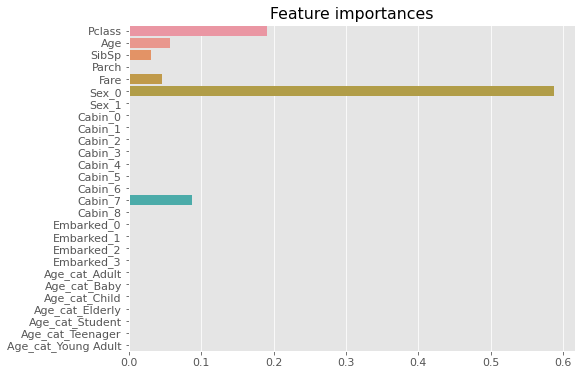

In [59]:
ftr_importances = pd.Series(model_xgb.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()